In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
project_path = Path("/projects/b1171/ylk4626/project/Chimera")
# project_path = Path("../").resolve()

# Chimeric Reads Summary

In [3]:
# |Sample  	|  No. 	|
# |---	| ---	|
# |  PC3_10_cells_MDA_Mk1c_dirty	|  1,666,427	|
# |  PC3_10_cells_MDA_P2_dirty 	|  12,963,576	|
# |  PC3_bulk_WGS_P2_clean	|  233,740	|
# |  PC3_bulk_WGS_Mk1c_clean	| 28,748 	|
# |  PC3_bulk_WGS_Pacbio_clean	|  114,430 	|

chimeric_data = {
    "PC3_bulk_WGS_Mk1c_clean": 28748,
    "PC3_bulk_WGS_P2_clean": 233740,
    "PC3_bulk_WGS_Pacbio_clean": 114430,
    "PC3_10_cells_MDA_Mk1c_dirt": 1666427,
    "PC3_10_cells_MDA_P2_dirty": 12963576,
}

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PC3_bulk_WGS_Mk1c_clean'),
  Text(1, 0, 'PC3_bulk_WGS_P2_clean'),
  Text(2, 0, 'PC3_bulk_WGS_Pacbio_clean'),
  Text(3, 0, 'PC3_10_cells_MDA_Mk1c_dirt'),
  Text(4, 0, 'PC3_10_cells_MDA_P2_dirty')])

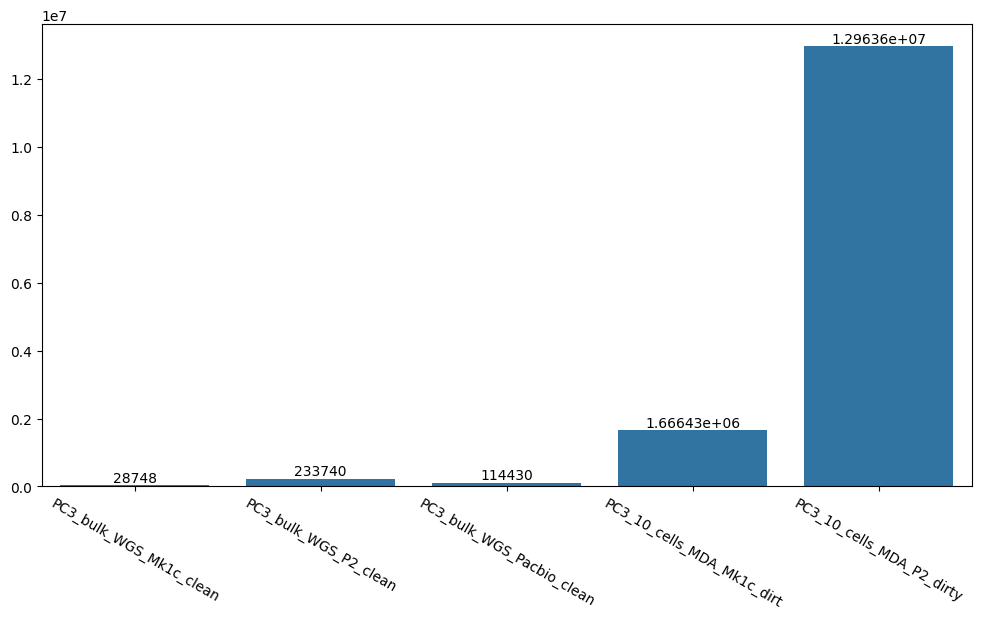

In [4]:
plt.figure(figsize=(12, 6))
g = sns.barplot(chimeric_data)
g.bar_label(g.containers[0])
plt.xticks(rotation=-30)

# Check unique

In [131]:
unique_data_summary = json.load(open(project_path / "analysis" / "PC3_10_cells_MDA_P2_dirty.threshold_5000.sup.json"))

In [6]:
unique_data_summary

{'5a1b8a12-1799-476d-a573-d9dc277c9845_1': 1,
 '0b203d2b-dc94-42e8-b9a7-521ef770e8ea': 1,
 '3a07208f-2f66-4f37-8297-99d2a445c4ec': 1,
 'd6c540d7-13a2-4ffb-ae0f-5137efd15da7': 0,
 'a214e2de-3328-4ae8-bce1-a0f875ebfe95': 2,
 'd084148a-de51-44b2-af5c-c64ad93e3dc3': 2,
 'a6ea94a3-072b-4031-93e0-2f0ecad5fc49': 0,
 '650e1e48-3041-403b-8904-484a5856e702': 1,
 'a09892d7-167c-4819-ac87-53f965a2430e_1': 1,
 '754e929e-ac9b-4fd3-83cb-7a298da25b30_2': 1,
 '9839f88b-ecbc-49ac-adb0-6d07217d04e8': 1,
 'f1d017ec-915c-4673-82bc-bd60d80a4779': 0,
 '48cc6298-d632-4d33-9b95-e96213e601c4': 0,
 '073b9cd2-b12c-434d-8252-5fe68868add6': 1,
 '425573a7-90ed-4fbd-8a36-d106fd1a8f44': 1,
 '56a43808-52f3-4aea-bbea-62402157b356': 1,
 'cc6b198d-dc55-4e0a-a12e-185c461c75f8': 2,
 '1a77fb55-2c2e-4edd-814b-63d866fae95b': 1,
 'ddcf67aa-eaf0-4652-a083-fa692cdaaf6f': 1,
 '98a15e1b-4b1f-4cfb-9388-63efd7f1c74f': 1,
 '24542295-1c25-4bed-9c68-1f665992376e': 2,
 'c7514caf-b27d-4b5d-ad21-9002ce53d002': 1,
 '5461d65a-37ba-4022-8f17-

In [7]:
len(unique_data_summary)

12963576

In [8]:
len(set(unique_data_summary.keys()))

12963576

In [9]:
from collections import Counter

In [10]:
sm_summary = Counter(unique_data_summary.values())

In [11]:
sm_summary

Counter({1: 7319930, 0: 3416893, 2: 1858333, 4: 211995, 3: 156425})

[Text(0, 0, '3.41689e+06'),
 Text(0, 0, '7.31993e+06'),
 Text(0, 0, '1.85833e+06'),
 Text(0, 0, '156425'),
 Text(0, 0, '211995')]

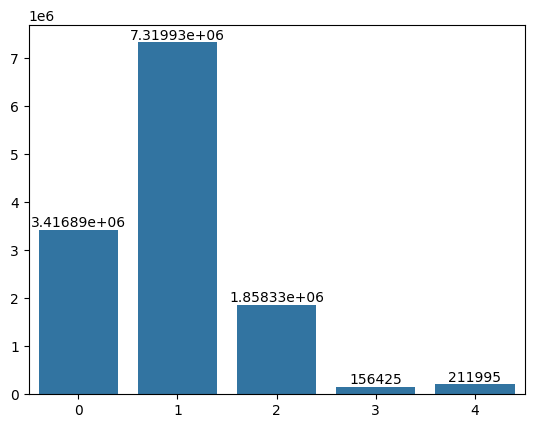

In [12]:
g = sns.barplot(sm_summary)
g.bar_label(g.containers[0])

## get unique data from raw data

In [20]:
def read_sup(file):
    from collections import defaultdict

    result = defaultdict(list)

    for line in open(file):
        content = line.split()

        if int(content[1]) > 0:
            sups = content[2].split(",")
            result[content[0]].extend(sups)
        else:
            result[content[0]].extend([])

    return result

In [171]:
read_sups = read_sup(project_path / "data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [172]:
len(read_sups)

12963576

In [173]:
read_sups

defaultdict(list,
            {'d7489acb-48c6-48a4-9672-a4633f135fb4_1': [],
             '54a4889e-69d4-4afc-afdc-413a8ed74726': [],
             '0f0b8df3-a8c3-4e84-a9b7-443edd79adc0': [],
             'b86d0701-5998-4ce4-b127-6b1e7e35e7fb': [],
             '27e9e5e3-affd-4b95-b0bb-0fd2f86d8494': [],
             'f8ac4077-a899-4418-ad9b-c7831f6aa0bc': [],
             'd20bb2db-3f68-45c9-94a1-f2c879d39c1e': [],
             'aca87ca3-b3fd-449c-971f-eeb0f2c1daa3': [],
             '6d7a5197-db2b-4cea-8aa6-9a527cedf7e2_1': [],
             'eb1336f3-8fbf-42d9-9983-d2b49ef64f54': [],
             '16304ba3-d239-4d1a-b88c-366be44f2fc6': [],
             '08a71401-f9bc-41ec-b63d-aa07b96adb1e_1': [],
             'f1af029a-abab-4271-a26c-d7366085279b': [],
             '37b19f17-c984-434d-a32e-382aef6c1729': [],
             'a9476a26-25cf-4f3c-aff7-0d4f6c96585d_1': [],
             '90d9e03e-4595-420e-8027-f07114599d3e': [],
             'b7e3d059-a22d-4897-ab43-0efbffb8cd2c': [],
     

In [174]:
def remove_group(data, group):
    result = {}
    for read, sups in data.items():
        result[read] = [sup for sup in sups if sup != group]
    return result

In [175]:
remove_mk1c_read_sups = remove_group(read_sups, "PC3_10_cells_MDA_Mk1c_dirty.bam")

In [176]:
len(remove_mk1c_read_sups)

12963576

In [177]:
unique_data_remove_mk1c_read_sups = {}
for read, sups in remove_mk1c_read_sups.items():
    unique_data_remove_mk1c_read_sups[read] = len(sups)

In [178]:
len(unique_data_remove_mk1c_read_sups)

12963576

In [179]:
from collections import Counter

sm = Counter(unique_data_remove_mk1c_read_sups.values())

In [180]:
sm

Counter({0: 11902286, 1: 780221, 3: 198507, 2: 82562})

In [181]:
# threshold 5000: before removing Counter({0: 3416893, 1: 7319930, 2: 1858333, 3: 156425 4: 211995, })

[Text(0, 0, '1.19023e+07'),
 Text(0, 0, '780221'),
 Text(0, 0, '82562'),
 Text(0, 0, '198507')]

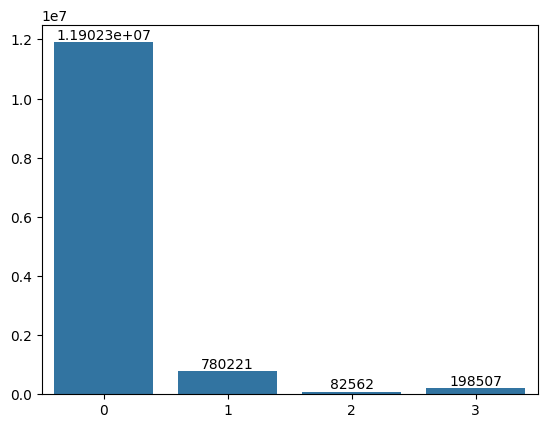

In [182]:
g = sns.barplot(sm)
g.bar_label(g.containers[0])

In [183]:
def read_sv(sv_file):
    return {line.split()[0]: line.split()[1] for line in open(sv_file)}

In [184]:
sv_data = read_sv(project_path / "data/sv/PC3_10_cells_MDA_P2_dirty/chimeric_reads_mapping/cutesv.svcf.sv.read.sup.txt")

In [185]:
sv_data

{'bf42415a-45a0-4f15-b9fb-093a5c291850': 'INV',
 'f589ebc4-41b6-428d-9bbe-42dc702782a8': 'INV',
 '476466e3-4175-4c53-9225-121470c3435f': 'INV',
 '62365869-debb-4d92-b623-7590c791c48e': 'INV',
 '8e00b2af-108a-4089-a88e-f5249c7dd74d': 'DEL',
 '7289326b-ea3f-4886-bd8d-f19fdffdbd36': 'INV',
 'af587d50-5502-4f95-a7f1-7ed67ba7d585': 'INV',
 '62336e9f-5970-4092-84c8-697d72825cb9_1': 'INV',
 '706866e8-29c3-479b-ad91-5b98113008f9': 'DEL',
 '862eb5e8-4e41-4b04-9535-9a38137260f9': 'INV',
 '54defea5-9d55-40b8-a9bd-fa48c11843e5': 'INS',
 'f239e117-ed15-4499-98fb-7e5cf230b43a': 'INV',
 '7b402c86-6c64-47ce-8e5a-53d684924449': 'INV',
 '0c5ad499-b2b7-4564-80fa-a4c9a855f1e3': 'INV',
 'a5ee019e-bafe-40a7-b5b4-769f5bace065_1': 'INV',
 '118526f5-f3e3-44c9-acaa-e0ac274211f2': 'INV',
 '4cbd313b-65c6-4eb5-87f8-141bcc63067c': 'INV',
 '175e26d2-a239-44a8-bceb-c57de9c952fe': 'DEL',
 '85a2a1be-6b58-41d3-a030-8a71585d21ec': 'INV',
 '939293a5-f7ba-4124-997c-e1d6644e1a6a': 'INV',
 'f4240654-5e3f-423a-8aee-495fe78c20

In [186]:
def get_read_sv_by_group(unique_data, sv_data, selected_group=0, selected_sv="INV"):
    result = []
    for k, v in unique_data.items():
        if v == selected_group and (sv := sv_data.get(k)) and sv == selected_sv:
            result.append(k)
    return result


def get_read_sv_for_all_group(unique_data, sv_data):
    from collections import defaultdict

    result = defaultdict(list)

    for k, v in unique_data.items():
        if sv := sv_data.get(k):
            result[v].append(sv)
        else:
            result[v].append("UNKOWN")

    return result

In [187]:
unqiue_data_sv_all_group = get_read_sv_for_all_group(unique_data_remove_mk1c_read_sups, sv_data)

In [188]:
unqiue_data_sv_all_group

defaultdict(list,
            {0: ['INV',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'INS',
              'UNKOWN',
              'UNKOWN',
              'INV',
              'INV',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'INV',
              'UNKOWN',
              'INV',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'INV',
              'UNKOWN',
              'UNKOWN',
              'DEL',
              'INV',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN',
              'UNKOWN'

In [189]:
sv_counters = {}
for k, v in unqiue_data_sv_all_group.items():
    sv_counters[k] = Counter(v)

In [190]:
sv_counters

{0: Counter({'UNKOWN': 9710843,
          'INV': 2039686,
          'DEL': 79278,
          'INS': 47647,
          'DUP': 17384,
          'TRA': 7448}),
 2: Counter({'UNKOWN': 37746,
          'DUP': 19587,
          'INV': 13891,
          'DEL': 8548,
          'INS': 1747,
          'TRA': 1043}),
 1: Counter({'UNKOWN': 571283,
          'INV': 194802,
          'DEL': 6860,
          'INS': 3245,
          'DUP': 3120,
          'TRA': 911}),
 3: Counter({'UNKOWN': 82799,
          'INV': 65030,
          'DUP': 28863,
          'DEL': 19412,
          'INS': 1870,
          'TRA': 533})}

In [191]:
sv_counters = dict(sorted(sv_counters.items()))

In [192]:
def vis_sv2(sv_counter_data):
    # Convert to DataFrame
    df = pd.DataFrame(sv_counter_data).T
    # Create two separate plots: one for UNKOWN and one for other categories

    plt.figure(figsize=(15, 20))
    colors_unkown = ["grey", "lightcoral", "orange", "green", "cyan", "blue"]

    # Plot 1: Including UNKOWN
    plt.subplot(4, 1, 1)
    df.plot(kind="bar", stacked=True, ax=plt.gca(), color=colors_unkown)
    plt.title("Distribution of All Categories (Including UNKOWN)")
    plt.xlabel("Group")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(axis="y", alpha=0.3)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    colors_without_unkown = ["lightcoral", "orange", "green", "cyan", "blue"]

    # Plot 2: Excluding UNKOWN to better see the distribution of other categories
    plt.subplot(4, 1, 2)
    df_without_unknown = df.drop("UNKOWN", axis=1)
    df_without_unknown.plot(kind="bar", stacked=True, ax=plt.gca(), color=colors_without_unkown)
    plt.title("Distribution of Categories (Excluding UNKOWN)")
    plt.xlabel("Group")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(axis="y", alpha=0.3)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Adjust layout to prevent overlapping
    # plt.tight_layout()
    # plt.show()
    df["total"] = df.sum(axis=1)
    df_ratio = df.div(df["total"], axis=0)

    df_without_unknown["total"] = df_without_unknown.sum(axis=1)
    df_without_unknown_ratio = df_without_unknown.div(df_without_unknown["total"], axis=0)

    # show ratio
    plt.subplot(4, 1, 3)
    df_ratio.iloc[:, :-1].plot(kind="bar", stacked=True, ax=plt.gca(), color=colors_unkown)
    plt.title("Distribution of Categories (Including UNKOWN)")
    plt.xlabel("Group")
    plt.ylabel("Ratio")
    plt.xticks(rotation=0)
    plt.grid(axis="y", alpha=0.3)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.subplot(4, 1, 4)
    df_without_unknown_ratio.iloc[:, :-1].plot(kind="bar", stacked=True, ax=plt.gca(), color=colors_without_unkown)
    plt.title("Distribution of Categories (Excluding UNKOWN)")
    plt.xlabel("Group")
    plt.ylabel("Ratio")
    plt.xticks(rotation=0)
    plt.grid(axis="y", alpha=0.3)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    return df

        INV    UNKOWN       INS       DEL       TRA       DUP  total
0  0.171369  0.815880  0.004003  0.006661  0.000626  0.001461    1.0
1  0.249675  0.732207  0.004159  0.008792  0.001168  0.003999    1.0
2  0.168249  0.457184  0.021160  0.103534  0.012633  0.237240    1.0
3  0.327596  0.417109  0.009420  0.097790  0.002685  0.145400    1.0
without_unknown
        INV       INS       DEL       TRA       DUP  total
0  0.930750  0.021742  0.036176  0.003399  0.007933    1.0
1  0.932344  0.015531  0.032833  0.004360  0.014933    1.0
2  0.309956  0.038982  0.190735  0.023273  0.437054    1.0
3  0.562018  0.016161  0.167767  0.004606  0.249447    1.0


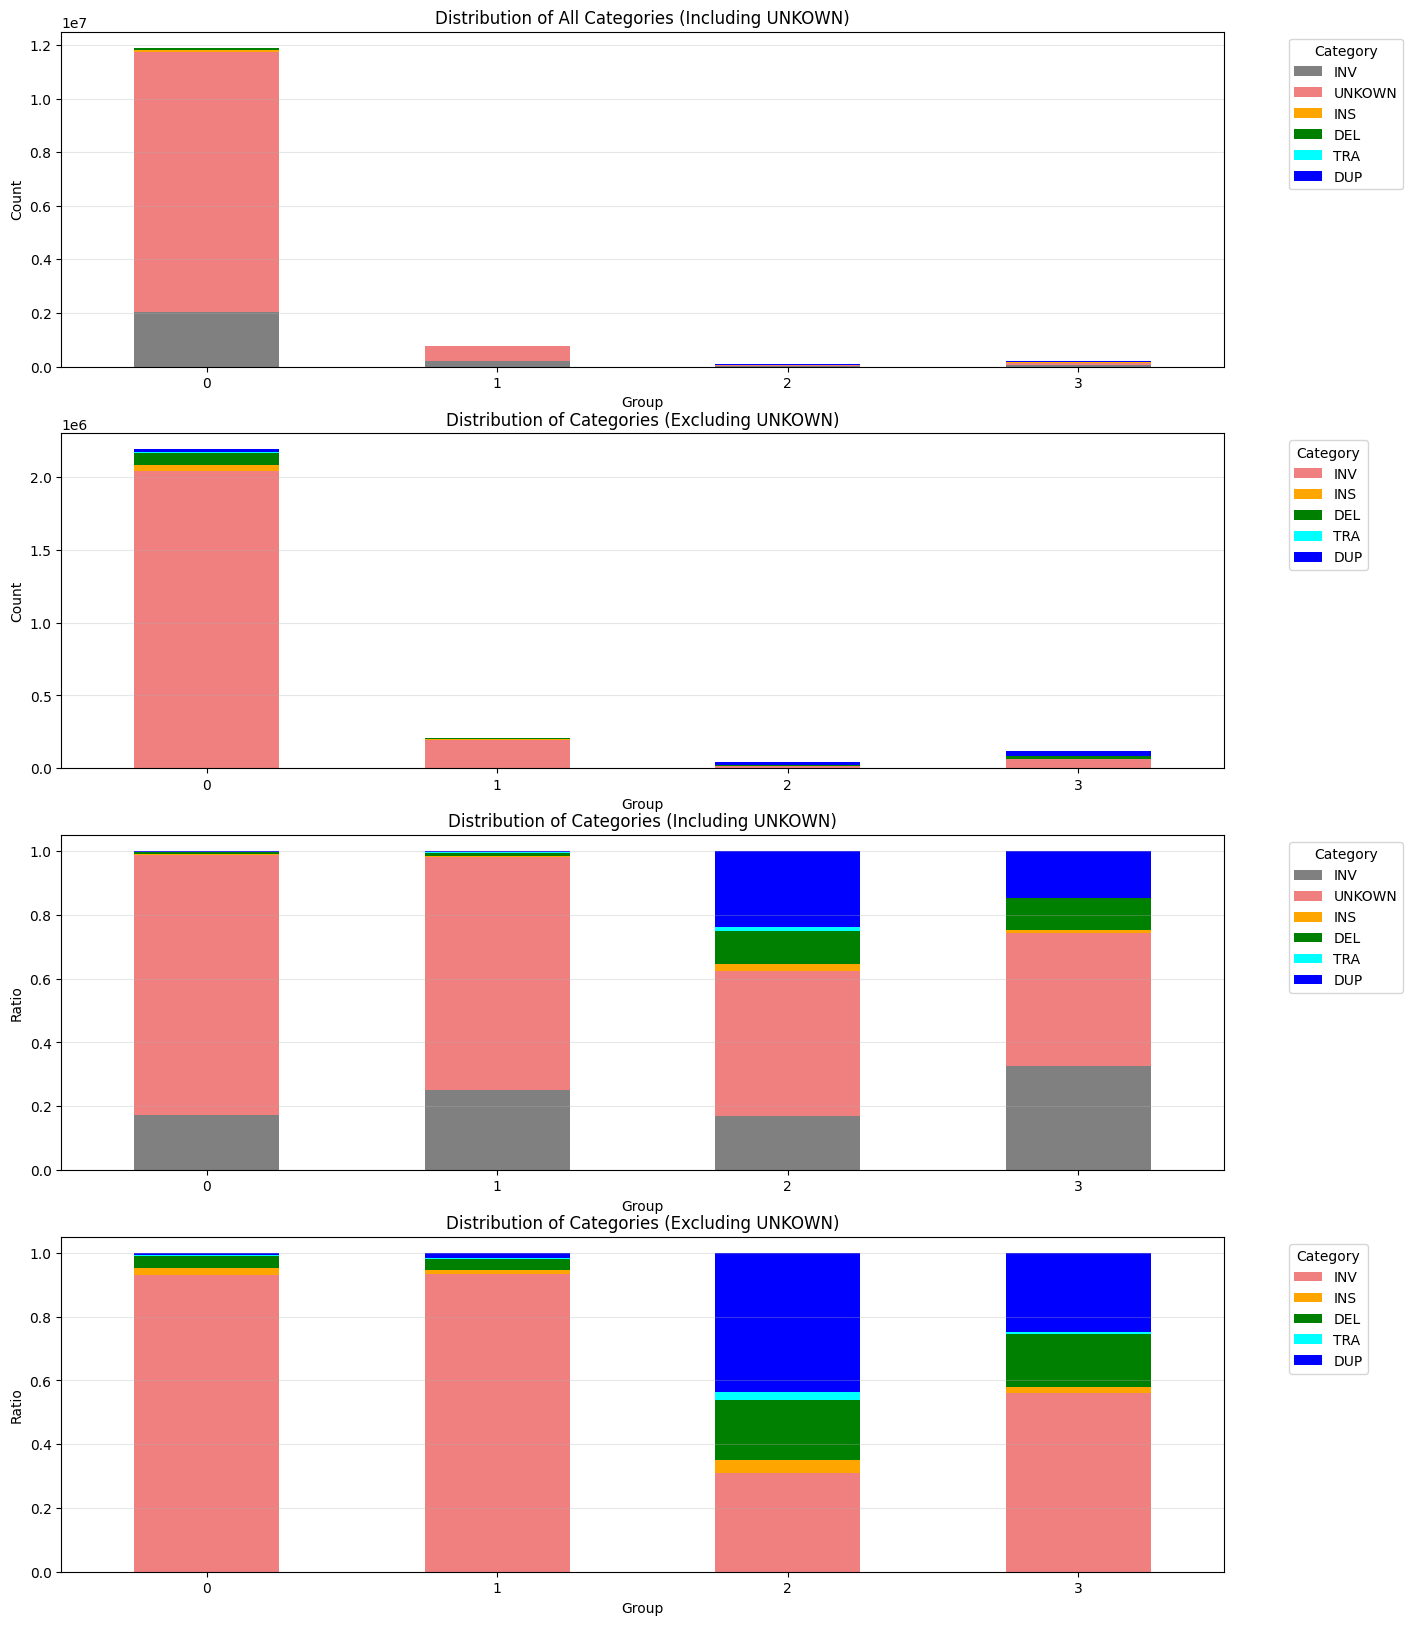

In [193]:
vis_sv_df = vis_sv2(sv_counters)

In [194]:
vis_sv_df

,INV,UNKOWN,INS,DEL,TRA,DUP,total
0,2039686,9710843,47647,79278,7448,17384,11902286
1,194802,571283,3245,6860,911,3120,780221
2,13891,37746,1747,8548,1043,19587,82562
3,65030,82799,1870,19412,533,28863,198507


In [220]:
vis_sv_df = vis_sv_df.loc[:, ["UNKOWN", "INV", "DEL", "INS", "DUP", "TRA", "total"]]

In [221]:
vis_sv_df

,UNKOWN,INV,DEL,INS,DUP,TRA,total
0,9710843,2039686,79278,47647,17384,7448,11902286
1,571283,194802,6860,3245,3120,911,780221
2,37746,13891,8548,1747,19587,1043,82562
3,82799,65030,19412,1870,28863,533,198507


<Axes: >

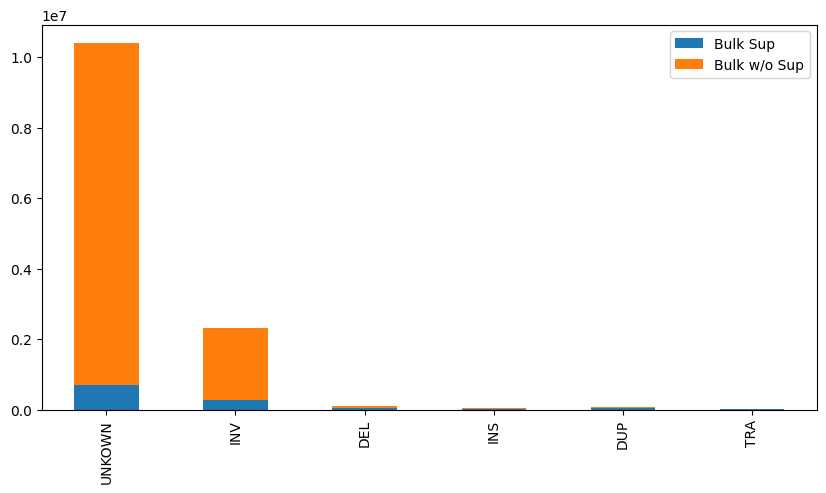

In [222]:
pd.DataFrame(
    {
        "Bulk Sup": vis_sv_df.iloc[1:, :-1].sum(axis=0),
        "Bulk w/o Sup": vis_sv_df.iloc[0, :-1],
    }
).plot(kind="bar", stacked=True, figsize=(10, 5))

<Axes: >

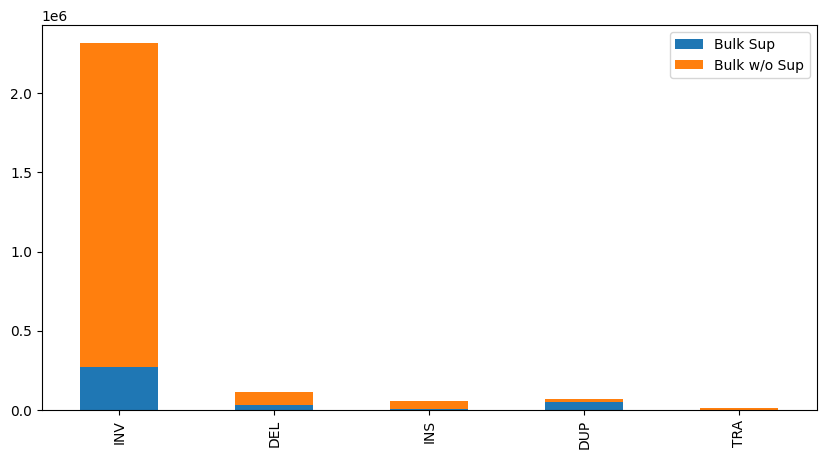

In [223]:
pd.DataFrame(
    {
        "Bulk Sup": vis_sv_df.iloc[1:, 1:-1].sum(axis=0),
        "Bulk w/o Sup": vis_sv_df.iloc[0, 1:-1],
    }
).plot(kind="bar", stacked=True, figsize=(10, 5))

In [224]:
vis_sv_df_without_total = vis_sv_df.iloc[:, :-1]

In [225]:
vis_sv_df_without_total_ratio = vis_sv_df_without_total.div(vis_sv_df_without_total.sum(axis=0))

In [226]:
vis_sv_df_without_total_ratio

,UNKOWN,INV,DEL,INS,DUP,TRA
0,0.933495,0.881680,0.694824,0.874113,0.252110,0.749673
1,0.054917,0.084206,0.060124,0.059531,0.045248,0.091696
2,0.003628,0.006005,0.074918,0.032050,0.284059,0.104982
3,0.007959,0.028110,0.170134,0.034306,0.418583,0.053649


<Axes: >

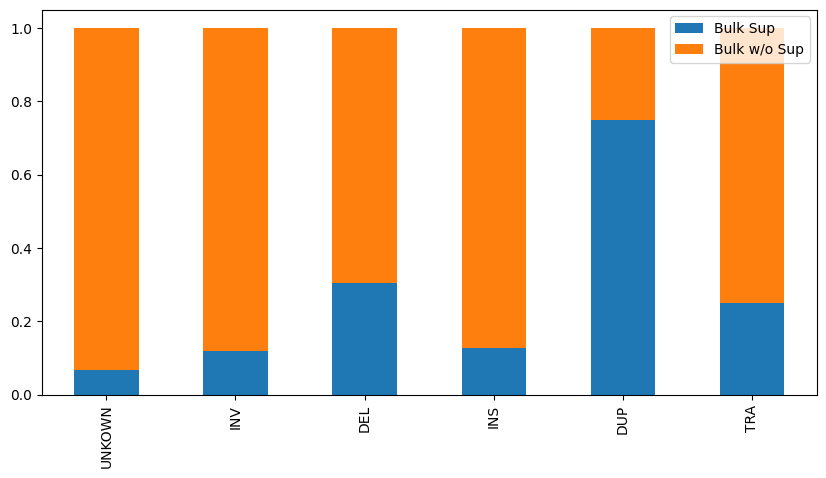

In [227]:
pd.DataFrame(
    {
        "Bulk Sup": vis_sv_df_without_total_ratio.iloc[1:, :].sum(axis=0),
        "Bulk w/o Sup": vis_sv_df_without_total_ratio.iloc[0, :],
    }
).plot(kind="bar", stacked=True, figsize=(10, 5))

## group by sv event

In [201]:
sv_raw_data = project_path / "data/sv/PC3_10_cells_MDA_P2_dirty/chimeric_reads_mapping/cutesv.svcf"

In [202]:
def read_raw_sv_by_event(file):
    results = {}

    with open(file) as f:
        ids = {
            "TRA": 0,
            "DEL": 0,
            "DUP": 0,
            "INV": 0,
            "INS": 0,
        }

        for line in f:
            if line.startswith("#"):
                continue
            features = line.split()[7].split(";")

            sv_type = features[0].split("=")[1]

            key_id = f"{sv_type}_{ids[sv_type]}"
            reads = features[9].split("=")[1].split(",")

            results[key_id] = reads

            ids[sv_type] += 1

    return results

In [203]:
raw_sv_by_event = read_raw_sv_by_event(sv_raw_data)

In [204]:
len(raw_sv_by_event)

542355

In [205]:
raw_sv_by_event

{'TRA_0': ['4b9cabc9-0ada-407f-81c7-dc3cf4ec2833',
  '59832234-81f4-447e-9493-04336f7f6787',
  '936da1a9-8ac1-4fdb-aaa8-a4c5c79a46cf',
  '2cbcf005-6032-4819-b0d2-bea28af9553c',
  'fc894e44-4a29-4f3d-9c39-d93eae8eb86f',
  '43be2ad0-f528-45ba-ad33-48c3fd28fc6d',
  'c4d796ab-c561-40f9-bb85-c5c5269058c5',
  'd0b778c7-820b-42c3-8021-e20838060417',
  '463aab56-3c44-49b8-b65f-8e754023ed6c',
  'b2a7dfb1-fc61-4d3a-b3f3-af5d07b6a3e1',
  '36453a98-a778-4507-8cfa-208af2d10470',
  '9e7b0344-61e5-4ae1-b495-994b2f29e2d8',
  '3a9ef674-248a-4201-b056-1415978aee9e',
  '1c8db978-dacc-4cbd-bb97-25a4dea4231b',
  'f6f14a18-1959-43c1-96b4-ea60170aa502',
  'b5abdc2c-747a-4fdc-b2f7-d61887034e00',
  '17c4f7d8-1004-4cb8-be29-fe226e36afa5',
  '3b06c566-86c2-4e59-9995-e2f6f5c3d1c3',
  'a4de4288-596e-4fe9-9891-607f22a0a7f1'],
 'TRA_1': ['d6f5db16-be44-4e20-9812-6cf253d60c22_1',
  'fb182863-76c2-40a9-9355-eb492bf48b1e',
  '8a071baf-8dfc-4e47-a712-5bdb6aee3579',
  'a8b7f4be-18f8-4f77-b24c-1c3ca9bed0c6',
  '3a8dcdca-3

In [206]:
raw_sv_event_by_read = {read: event for event, reads in raw_sv_by_event.items() for read in reads}

In [207]:
raw_sv_event_by_read

{'4b9cabc9-0ada-407f-81c7-dc3cf4ec2833': 'TRA_0',
 '59832234-81f4-447e-9493-04336f7f6787': 'TRA_0',
 '936da1a9-8ac1-4fdb-aaa8-a4c5c79a46cf': 'TRA_0',
 '2cbcf005-6032-4819-b0d2-bea28af9553c': 'TRA_0',
 'fc894e44-4a29-4f3d-9c39-d93eae8eb86f': 'TRA_0',
 '43be2ad0-f528-45ba-ad33-48c3fd28fc6d': 'TRA_0',
 'c4d796ab-c561-40f9-bb85-c5c5269058c5': 'TRA_0',
 'd0b778c7-820b-42c3-8021-e20838060417': 'TRA_0',
 '463aab56-3c44-49b8-b65f-8e754023ed6c': 'TRA_0',
 'b2a7dfb1-fc61-4d3a-b3f3-af5d07b6a3e1': 'TRA_0',
 '36453a98-a778-4507-8cfa-208af2d10470': 'TRA_0',
 '9e7b0344-61e5-4ae1-b495-994b2f29e2d8': 'TRA_0',
 '3a9ef674-248a-4201-b056-1415978aee9e': 'TRA_0',
 '1c8db978-dacc-4cbd-bb97-25a4dea4231b': 'TRA_0',
 'f6f14a18-1959-43c1-96b4-ea60170aa502': 'TRA_0',
 'b5abdc2c-747a-4fdc-b2f7-d61887034e00': 'TRA_0',
 '17c4f7d8-1004-4cb8-be29-fe226e36afa5': 'TRA_0',
 '3b06c566-86c2-4e59-9995-e2f6f5c3d1c3': 'TRA_0',
 'a4de4288-596e-4fe9-9891-607f22a0a7f1': 'TRA_0',
 'd6f5db16-be44-4e20-9812-6cf253d60c22_1': 'TRA_1'

In [208]:
len(raw_sv_event_by_read)

2560905

In [209]:
def get_read_sv_for_all_group_by_event(unique_data, sv_data, event_data):
    from collections import defaultdict

    result = defaultdict(dict)

    for read_id, count in unique_data.items():
        if sv_type := sv_data.get(read_id):
            sv_event = event_data[read_id]

            if result[sv_type].get(count) is None:
                result[sv_type][count] = set()
            else:
                result[sv_type][count].add(sv_event)

    return result

In [210]:
sv_for_all_group_by_event = get_read_sv_for_all_group_by_event(
    unique_data_remove_mk1c_read_sups, sv_data, raw_sv_event_by_read
)

In [211]:
sv_for_all_group_by_event

defaultdict(dict,
            {'INV': {0: {'INV_326616',
               'INV_383689',
               'INV_100110',
               'INV_516869',
               'INV_315404',
               'INV_240517',
               'INV_27325',
               'INV_416662',
               'INV_213285',
               'INV_206159',
               'INV_232406',
               'INV_511007',
               'INV_395636',
               'INV_306000',
               'INV_476344',
               'INV_340194',
               'INV_253387',
               'INV_352514',
               'INV_422712',
               'INV_408090',
               'INV_276502',
               'INV_155219',
               'INV_210304',
               'INV_475304',
               'INV_504093',
               'INV_342295',
               'INV_127820',
               'INV_510927',
               'INV_160364',
               'INV_44304',
               'INV_435119',
               'INV_306714',
               'INV_108715',
               'I

In [212]:
from collections import defaultdict

viz_result = defaultdict(dict)


for sv_type, counts_info in sv_for_all_group_by_event.items():
    for count, sv_events in counts_info.items():
        viz_result[sv_type][count] = len(sv_events)

In [213]:
viz_result

defaultdict(dict,
            {'INV': {0: 491018, 2: 3909, 1: 57580, 3: 4330},
             'INS': {0: 4397, 3: 71, 1: 713, 2: 224},
             'DEL': {0: 6669, 3: 153, 1: 907, 2: 293},
             'DUP': {3: 34, 2: 55, 0: 1678, 1: 166},
             'TRA': {0: 1805, 1: 257, 2: 225, 3: 79}})

In [214]:
viz_result_df = pd.DataFrame(viz_result)

In [215]:
viz_result_df = viz_result_df.sort_index()

In [216]:
viz_result_df

,INV,INS,DEL,DUP,TRA
0,491018,4397,6669,1678,1805
1,57580,713,907,166,257
2,3909,224,293,55,225
3,4330,71,153,34,79


<Axes: >

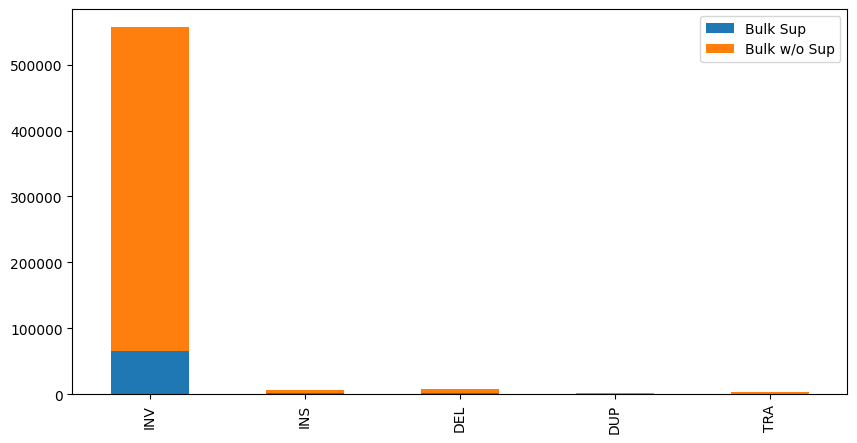

In [228]:
pd.DataFrame(
    {
        "Bulk Sup": viz_result_df.iloc[1:, :].sum(axis=0),
        "Bulk w/o Sup": viz_result_df.iloc[0, :],
    }
).plot(kind="bar", stacked=True, figsize=(10, 5))

## Check the length of Reads

In [16]:
import pysam

In [17]:
def collection_read_length(bam_file):
    bam_file = pysam.AlignmentFile(bam_file)
    result = {}
    for read in bam_file:
        result[read.query_name] = read.query_length
    return result

In [18]:
bam_read_leng = collection_read_length(project_path / "data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam")

In [20]:
unique_data_length = {}
for k, v in unique_data.items():
    unique_data_length[k] = bam_read_leng[k]

In [55]:
unique_data_length_g0 = {}
for k, v in unique_data.items():
    if v == 0:
        unique_data_length_g0[k] = unique_data_length[k]

In [93]:
def vis_sv(sv_data, figsize=(12, 6)):
    # Convert to long format DataFrame
    data_list = []
    for group, categories in sv_data.items():
        for category in categories:
            data_list.append({"Group": f"Group {group}", "Category": category, "Count": 1})

    df = pd.DataFrame(data_list)

    # Create pivot table for stacking
    df_pivot = df.pivot_table(index="Group", columns="Category", values="Count", aggfunc="sum", fill_value=0)

    # Create the stacked bar plot
    plt.figure(figsize=figsize)
    df_pivot.plot(kind="bar", stacked=True)

    # Customize the plot
    plt.title("Category Distribution by Group", pad=20, fontsize=14)
    plt.xlabel("Group", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    # Add grid lines
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Customize legend
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

In [52]:
def get_read_length_by_group(group: int, unique_data, unique_data_length):
    result = {}
    for k, v in unique_data.items():
        if v == group:
            result[k] = unique_data_length[k]
    return result


def get_read_length_all_group(unique_data, unique_data_length):
    from collections import defaultdict

    result = defaultdict(list)

    for k, v in unique_data.items():
        result[v].append(unique_data_length[k])

    return result

In [53]:
read_length_all_group = get_read_length_all_group(unique_data, unique_data_length)

In [54]:
len(unique_data_length_g0)

641678

<Axes: ylabel='Count'>

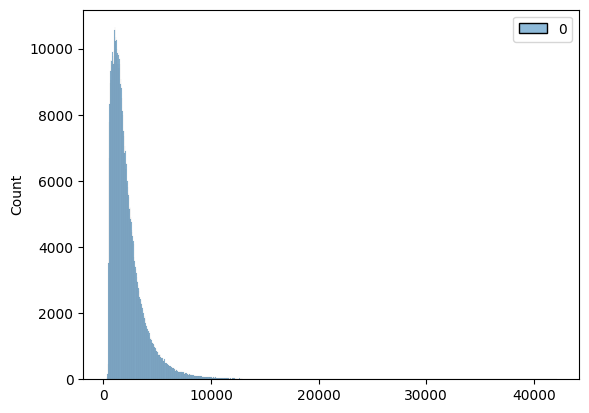

In [56]:
sns.histplot(unique_data_length_g0.values())

(0.0, 10000.0)

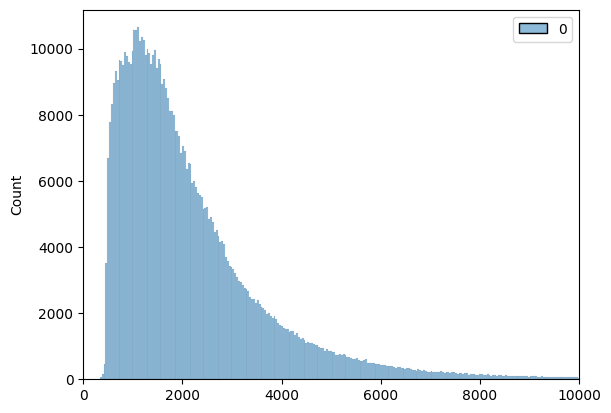

In [57]:
sns.histplot(unique_data_length_g0.values())
plt.xlim(0, 10000)

<Axes: >

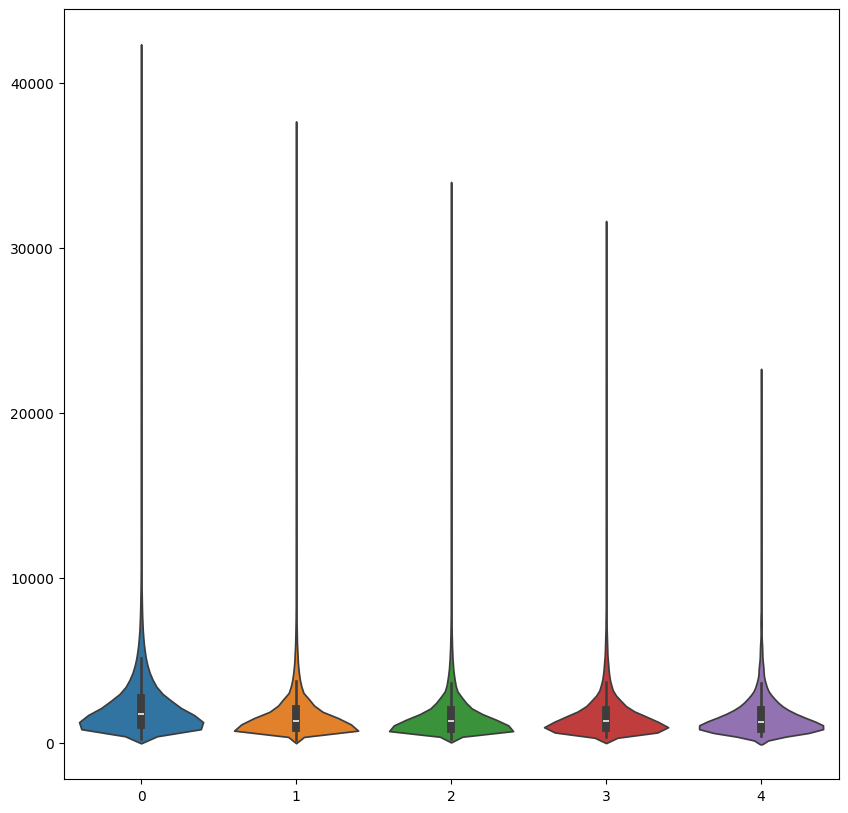

In [58]:
plt.figure(figsize=(10, 10))
sns.violinplot(read_length_all_group)
# plt.ylim(0, 10000)

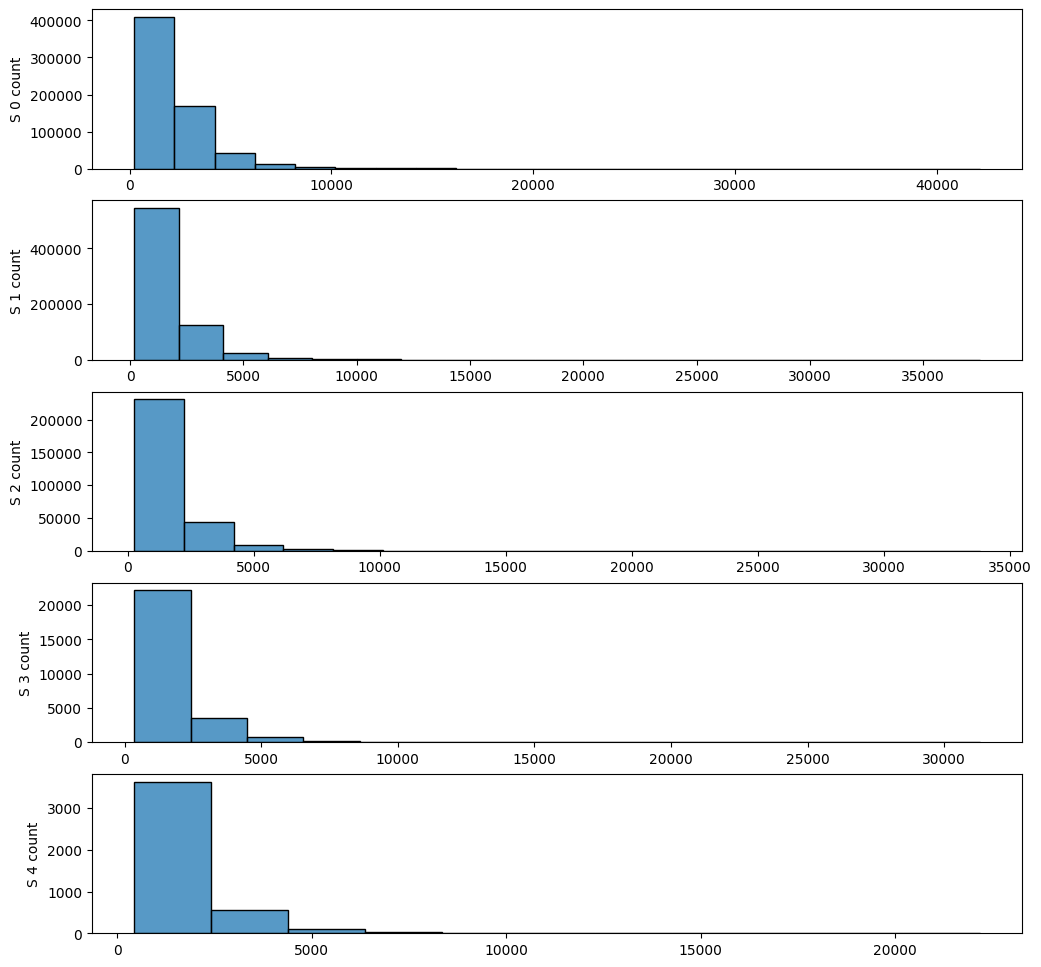

In [59]:
fig, ax = plt.subplots(5, 1, figsize=(12, 12))
axs = ax.flatten()

for idx, ax in enumerate(axs):
    sns.histplot(read_length_all_group[idx], binwidth=2000, ax=ax)
    ax.set_ylabel(f"S {idx} count")

<Axes: ylabel='Density'>

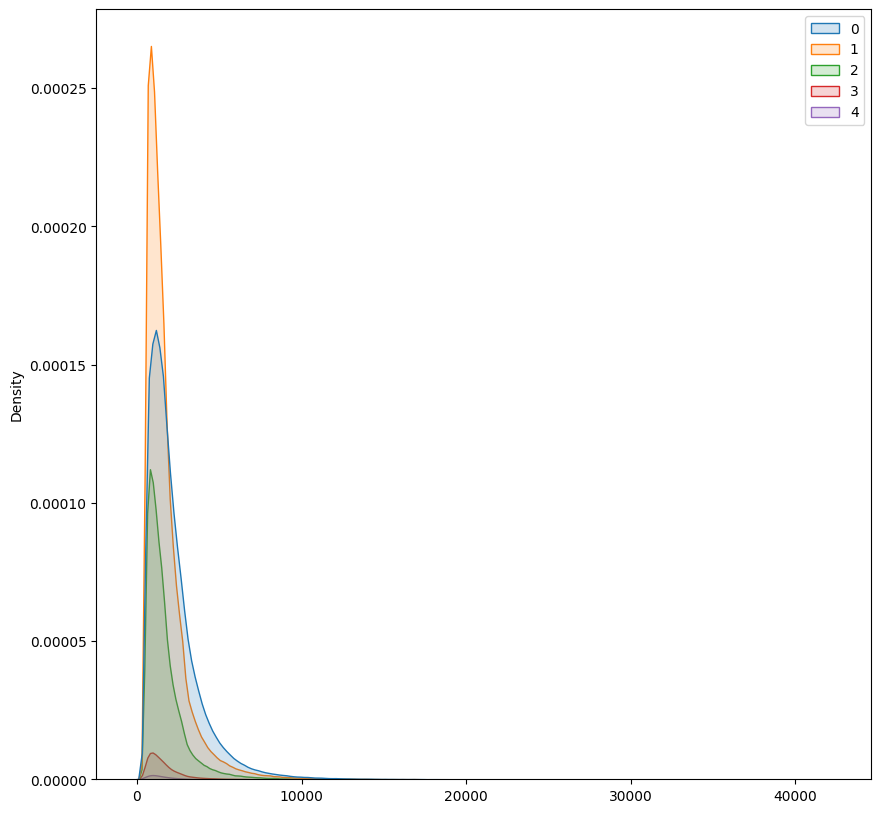

In [61]:
plt.figure(figsize=(10, 10))
sns.kdeplot(read_length_all_group, fill=True, alpha=0.2)
# plt.xlim(0, 10000)

(0.0, 10000.0)

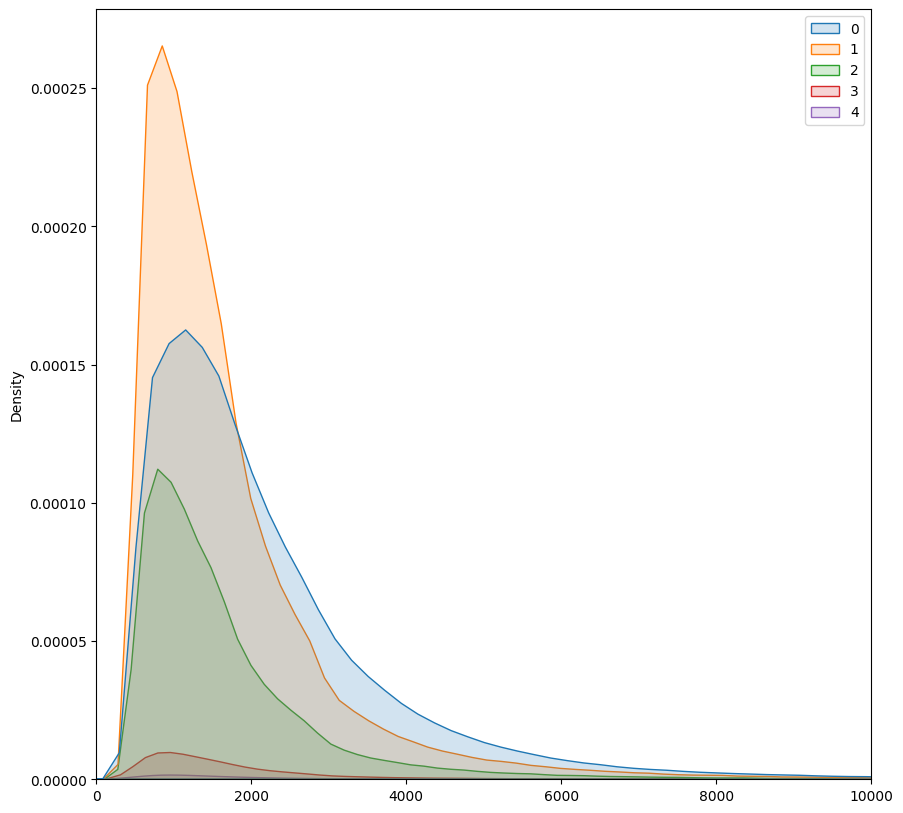

In [62]:
plt.figure(figsize=(10, 10))
sns.kdeplot(read_length_all_group, fill=True, alpha=0.2)
plt.xlim(0, 10000)

In [1]:
import chimera

In [20]:
from datasets import load_dataset

dataset = load_dataset(
    "parquet",
    data_files={"train": "/projects/b1171/ylk4626/project/DeepChopper/data/600_000_both_samples/test.parquet"},
)

Generating train split: 0 examples [00:00, ? examples/s]

In [21]:
train = dataset["train"]

In [22]:
len(train)

60000

In [24]:
def group_adjacent(lst):
    result = []
    for i in range(0, len(lst), 2):
        if i + 1 < len(lst):
            result.append((lst[i], lst[i + 1]))
        else:
            result.append(lst[i])
    return result

In [25]:
import secrets

sample = 50
highlight_ids = (secrets.randbelow(len(train)) for _ in range(sample))

for highlight_id in highlight_ids:
    target = train[highlight_id]["target"]
    chimera.utils.highlight_targets(train[highlight_id]["seq"], group_adjacent(target))

id: 358e9508-89e6-4e0f-9015-0ce83c5fabdd


ACACCTGGAAAGGAGCAGAAATGTGAAGTGCTAGCTGAAGGATGAGCAGCAGCTAGCCAGGGCAAAGGGGCAATGGCGGCTTCCTGTGTTCACTGCACACTGGGCAGAAGATGCC
CTTGATTGGTCTGGGTACCTGGAAGAGTGAGCCCTGGTCAGGTAAAAGCAGCTGTTAAGTATGCCCCTAGCGTAGGCTACCGCCACATTGATTGTGCTGCTATCACGGCAATGAG
CCTGAGATTGGGGAGGCCCTGAAGGAGGACGTGGGACCAGGCAAGGCGGCGCCTCGGGAGGAGCTGGTCTGTGACATCCAAGCTGTGGAACACCAAGCACCACCCCGAGGGATGT
GGAGCCTGCCCTCCGGAAGACTTGGCTGACCTCCAGCTGGAGTATCTGGACCTGTACCTGATGCACTGGCCTTATGCCTCTGAGCGGGGAGACAACCCCTTCCCCAAGAATGCTG
ATGGGACTAACACGCTCCACGACCCACTACAAGGAGACTTGGAAGGCTCTGGAGGCACTGGTGGCTTGGGGCTGGTGCAGGCGCTGGGCCTGTCCAACTTCAACAGTCGGCAGAT
TGATGGGCCACTCAGTGTGGCCTCCGTGCGTCCAGCTGTCCTGCAGGTGGAATGCCACCCATACTTGGCTCAAAATGAGCTAATTGCCCACTGCCAAGCACGTGGCCTGGAGGTA
TCTATAGCCCTTTGGGCTCCTCTGATCGTGCATGGCGTGATCCTGATGAGCCTGTCCTGCTGGAGGAACCAGTAGTCCTGGCATTGGCTGAAAAGTATGGCCGATCTCCAGCTCA
GATCTTGCTCAGGTGGCGGTCCAGCGGAAAGTGATCTGCATCCCCAAAAGTATCACTCCTTCGGCTCAGAACCATAAGGTGTTGCTACCTTTAGCCCAGAAGAGATGAAGCAGCT
AAATGCCCTGAACAAAAATTGGAGATATATTGTGCCTATGCTTACGGTGGATGGGAAGAGAGTCCCAAGGGATGCAGGGCATCCTCTGTACCCCTTTCTAATGACCCGTACTGAG
ACCACAGCTTCTTGGCCTCACCCACCAGCTCTGCAGCTAATGTGAGGTCCTGCCACAACGGAAAGAGGGAGTTAATAAAGCCATTGGAGCATC

id: 5ac1a1f9-5dc1-46a4-9abd-3e6a362b138d+34368b55-2f50-422b-af32-b4accb7dc31d|1707:1738


GTCTTTTAAGTATAGCTTCCTCCCTTGAAAAAAAATGTAAACATGTTGTTGAGTGATAAAACACTGTGGTGTGAAAGTGTCATCTCTGCCAATCAGGCAAAGACAAGATTTGCAT
TTTATTATGTCTGTCTTATCATGCAATGGAAATGATGTTGTAAGTATGCATCTTACCAATGATGTAACGGTTTAATACCTTTTGAATGTTTTAATAACCAAGTTGCTGCTGAACT
TATACTAAATAGGGACCAAAAACTTGCTCTCATTTTCTCAAATTGTATTCTATATCCATTAATGTATCAGTTATCCCAAAGCCTCTCAGGTGGAGGGGTTTACCACCTTCCTAGG
TCGTTCAACCAGGTTTTGTGAGGAATGCATTCAAAGTGGCTTTATAAAAGAAGATTTCTTTAGCAAGAATAATGAGGTCATGTCATTTGTTAATAAGTATCTGTGATAAATCCGT
GGTTCAAGGTTAAGCCATTCTGGTATTTTTGGTATTAGCAACTGTAAATTTTGCCACCTCATACATGGAACAGAGCTTGTGGGATGCTAATAGTTAGTGAAGTATACATGATTTA
ATTTCTAATAATCTTTATGTTTTCTTTAAGGATAGTGGTGTATTGCTCTTTTTCAGCTTTATTTTTAAGAGTACAGTCAGGAAACCAACAAGGGGCCGAGAGTGTGGCTGCCCCT
GCTTGGGACATTACTACGCAAGTGAAACAAAGTTAATGTGACAAGCTTTGCTTTGTTATCATTGGTCTTCACTAGAGGATACCTTTTACATGTACTTCTCTCTTGGATCAAATAT
GTCTTTAACTGTTTACCCGAGTGGCTGGAGGCCATGCCTTTAAGCATGTGTAAAATTTTAAAGAATGAACATACACATAGTTATTTTAGTAATATTTCCTGAAAGAAAAAACCAA
ATTCGGCTATAAGTCTTGATTTCAATGAACTTTTAATTTGAATGTATCTGTTGGAAAACAAGACTTTCCCAGCTTGTATTACCTAGAAGCGTGAATGTATAGGATACCTGACTAC
TAAGACTATATTCCTTAGCCCTGCCTGTCTTTATTTGCGGGTCTAATCTAATATTAGAATATATTAACTCGCTTAAGGCATTGAAGCCATATGGGATGGGAATGCATTTCTCAGT
GTTTCTCCAAGAGACTTCTCCATTACCTTTGGAGTTATGGCGGCAAGTAAGTATCATAGTATTAAGAAATTTGCCTAAATCTGAGTTGTGCCTTTCTTTACACAAGGCATGGGCT
TTGTCCTGGTGATCAGTTTGTAAGCCTTCTTCCTTCCCAGCTCCTTAATATAAAAGCAAAGTGATTGAGTAGGTAATGTTCAAAGTGTCTGCCTGTGTACATGTACTTGTATTGA
TTATGTAGTTCAGTAAGATGTGCCCAAGTCATTTCAGAAAAGAAAGACACCTTCAGTTTTTTGATGCATTTTTGCTGAACACTTGGGTAGTGAGTGGGATCCTATCCAGTTGAGG
AATGCTTGCAATGCTCATTGAAGGGATTTGCTTTGGGACTCTTTGTCATCTTCCAGAAAGGAAACATATTGTATATTTGGCCCAGTGTGATTGATTGCTTTATCTTTGGTAACTT
TTACTTGAATGGGATTTGCTGAATTAATGACTATTGAATTTAAAACTAATTATGAGTTGACAAATAAATAAAAGGTAGTGTTTAAAAAAAAAAAAAATTCCTCCCTACACCCCTC
CCTCATTTCCATCCTTAATTTTAATAATCAACACCCTCCTAGCCTTACTACTAATAATTATTACATTCTGACTACCACAACTCAACGGCTACATAGAAAAATCCTTCCCCTTACG
AGTGCGGCTTCGACCCTATATCCCCCGCCCGCGTCCCTTTCTCCATAAAATTCTTCTTAGTAGCTATTACCTTCTTATTTGATCTAGAAATTGCCCTTTTACCCCTACCATGAGC
CCTACAAACAACTGCCTGCCACTAATAGTTATGTCATCCCTCTTATTAATCATCATCTCTAGCCCTAAGTCTGGCCATCGATCGACCAAAAAGGATTAGACTGAACCGAAT

id: 79503265-c78c-4583-b6f0-287685a92854|919:999


ACAAAACACCAATGGCGGATGACGCCGGTGCAGCGTTCCGGGGCCCTGGTGGCCCTGGGATGGGAACCGCGGTGGCTTCCGCGGAGGTTTCGGCAGTGGCATCCACGGGCCGGGG
TGCAGCCGTGGACGGGGCCGGGTTGAGGCCGCGGAGCTCGCGGAGGCAAGGCCGAGGATAAGGAGTGGATGCCCGCACCTGAGTTGGGCCGCTTGGTCAAGGACCGAAGATCAAG
TCCCTGGAGGAGATTTATCTCTTTCCCTGCCTATCAAAGGAATCAGAGATCATTGATTCTTCCTGGGGGGCCTCTCTCAAGGATGAGGTTTTGAAGATTATGCCAGTGCAGAAGC
AACCCGCGCCGGCCAGCGCACCAGGTTCAAGGGCATTCGTTGCTATCGGGGACTACAATGGCCACAGCACTGGGTGTTAAGTGCTCCAAGGAGGTGGCCACCGCCACTCCGTGGG
CCATCATCCTGGCCAAGCTTCCCCTCGCCCCGTGCGCAGAGGCTACTGGGGGAACAAGATCAGCAAGCCCCACACTGTCCCTTGCAAGGTGACAGGCCGCTGCGGCTCTGTGCTG
GTACGCCTCATCCCTGCACCCAGGGGCACATTGGCATCGTCTCCGCCTGTGCCTAAGAAGCTGCCACATGATGGCTGGTATCGATGACTGCTACACAGCCCGGGGCTGCACTGCC
TGGGCAACTTCGCCAAGGCCACCTTTGATGCCATTTCTAAGACCTACAGCTACCTGACCCCGACCTCTGGAGCTAGATTGTGATTCACCAAGTTCCCTATCAGGAGTTCATTGAC
TCGTCAAGACCCACACCCAGAGTTCCGTGCAGCGGACTCAGGCTCCAGCTGTGGCTACAACATAGGGTTTTTATACAAGAAAATAAAGTGAATTAAGCGTGAAAAAAAAAAAAAT
TCCCAACCCTCAACCCAACCTCCCTTTTTTATTCAGCCTTTCACATCCAACCCACCGCCAACACATTCCTTAATTCCCA

id: fefde66b-4f49-427f-91d0-dd9ea6518b57+06260e8b-aed6-4fff-bcc6-0a29e2d6aebb|1350:1438


GGCTGTGGGGATGTATTTGGAACATTATCTGGACAGTATTGAAAACCTTCCCTTTGAATTACAGAGAAACTTTCAGCTCATGAGGGACCTAGACCAAAGTAAGAGGACCTGAAGG
CTGAAATTGACAAGTTGGCCACTGAGTATATGAGTAGTGCCCGCAGCCTGAGCTCCGAGGAAAAATTGGCCCTCAAACAGATCCAGGAAGCCTATGGCAAGTGCAAGGAATTTTG
GTGACGACAAGGTGCAGCTTGCCATGCAGACCCGCGAGATGGTGGACAAACACATTCGGCGGCTGGACACAGACCTGGCCCGTTTTGAGGCTGATCTCAAGGAGAAACAGATATT
GAGTCTGGTGACTATGACAGCTCTTCCAGCAAAGGCAAAAAGAAAGGCGGACTCAAAAGGAGAAGAAAGCTGCTCGTGCTCGTTCCAAAGGGAAAAACTCGGATGAAGAAGCCCC
CAAGACTGCCCAGAAGAAGTTAAAGCTCGTGCGTCAAGTCCTGAGTATGGGATGCCCTCAGTGACCTTTTGGCAGTGTCCACCCCTCTGATGTGTTGGATATGCCTGTGGATCCC
AACGAACCTCACCTATTGCCTTTGTCACCAGGTTCCTATGGAGAGATGATTTTGGCTGTGACAACCCTGATTGTTCCATTGAGTGGTTCCATTTTGCCTGTGTGGGGCTGACACT
CAAGCCTCGGGGAAATGGTTTTGCCCACGCTGCTCCCAAGAACGGAAGAAGAAATAGATAAGGGCCTTGGATTTCCAACACAGTTCTTCCACATCCCCTGACTTGGGCTAGTGGG
CAGAGGAATGCCTGTGCTGGGGCCAGGGTTCAGGGAGGAGTGATGGCACAGTGCTGTCATCCCTTCTCCTCCCCTCTCCCCACTCCCGGTGCTGAGGCTGCATCAGACCCTGTGG
GGGTGCCGCAGCCACTAACGGTATGTGCTCTCCTCACAGCCCTCTCCACTTCGGAGGGACGTGGTCTTGCCCACTGTCCTTTTTGCCTCCATGCTGAGGTCGGTGCTGTATTTCA
GAGGGTCTTTTCATTCTCCTTGCTCTGTATCTAAGGACTGGGGCATAGCATGTGGGGCAGTCCCCCAGACCTCTTTCATCTTCCCCCTCCTGTGGTGAGGGCTAGGTGTGATCAA
CACTTTCTCCATTCCCCTTCCTGCTTTCATGGTGGGGGATCCACCAGGTCATCTAGGCTCTGGCCCTAGTTGAAGGGGCACCCCACCTTGTGCCATGGAGGATTCAACCTGGGAG
AGGGGGCAAGGTGGAATGCAGATAACTCACATGTAAAAGGAACTTGGGTAGGTAAATAAAAGCTATACATGTTGAAAAAAAAAAATCCCTCTCCCCCACTCCATCCCACCCACCA
TTGTCCATCTTCTATCTCACCACATTATCCCTCCTCCCATCTATCCTTCCCTTATTCCTTCTTTGACCAGCACCATGGCGAGTTGGCAAGAACAAGCGCCTTACGAAAGGCGGCA
AAAAGGGAGCCAAGAAGAAAGTGGTTGAATTCCATTTTTTAAGAAAGATTGGTATGATGTGAAAGCACCACCTGCTATGTTTCTCAATATAAGAAATATTGGAAAGACGCTCACC
AGGACCCAAGGAACCAAATTGCATCTGATGGTCTCTAAGGGTCGTGTTGTTTGAAGTGAGTCTTGTTGATTTGCAAGAATGATGAGTTGCATTTAGAAATTTCAAGCTGATTACT
GAAGATGTTCAGGGTAAAAACTGCCTGACTAACTTCCATGGCATGGATTTTACCCGTGACAAATGTGAATTCCATCGAGGTCAAAATGGCAGACAATGATTGAAGCTTCGCTGAT
GTCAAGACTACCGATTGGGGTTACTTGCTTTGTACAATTTGTGTTAAGTTCTACTAAAAATGTAACAATTAGATATGAAGACCTTTTTATAAAGCTTCAGCACCAACAGGTTCCG
CCAAATCTCAGAAGATGATGGAAATCATGACCCTAAGAGGTCAGACAAATGACTTTGAAAGAAGAAGTCAAATAAATTGATTCCAGACAGCATTGGGAAAGACATAGAAAAGGCT
TATCAATTTTGGTATCCTTTTCCATGATGTCTTCGTTAGAAGTAAATGCATTGAAGAAGCCCAAGTTGAGAATTAGAAGTTCATGGAATTCATGGTGAAGGCAGTAGTTCTTAAA
AAAGCCACTGGGGACGAGACAGGTGCTAAAGTTGAACGAGCTGATGGATATGATTACCTGACACAAGAAATCTGTTAAAGTTCAGACTTTCAAATAGTGGCAATAAAAAGTGCTA
T

id: 9f39d9d2-a6a2-4df4-a95a-595b2d247232+875a12f5-e7c3-4463-b26d-ca6c335b560b|875:961-1803:1870


GCTCCCGCGGGTCTGTCACCTTGCTTCAACAGTGTTTGGACGGTACAGATCCAGGGGACTTTTCCTCCAGCCTCCGACCGCCCTCCAATTTCCTCTCCAATCTGCAACCCACAGG
ACCATATCTTTTCTGGCACATTTCCTGCTTCTGGGACCTGCCAGCACCGTTTTGTGGTTAGCTCCTTTGCCAACCAACCATGAGCTCCCAGATTCGTCAGAAAACCATTTCCTCC
CTCCGAATGTGGAGGCAGCCGTCAACAGCCTGGTCAATCTGTACCTGCAGGCCCTCTCCCTCCCCTCTCTGGGCTTCTATTTCGTCGCGATGATGTGGCTCTGGAAGGCGTGAGC
CTTCTTCTTCCGCGAATTGGCCGAGGAGAAGCGCGAGGGCTACGAGCGTCTCCTGAAGATGCAAAAACCAGCGTGGCGGCCGCGCTCTCTTCCAGGACATCAAGAAGCCAGCTGA
AGATGAGTGGGGTAAACCCCAGACGCCATGAAAGCTGCCATGGCCCTGGAGAAAAAGCTGAACCAGGCCCTTTTGGATTCTCATGCCCTGGGTTCTGCCCGCACGGACCCCATCT
CTGTGACTTCCTGGAGACTCCTAGATGAGGAAGTGAAGCTTATCAAGAAGATGGGTGACCACCTGACCAACCTCCCAGGCTGGGTGGCCCGGAGGCTGGGCTGGGCGAGTATCTC
TTCGAAAGGCTCACTCTCAAGCACGACTAAGAGCCTTCTTGAGCCCAGCGACTTTGAAGGGCCCTTGCAAGTAATAGGGCTTCTGCCTAAGCCTCCACCCCTCCAGCCAATAGGC
AGCTTTCTTCTATTATCCTAACAAGCCTTGGACCAAATGGAAATAAAGCTTTTTGATGCAAAAAAAAAAATCCCCCACCCCACATCTACATCCCACCATCTTATCCATCTTCATC
TTACATACCCGCCCCTCTACCATTCCTCAAACTCCCCCTTCTTCCGGAACAAGCGTCGCGTTTTCTGAGGAGAAACTCTTGGTGAGAATTCCCAGAGTGATAATGGCTACCTACA
GCCTGGCGAACGAGAGACTACGCGCTCTGGAAGACCGCTGAACGGGAAATCGGCGCCATCCTTCAGAAATGCAGGTACTGTGATCCGAGAGAAAAACTGTCCAAGGAAAAACTAA
CGAGCGGCTCCTAGACCGGCAGGCGGCGGCCTTCACCGCTTCAGTGCAACACGTGGAGGCGGAGCTGTCAGCTCAGATCCGCTACCTTCACCCAGGTGGCCACGGAAACCCCATG
AGGGCTCCAGCTACTCGAGGAAGGACAGCATCGCCTGGCTTCTGAAGCGAGTGACTATGCCCGCCTCAAGCTCAGTGATGTGGCTCGAACCTGTGAGCAGATGCTGGAGAACTCT
AGGCCAGGGATGGCCCCAGAGCTGAGAGGGAGACCATCACCTGTGCCATCGGGACAGAACCTGGGAACATGTAGGTAGGGAGTATGAGCACCATCACTTTCCCTGCTGGTCAAAG
TACCTAGGACAAAGGGGCAAATGGTGGGCATGGAAAAACTGAAGCCCGAGCCTGCCCTCAGCACACATTCAGCCCCAGCAGGGTGCTCCTGCTCGGGCATCACCCAGAACACCCT
GACAGGCTCAGAGAGGAGATGGAAACTGACATACCCAACCCCACTTCCTCAAACACTTCATGCTGCTGCCCCAGCCTCCCCGCAGACTTGGCCTAATGAAAATACATACTTTCCA
CTCGGAGAGACAAAACAAGAACTGGAGCTTTAATGATAATAAAAGCAATAATAATAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAACAAAAATTCCTCCTCCAACCCTTAC
TCCTATCATCTCGCATCATCCATCCTATTC

id: efd0eb7a-48e3-4a99-aac0-7b3abfb584b0+ba9a3312-9809-4bf5-9126-ed74ab9b4c3d|483:558-1495:1564


CCAAGGACAGAGACGCTGGCTAGGCCGCCCTCCCCACTGTTACCAACATGAAGCTGCTCGCAGCAACTGTGCTACTCCTCACCATCTGCAGCCCTAGGAGCTTTGGTTCGGAGAC
AGGCAAAGGAGCCATGTGTGGAGAGCCTGGTTTCCCATTCAGTACTTCCAGACCGTGACTGACTATGGCACGAGGGACCTGATGGAGAAGGTCAAGAGCCCAGAGCTCAGGCCGA
GGCCAAGTCTTACTTTGAAAAGTCAAAGGAGCAGCTGACACCCCTGATCTAAGGCTGGAACGGAACTGGTTAACTTCTTGAGCTATTTTTGGAACTTGGAACACAGCCTGCCACC
CAGTGAAGTGTCCAGACCATTGTTCCAACCCCAGCTGGCCTCTAGAACACCCCTTGCCAGTCCTCCAAGAGCTCCTGTCCCTACCCACTCTTTGCTACAAATAAATGCTGAATGA
ATCCAAAAAAAAAAAAAAAAAAATCCCACCACACCCACATCCATCCCACCATCCTTTGCCCATACACAACCCGGCCCCACACATCCCAATCACCCACCACAAAACACCAAATGGC
GGATGACGCCGGGTGCAGCGGGGGCCCCCGGGCCCTGGTGGCCCTGGGGATGGGGAACACAGTGGCTCCGCAGAGGTTCAGCAGTGGCATCCAGGCACAGGGTCGCGGCACTGGG
GATGGGGGCCGGGGCCGAGGCCATGGAGCTTCGCGGAGGCAGGCCGAGGGTTCAAGGAGTGGATGCCCGCTCCAAGTTGGGGCCGCTTGGTCAAGGACATGAAGATGATTCAAGT
CCCTGGAGGAGATCTATCTCTTCTCCCTGCCTATTAAGGAACAAGAGATCATTGATTTTCTTCCTTGGGGGGCCTCTCTCAAGGATGAGGTTTGAAGATTTTATGCCAGTAATAG
AAGTCCCGTGCCGGCCAGCGCACCAGGTCAAGGCTATCTGTTGCTATCTAGGATAATGGCCCTCTGGTCCCTAGGTGTTAAGTGCTCCAAGGAGGTGGCCACCGCCACCATCCAT
GGGGCCATCATCTCCTGGCCAAGCTCCTCGTCCCCGTTGCGCAGAGGCTACTGGGGGAACAAGATTGCAAGCCCCACACTGTCCCTTGCATAAGGTGACAGGCCGCTGCGGCTCT
TGTGTGCTGTCTCCATCCCCCCTGTCCCAGGTAAGGCCATGTCCCCGCCCTGCGCCCATAGAAGCTGTCCATGATGTGTGACCATGATGACTAACTCACAGCCCGGGGCTGCTCT
GCCACCTGGGCAACCGCCCAGGCCACCTTCGATGCCATTCAAGACCTACAGCATCACCTGACCCCTGCAACCCACTAGAAGGAGACTGTATTTCCAAGTCTCCCTATGGGGGGAG
TTTTGACCTTCCGTCAAGACCCACACCAGAGTCCCCATGCAGCAGGGACTCAGGCTCCAGCTGTGGCTACATCATGGGTTTATACAAGAAAATAAAGTGAATTAAGCGTGAAAAA
TCCCCTCCCTCTCCTCTTCATCCCACCATATCATCCATTTCACATCCCATCCCATCCTAATATTCCCTC

id: d5a0a982-f4ef-4e7d-9089-a7516da48a70|512:567


ACTCTTTGGTTTAGGTTTTTTGACCTTTTCTTCCTTTGTTTTTAAAAGTTTATGACAGTTGGCTCCCCCCACCCCAGCAACCCCATCCCAGAATCCTATACTTCTCCTAGGAAGT
CCACTAAGCCCCTAACCATCCCACACTCTTCACTTCCTCTTCCACCTTATTCATTCTTCTGTACTTACCACAGTATTTTTGCTATTAGTATTACATCCACTCTCTCTCATCCCAT
TCCCCCTAAATGGGTCAGGTGAGGAGGCTGGGAAGAGGTGGGAGGAGGGGCAGAAGTGAAGGAAGAATAGGAAGGATATTACCTTCCTTGTTATTTTTTAAGAAACATTGTTTGG
TGGCAGCAATCCTGTCCCTATCACTGTTAGAGGCCTAATTTTATATCCTATAAATATAAAAAGCAAGTCAAACTTGGATGTATCAAGGTAAAAATTATTTGTCAAGTTTAAATAC
CTATATTCCTTGAATGCAATAAAGGACTTAAGAGTGAAAAAAAAAAAAAAAATGTTCCCAACCCCTCTATTATATCCATATCAACCCCTACATCCCTCTCAATTCCC

id: 03b55e4d-0d18-4a3b-b091-45e064cc0357|532:599


TTAAAGTATTGTTCCAACTTACACTTGAGGCAATCTGCTCAATGGTGTGTAACCACTTTATAAAAAATAACTTACCATTGATAACCTGGAAGGTGGACACTGTAAGTAGCTGGTG
TTTATTGATTAAACCATGGAAGTTTTCATGATACCCAAGCATGTTGCTGAAACTGATGCATTTGAAAGAGCTGTTGAAATAATGCAAAACTTTGGTTTTATAAGAATCTACTCAT
GTTCTAAAAGTAACTTGTAGACCTCAAATTATAGAAAGCTCAGTAATGCTGCTAATGACATTTAGCAAACTATATCCTTGTAACGTAGTGCAATATTTATATTTCCACTGGGAGA
GGCAGTAGAGACATTCAACAGTTGTCTTTAGTGCAAGTGGGGGAACACTCCAATAGCCTAGAGTATAGTAAGGTACAAGCTTTCAATGAAAGCTGTATTATATTCATTACTGATG
TAATCTTATACCCGTCATATGTATCAATAGCTAAAAAATAATAATAAAGACTACCTCAGAAAACAAAAAAAACCTCCCCTCTCCCACACCAACCTATCCATTCATCTTACATCCT
CCTCTATTCCTTAAACTCCTCCCC

id: 77a6a94d-4050-4240-9f48-51ff5f131920+6b0355cc-5027-412d-9431-c611c6e8f7d8|960:1016


GGCCTGTGTGGCGCCCGCTCTCCCTGAGCCGGCGGGGCAGAGCGCGGGGAGCTGGAGGTCGGCGCCTCCTCGTGCTTGGCCTCCTGATGCGCGGCCCCGCCGCGAGCATCAGATC
CATGCTGCTGCTGACTCGGAGCCCCACAGCTTGGCACAGGCTCACACAGCTCAAGCCTCGGGTCCCTCCTGGGACCCTGGGAGGCCAGGCCCTGCATCTGGGTCCCTGGCTTCTG
TCAAGGCAGGGCCCTGCAGAGACAGGTGGGCAGGCCAGCCCCAGGGCCCTGGGCTTCGAACCCCGGCTGCTGATTCTCAGGCCTGTTCGGGGCTGGACATGGTGGGGCCTGGCTG
GCCCTGGGCTGGGAAGGAGAGGCTGCAGCAGCAAAAGCGAACAGAAGCCCTGCGCCAGGCAGCTGTGGGCCCAGGGCGACTTCCACCTGCTGGATCACAGAGGCCGGGCTCGCTG
CAAGGCTGATCTCCGGGGCCAGTGGGTGCTATGTACCTGGCTCACTCACTGCCCTGACATCTGCCCAGACGAGCTGGAGAAGCTGGTGCAGGTGGGTGCAGCAGCTGGAAGCAGA
GCCTGGTCTGCCCCCAGTGCAGCCTGTCCTATCACTGTGGACCCCGAGCGGGACGACGTTGAAGCCATGGCCCGCTACGTCCAGGACCACCCCAAGACTGTTGGGTCTGACCGGC
TCACCATTGCAGGTTGCCCAGGCTAGTCACAGTTACCGCGTGTACTACAATGCAGGCCCCAAGGATGAGGACCAGGACATCGTGGACCACTCCATTGCCATCTACCTGCTCATCC
TGACGGCCTCTCACGGATTACTACGGCCGGAGCAGATCGGCTGAGCAGATCTCAGACAGTGTGCGGCGGCACATGGCGGCTTTCCGCAGTGTCCTGTCTTGAGCCACTGCAGTCT
GGGCCCCATTAAACGGGCTGCGTTTAAAAAAAAAAAAAAATCCCACACTCCCACCATCATCCATATCAACCTGGCCCCTCCCATCATCCTAATTCCGTTCGGACCTAGGTCGCGG
CGACATGGCCAAACGTCCAAGAAAGTCGGGATCGTCGGTAAATACGGGACCCGCTATGGGGCCTCCCCTCCGGAAAATGGTGAAGAAAATTGAAATCAGCCAGCACGCCAAGTAC
ACTTGCTCTTTCTGTGGCAAAACCAAGATGAAGAGACGAGCTGTGGGGATCTGGCACTGTGGTTCCTGCATGAAGACAGTGGCTGGCGGTGCCTGGACGTACAATTACCACTTCC
GCTGTCACGGTAAAGTCCGCCATCAGAAGACTGAAGGGAGTTGAAAGACCAGTAGACGCTCCTCTACTCTTTGAGACATCACTGGCCTATAATAAATGGGTTAATTTATGTAAAA
AAA

id: 7c50c3c4-4ca3-45ad-aff6-4d9082547f58+d9a9a7cc-a705-4c48-9b00-e7ecc5d3ba65|2134:2213


ATATATTTGTTTTGGCAGCCTATCACGCAGAGGCTAGTGGTATATTTATGTAAGAAAATGACTGTAAATCTCAAGAAAAATCACATCAGCAGCTAATAGCAACTCATTTATTTCA
TTTTGGTCTTAATGCTTTGTAAACAGGTCAAAAAATACTGTCATACTCTAAGCTTATTCCACACTGGACATACTTCTAGTTGTATTCTCCATACTATTGGACTGTGTAGTGATGT
GACCTCAGTAGAATTTAATCTCCCATTGAGTGTGTCATGGTACAAATCACTATTCGTTTTTGGTGTTTTTTAGGGATGTGCAATGTGCATTACATAATGACAGAAATACTGAGAA
GGTTCTGTGTGCCCATTTGAAAGGAGTGGGAGGAATACAGCAGTTTGTTTTTCAACATGAATCTGATATTGATTTAAACTGTGTTTCACTTACAAGTTTAAAAAAATGACAGGGT
TTAATGGAGCGTGCATAAAATGTACTGTTTCACCTTTTGTTTATATGTAAATGTTTGTAAGTATATGGGCCTATCTGTAAGTGGGTAAGTCTGTATGTGTGTATCATACACATAA
CCTCCATGTCCTTAGTCCTGGGTTTTTTGAAAAAGTGCTAAAACGGACAAGTAGAATAAATGTTGCTGTGGAATGCCATGCTTTAGAACAAACCCTTTTTGATCTTAATGCTTCT
GAAAAACTAGGTCTGACTCTGGGGATTCTTTTCCAGCCGAGGAAAATCATTTCCGTTATGTCCCCCTCTAATTTAGCCGCTCGACATTTTACACAACCCGGATATGTTGTATATT
CTGTACCCAAAGTTACAGGTAGGTTTAAGAGAATTTTAGCCATGACTTTTGGAGCACTATTCCATTGTCAGTTATTAATAAAGAATTCCTTGCTTAGCTAACCAACAGGTTTTTT
TGTTTCCAAGAGAGTTATTTGAAAAGTTAACAGAACAATGAGATAACAGTGACAGTTTAACAAAGATAAAATTCTGAACTGCGTTTTATTCATTTGTGTACTATGTGGATTTTTT
AAATGTCCCCTTTAGTATTTAATGGAAAATTGGACCTGCAAAAGACAAAGGGTGAGAGTTAGCGTCCTGTAGATACACACAGAGACTAGGCCGTATATTAACTAGAAGCAGCTTT
ATGTCTAGCTTGTGTCTTTTTGTTTGTTTGCTTGTTTGTTTTTAGATTCCTGAGAGATGTCTCTTGGAAGGGAAAGTTTTGAGAACTAATGGCTATTTTTGAGGACAAAAATTAC
ATCTTAAGCTAATTTCCTTAAATACATACAGTAGGTGAATTTTCAGGACAATATTGCCTCACAACCCTGCTTCTACATTGAAAAGTCTTTTTTCCCTTAGCTCTTCTGACTGGAT
TTTTCACAAAACTATGGAAAAATATCTTTGTTCTTGTTTGCTGCTATTTTCTGTCCTATTTTGAGAAATATAAATACATAGAAATGGTGCATCTTAACATTTGTTTGTACATGTA
TAAATGTCTTGTATTTTAATTCATTTAGCATGAATTGTTTCATGGAGTAAGCCACATCTTTTAGAAATCACTCATAGATATTGAACAATAAAGGAGAATGGTACCGATGCGGGAG
GAAGCAAGCGTGTCTTCCCCTGCAGCACACAGCGACTTGCGTTGACAAAGGAGGAGGAAACGATTACTCTGTAAACAAAGTTATCCTTACTTGGGAGATTATCCTACATAGCCTG
CTGCTGAGTTGAGTTACCAGACATCTCCATGTGAGAAGCAGCGTATTGAATCCGGGATGGCCCACAACTGGGTCCACATGTAATGAGCCCTGTTTTAATAACGAAGGGGTGGGGG
AGAGCAGTCCGTCTACAACCTGGAATCAGATTTGCAAAATTTCCTGCACTGCTGTCTGACACTGTCCTGTGATGCCCTTTCTGACTGTGTTCTGTTTCTTTGTCTGCTGTCTAAC
CCTGTGCCTTTGCCTGGGATAAGGACAATGATGAGGTTACTGGTTTGGATTGTAAGTAGAGGACTTTTTATTAATTGGTTTAGAGGTTCACTGCTGCTTTGTCACTCTCTCAATC
AAATTGGCCACTTAAGAAATAAAGAGCTGGTAGAATTGCATCCTCAAAAAAAAAAAAAAAAAAATCCCCCACACCCTCCCCCACTTTCATCCCACCAACTTAATCATAACCCATT
CATCCATCCCATCTCCTAATCCCCTCACATTTTGTCAACCCCACACGCCTTTGGCACAATGAAGTGGGTAACTACCTTTATTTCCCTTCTTTTTCTCTTTTAGCTCGGCTTATTC
CAGGGTGTGTTTCGTCGAGATGCACACAAGAGTGAGGTTGCTCATCGGTTTAAAGATTTGGGAGAAGAAAATTTCAAAGCCTTGGTGTTGATTGCCTTTGCTCAGTATCTTCAGC
AGTGTCCATTTGAAGATCATGTAAAATTAGTGAATGAAGTAACTGAATTTGCAAAAACATGTGTTGCTGATGAGTCAGCTGAAAATTGTGACAAATCACTTCATACCCTTTTTTG
GAGACAAATTATGCACAGTTGCAACTCTTCGTGAAACCTATGGTGAAATGGCTGACTGCTGTGCAAAACAAGAACCTGAGAGAAATGAATGCTTCTTGCAACACAAAGATGACAA
CCCAAACCTCCCCCGATTGGTGAGACCAGAGGTTGATGTGATGTGCACTGCTTTTCATGACAATGAAGAGACATTTTTGAAAAAATACTTATATGAAATTGCCAGAAGACATCCT
TACTTTTATGCCCCGGAACTCCTTTTCTTTTGCTAAAAGGTATAAAGCTGCTTTTCAGAATGTTGCCAAGCTGCTGATAAAGCTGCCTGCCTGTTGCCAAAGCTCGATGAACTTC
GGGATGAAGGGAAGGCTTCGTCTGCCAAACAGAGACTCAAGTGTGCCAGTCTCCAAAAATTTGGAGAAAGAGCTTTCAAAGCATGGGCAGTAGCTCGCCTGAGCCAGAGATTTCC
CAAAGCTGAGTTTGCAGAAGTTTCCAAGTTAGTGACAGATTTTCCAAAGTCCACGGAATGCTGCCATGGAGATCTGCTTGAATGTGCTGATGACAGGGCGGACCTTGCCAAGTAT
TCTTGTGAAAATCAAGATTCGATCTCCAGTAAACTGAAGGAATGCTGTGAAAAACCTGTTGGAAAAATCCCTTGCATTGCCGAAGTGGAAAAATGATGAGATGCCTGCTGACTTG
CCTTCATTAGCTGCTGATTTTGTTGAAAGTAAGGATGTTTGCAAAAAACTATGCTGAGGCAAAGGATGTCTTCCTGGGCATGTTTTTGTATGAATATGCAAGAAGGCATCCTGAT
TACTTTGTCGTGCTGCTGCTGAGACTTGCCAAGACATATGAAACCACTCTAGAGAAGTGCTGTGCCGCTGCAGATCCTCATGAATGCTATGCCAAAGTGTTCGATGAATTTAAAC
CTTCTGTGGAAGAGCCTCAGAATTTAATCAAACAAAATTGTGAGCTTTTTGAGCAGCTTAGAGTACAAATTCCAGAATGCGCTATTAGTTCGTTACACCTGGAAAGTACCCCAAG
TGTCAACTCCAACTCTTGTAGAGGTCTCAAGAAACCCTAGGAAAAGTGGGCAGCAAATGTTGTAAACATCCTGAAGCAAAAGAATGCCCTGTGCAGAAGACTATCTATCCGTGGT
CCTGACAAAGTTATGTGTGTTGCATGAGAAAACGCCAGTAAGTGACAGAGTCTTCTCAAATGCTGCTTTCAGAATCCTTGGTGAACAGGCGACCATGCTTTTCAGCTTCTGAAGT
CGATGAAACATACGTTCCCAAAGAGTTTAATGCTGAAACATTTCCATGCAGATATATGCACACTTTCTGAGAAGGAGAGACAAATCAAAGAAACAAACTGCACTTGTGAGCTTTG
AAACACAAGCCCAAGGCAACAAAAGAGCAACTGAAAGCTGTTATAGATGATCTTGC

id: f00be74e-0a33-41ed-9d87-ac07dbe75faf|529:614


AGGTGGTAGCAGCGGAGGCTTTGGCAGCTCAGTGAGTGCAAGAATCAGCATGATTTTTAAGAGGCTCTTCAGGTTCTCCTCTGTCATTTAGTTGCCGCGTTTCAGTCCATTTGTA
GAGGAACATTGGTGTTACAGCAGTGGCATTTAATAAGGAACTTGATCCTATACAGAAACTCTTTGTGGACAAGATTAGATACAAATTAAGCGACAGACATCTGGAGGACCTGTTG
ATGCTAGTTCAGAGTATCAGCAAGAGCTGGAGAGGGAGCTTTTTAAGCTCAAGCAAATGTTTGGTAATGCAGACATGAATACATTTCCCACCTTCAAATTTGAAGATCCCAAATT
TGAAGTCATCGAAAACCCCCAGGCCTGAAGAAATAAAGTAAAATTAATCTGGTAATTTGTCACGGATTGGTTGTACAACTAGTTAGAAGTTTCAGAATAAACATGCATTTCATAA
CTGTCAAATGTTTCTTTAATTTTGAGTCCAAATAATTATTTGGTGATGTTGAAAAAAAAAAAAAAAAAATCCCCCACCCACCCCTCCCACTCCATCCCCTACCATTCATCATCCA
TCATCTCATTCCCCCTCCATCCCATCAACCTATCCTCCC

id: e6c84de5-fde8-4d87-b88a-74abec8d41f6+b1b0d1e4-bd25-49cc-a66a-5e4abfc1ce2b|824:909-1261:1329


ATTCCCCTCCCCGAGCGCCGCTCCGGCTGCACCGCGCTCGCTCCGAGTTTCAGGCTCGTGCTAAGCTAGCGCCGTCGTCGTCTCCCTTCAGTCGCCATCATGATTATCTACCGGG
GACCTCATCAGCCACGATGAGATGTTCTCCGACATACAAGATCCGGGAGATCGCGGACGGGTTGTGCCTGGAGGTGGAGGGGAAGATGGTCAGTAGGACAGAAGGTAACTGATGA
CCGCTCATTGGTGGAAATGCCTCCTGAAGGCCCCGAGGGCGAAGGTACCGAAAGCACAGTAATCACTGGTGTCGATATTGTCATGAACCATCACCTGCAGGAAACAAGTTTTCAC
AAAAGAAGCCTCAAGAAGTACATCAAAGATTACCGAAATCAATTAAAGGGAAACTTGAAGAACAGAGACCAGAAAGAGTAAAACCTTTTATGACAGGGGCTGCAGAACAAATCAA
GCACATCCTTGCTAATTTCAAAAACTACCAGTTCTTTATTGGTGAAAAACATGAATCCAGATGGCATGGTTGCTCTATTGGACTACCGTGAGGATGGTGTGACCCCATTATGATT
TCTTTTAAGGATGGTTTAGAAATGGAAAAATGTTAACAAATGTGGCAATTATTTTGGATCTATCACCTGTCATCATAACTGGCTTCTGCTTGTCATCCAACACCAGGACTTAAGA
CAAATGGGACTGATGTCAACACTTGAGCTCTTTTCATTTTATTTTGACTGTAGATTCAATAAGTAGAGGCATTGTTTTTAAGAAAAACATGTCATGTAGGTTGTCTAAAAATAAA
ATGCATTTAAACTCAAAAATTCCCATCCTCCATATATCATCCCTTTTATTATCATATTCATTCATCTATCCACATCATCATCCAACTTCCTTAATTATTTTCCTGAATCGCTAGC
TTGGGGCTGGCACCGCTGGAGGCCACAGGAGCAGAGAAACATGGAATGCCAGACGTTGGGGATGCTGGTACAAGTTGTGGGACTGCATGCGCATTTGTTTGAGAGCTTGTCTCAA
TGGATTTCAAGAACTTTTCATCGCCCGTGATTTGCGATTTCTCTAACAAGACCCACTACTGCTCATAAACAAAAAATGCCCACTGTAGCTTCTGCCCTGGACCTGTGACTATAGC
ATATTTGTGTTTATTTGTGGCCGAAGTGTAACAACCATAATAAATTCACCTCTTCCATTGTTTTTCAACTAAAATCTGAAGAATTAAATCAAAAAAAAAAAAAAAAAAAAATCCC
CACACCCCCACTCCATCCCCTCCATCCATATCACAACCTCCCCTCCCACATCCCTAATTCCCAC

id: 9562faab-f97a-4a6b-9a52-e3c14134b836+c462c147-bddb-47b7-8d55-18f8bfc9fe05|670:731


TTTAGGCGCTTCGGGAGCCGCGGCTTATGGTGCAGACATCGGCCAAGTCCAAGAACCACACCACACACACATAACCAGTCCCGAAAATGGCACAGAAATGGTATCAAGAAACCCC
GATCACAAAGATACGGCTTCTCTAAGGGGTGGACCCCAAGTTCCTGAGGAACATGCGCTTTGCCAAGAAGCACAACAAAAAAGGGCCTAAAGAAGATGCAGGGCCAACAATGCCA
AGGCCATGAGTGCACGTGCCGAGGCTATCAAGGCCCTCGTAAAGCCCAAGGAGGTTAAGCCCAAGATTCCCAAAGGGTGTCAGCCGCAAGCTCGATCGACTTGCCTACATATTGC
CCACCCCAAGCTTGGGAAGCGTGCTCGTGCCCACGTTGCCTGGGGCTCAGGCTGTGCCGGCCAAAGGCCAAGGCCAAGGCCAAGGCCAAGGCCAAGGATCAAACCAAAGGCCCAG
GCTGCAGCCCCAGCTTCAGTTCCAGCTCAGGCTCCCAAACGTACCCAGGCCCCTACAAAGGCTTCAGAGTAGATATCTCTGCCATTTGGGGGACAGAAAGCTGGTGCGACCCCAC
CCCCGCCCCTGGGCTACCATCTGCTGGGGCTGGGGTCCTCCCTGTGCTATTTGTACAAATAAACCTGAGGCAGGAAAAAAAAAAAAAAAAAAAAACACCCTACCCTCTCCAACCC
ACCATCATCCATTCAACCTATCCCATACATCCTCAAACTCCGTTTTCTGCCATCGTGGTGTGTTCTTGACTCCGCTGCTCGCCATGTCTTCTTCAAGACTTTCAGGATTAAGCGA
TTCCTGGCCAAGAAACAAAAGCAAAATCGTCCCATTCCCCAGTGGATTCGGATGAAAACTGGAATAAAATCAGGTACAACTCCAAAGGAGACATTGGAGAAGAACCAAGCTGGGT
CTATAAGGAATTGCACATGAGATGGCACATATTTATGCTGTCTGAAGGTCACGATCATGTTACCATATTCAAGCTGAAATGTCACCACTATTTGGAGAGATTTCGACGTGTTTTC
CTCTCTGAATCTGTTATGAACACGTTGGTTGGCTGGATTCTAGTATAATATCGTAAGGCCTTT

id: 3f3c7291-4bd2-4d41-b4ba-85ba1852d147+329debf9-e365-4c99-b8e9-9577531a8014|842:921


GTAACACCGACGGGGGCCGAGGCCAGGCAGGCTGCCCTCCCTGTGGGTTACAGGGTCTCCTCGGGCTAGGCAGCCAGGAGCTCTGTCCGCAAAACCAAATCTGGGTGTCAGAGGC
CAAGACCCTTGGTGGGGATCACCCCTCACGGGGCATTGGGTTCAGTTTCCCCAGAGCCCGGGTCCCTGTCCCCACAGGGCAGGCGGGGTCCCTGGAGCCCTGGTGTGGAGCGGCG
AGTCCCGGGGCGGTGCCTGTCTCAGAAGAAGGGGCCCTTGGCCAGCCCCCCAGCGGCGACACTATGCAAATCCTGGAGTGCCCGCCAGGATTGGGGCACATGGCTGGGTGCAGGC
GGGCGCCCAGGCCCGCTGTGGGTGGGCACCAGTTCTCAGCACCGCTCACTCTGCTGCCGGGCACACTGGGACCAGCAGGCTCCCAGCCAACCCTGTCCTGGCCCGGCCCTGCCAG
AGAGGGCACCCCAGCACATCGTGGGCACGGGCAGGGCTCAGCCGCTCCCCCTCCCCTCAGAAGCCCAGGAGTGTGTGGACGTCTGAGCCCAGCTTCTGCGTGCCTCCTCCTGGCC
CTCACCGGCAGCGGGCCGCCTTCCGCCCCCACTCCCCTCCCAGCAGGGGCTCCTAGGGGCCTCACCTGGAGAATTACCTCCACTCCCCTTTGGCCTCCCTGTACTCTGAGCTGTG
AATATTTTTAACCTGTAAATACGGCCAGCTCTTGTGACACAGAGACTATTTTATCAATTGTCAGTCCCGTTCCTTTACCATAGGATTCTCCACAGTGGCTCCGACTCAGGCTCCA
ATGGACCAAATAAAAGCGTTTGTTTGTAAAAAAAAAATTCCCACCTTAACCCATACTCCATATTATATTAGCCATTTTAACGCTCCTCATCCCATAACAAACACCAATCTTCCCA
CGGGGCCAAGGGTGCTGAGAACCCAGCAATGACCAGGAAGATACAGTCACTAACTTCATCTGTCCCCGTGCCCCTCCCCAGGTCCTGCCTCCACAGGTTTAACCCAGAACAATAA
ACCTGGCTTTGTCATCCC

id: db4884e3-4613-47c7-a815-5bbe02379eda|2511:2573


CAGAGGAAGAACCAATGGATACTTCCAGTGTAACTCACACAGAACACTACAAGTTCTGTCAGAGGTGGCAGGCCTCCCACAGAAGGTGGCAGAAAGACTTGATGAAATATTTCAG
ACAGGATTGGTAGCTTATGTCGATCTTGATGAAAGAGCAATTGATGCTCCAGGGAATTTAATGAAGAAGGAGCTCTGTCTGTACTACAGCAGTTCAAGGAAAGTGACTTCATTCG
TCTCAGAACAAAAGTGCATTTTATGTGGAGTTGAAGACACAGGCAGAGAGAGAAAACAGGGGAGCAAGGTGCAAGAGTCCACAAAGGGACCTGATGAAGCGAAGATCAAGGCCTT
GCTTGAGAGAACTGGTTATACTCTGGATGTAACCACAGGACAGAGGAAGTATGGTGGTCCTCCACCAGACAGTGTGTCATTCTGGCGTGCAACCTGGAATTGGAACGGAGGTATT
TGTAGGCAAAATACCTAGGATTTATATGAGGATGAGTTGGTGCCCTTCTTTGAGAAGGCCGGACCCATTTGGGATCTACGTCTTATGATGGATCCACTGTCCGGTCAGAATAGAG
GGTATGCATTTATCACCTCTGTGGAAAAGGAAGCTGCACAGGAAGCCGTGAAACTGTGTGACAGCAACGAAATTCGCCCTGGCAAACACCTTGGAGTGTGCATTTCTGTGGCAAA
CAACAGACTTTTTGTTGGATCCATTCCGAAGAATAAGACTAAAGAAAACATTTTGGAAGAATCAGTAAAGTCACAGAGGGTTTGGTGGACGTTATTCTTCTAACATCAACCCGAT
GACAAAAAGAAGAATGAAGGGGTTCTGCTTCCTTGAATATGAACAAGTGCAGCACAAGCCAGACGCCGGCTGATGAGTGGAAAAGTAAAAAGTGGGGAAATGTAGTTACAGTTGA
ATGGGCTGTTCCCCTGTGGAAGAACCAGATCCAGAAGTCATGGCTAAGGTAAAAGTTTGTTTGTGAGAAACTTGGCTACAGTGACAGAAGAAATATTGGAAAAGTCATTCTGAAT
TTGGAAAACTCGAAAGAGTAAAGAAGTTGAAAGATTATGCTACTTGTTCATTTTGAAGACAGAGGAGCAGCTGTTAAGGCTATGGATGAAATGAATGGCAAAGAAAATAGAAGGG
GAAGAAATTGAATAGTCTTAGCCAAGCCACCAGACAAGAAAAGGAAAGAGCGCCAAGCTGCTAGACAGGCCTCCAGAAGCACTGCGTATGAAGATATTACTACCACCTCCACCGC
ATGCCACCTCCAATTGGGTCTGGGGTCGTGGTGGGGAGAGGTGGATATGGCTACCCTCCAGATTACTACGGCTATGAAGATTACTATGATGATTACTATGGTTATGATTATCACG
ACTATCGTGGAGGCTATGAAGATCCCTACTACGGCTATGATGATGGCTATGCAGTAAGAGGAAGAGGAGGAGGAAGGAGAGGGCGAGGTGCTCCACCACCTCCAAGGGGGAGGGG
AGCACCACCTCCAAGAGGTAGAGCTGGCTATTCCACAGAGGGGGCACCTTGGGACCACCAAGAGGCTTAGGGGTGGCAGAGGGGGTCCTGCTCAACAGCAGAGAGGCCGTGGTTC
CCGTGGATTCGGGGCAATCGTGGGGGCAATGTAGGAGGCAAGAGAAAGGCAGATGGGTACAACCAGCCTGATTCCAAGCGTCGTCAGACCAACAACCAACAGAACTGGGGTTCCC
AACCCATCGCTCAGCAGCCGCGCTTCAGCAAGGTGGTGACTATCTGGTAACTATGGTTACAATAATGACAACCAGGAATTTTATCAGGATACTTATGGGCAACAGTAGAAGTAGA
CATAGTAAGGGCTTGAAAATGATCTGGCAAGATACGATTGGCTCAGATCTACATTCTTCAAAAAAAAAATTGGCTTAACTGTTTTTAAGTAGCATTTTGCTGCCATTTGTATTGT
GGGCTGAAGAAATCACTATTGTGTATACTCAAGTCTCTTATTTTTCCTCTTTTCATAAATGCTTCTGACATTATTGGGCTTGCAGAGTTCCCTTATTCTGGGGATTACAATGCTT
CTTCTTTTATCGTTTCAGGCTTCATTCTGCTTCAAACAAGCTGGGCACATCTGTTATCAATTCATGATTTTGCAGAACCTTTGGTTTTGGACAGTTTATATTTGGATTTGGGATA
GATTACATAGGAGTATAGAGTATGCTGTAAATAAAATACAAGCTAGTGCTTTGTCTTAGTAGTTTTAAGAAATTAAAGCAAACAAATTTCTGAGTCTTCTGTATTGAAAATAACC
TATGATTGTATGTTTGCATTCCTAGAAGTAGGTTAACTGTGTTTTTAAATTGTTATAACTTCACACCTTTTTTGAAATCTGCCCTACAAAAAATTTGTTTTTGGCTTAAACGTCA
AAAGCCGTGACAATTTGTTTCTTGATGTGATTGTATTTCCAATTTGTTCATGTAAGATTCATAATAAAACTAAAAAATCTATTCAAAAAAAAAAAATCCCACCCCCCACATTCCC
ATCATCATCCATTTCACTCACTCCCACTACCAACTCCTAATTC

id: c991bbc4-c55b-4647-880f-0264421721ae+e928f9d8-982b-4dd5-9f46-47cdd1bc5c33|534:603


GCCACTCTGCGGTGGAGCCGCCACCAAAATGCAGATTTCGTGAAAACCCTACGGGGAAGACCACACCCTCGAGGTTGAACCTCGGATACGATAGAAAATGTAAAGGCCAAGATCC
AGGATAAGGAAGGGAATCTCCTCCTGATCAGCAGAGACTGATCACTCGCTTGGCAAGCAGCTGGAAGATGGACGTACTTTGTCTGACTACAATATTCAAAAGGAGTTCCAACCTC
ATCTTGTGTTGAGACTTCGTGGGGTGCTAAGAAAAGGAAGAAGAAGTCTTACACCACTCCCAAGAAGAATAAGCACAAGAGAAAGAAGGTTAAGCTGGCTGTCCTGAAATATTAT
AAGGTGGATGAGAATGGCAAAATTAGTCGCCTTCGTCGAGAGTGCCCTTCTGATGAATGTGGTGCTGGGGTGTTTATGGCAAGTCACTTTGACAGACATTATTGTGGCAAATGTT
GTCTGACTTACTGTTCACAAACCAGAAGACAAGTAACTGTATGAGTTAATAAAAGACATGAACTAACATTAAAATCCCCCTCTCCCATCCATCCCTACCATCATCCATCATTCAT
CCCTCCCCATCCCATTCCTTAATCACCCGGCAGCAACGGTGGGAGCACCAGGATCTAGGGCTCGGAACGAGACTGCACAGATTGTTTTAAGAAAAATGTTAGACAAACCAGACAT
GGGGGAAATCGCCAGCTTCGATAAGGCCAAGCTGAAGAAAACGGAGACGCAGGAGAAGAACACCCTGCCGACCAAAGAGACCAAAGCAGGAGAAGCGGAGTGAAATTTCCTAAGA
TCCTGGAGGATTTCCTACCCCCGTCCCTTCGAGACCCCAGTCGTGATGTGGAGGAAGAGCCACCTGCAGATGGACACGAGCCACAAGCTGCACTGTGAACACCTGGGCACTCCGC
GCCGATGCCACCGGCCTGTGGGGTCACTGAAGGGACCCCCCAATCAGCTGCCAACAGCTACCCCAAGCCTCTGCCCCGGGATATTATAGAAAATTATTTGTATGAATAATGAAAA
ATAAACACACACACACCCTCGTGGCA

id: 7bd9163b-b452-4802-aba7-660755dd300c|555:635


CAGCCTCCGGCCCAGTCGCCCCCACCTCCTCTTCCCCATCCCCTCCTGCTCCTCCCCTTCCCTCCCCCTCAGCCACCCCTGGGCAGGCCGCCCACCTCAGCCTTGGCCTCCCGAC
CGTCCTGACATGGCAGCCCCAAGAGGGCGTGTGTGGTGGCTCAGCCCTGCCCTCCCCAGTTCTGGCCATTAACTCTTCCCCATCCCAAGGCTTGGGGTGGGGCCCAGGCAGCCGC
TGACCGCACTCTCAAGGGCCCACCACAAGCCCACCAGAGGGGCTTCTGCATGCAGAGCGTCCAGCAGAGCCCTAGAAGCCCCAGGGAGCCCCTCTCCTAGGACCCTTTGGGGATG
CCTAAGTCAGGGCCAGGCTGACCCTGACCCCTGCTTACCCTAGTCCCCTCATCCTCCTGACACTGGAGGAATACTTTCTAAGTCTACCCTGGACACTCTTTAGGGCACCTGGAGA
ACTTCTCTTCCTTGTGGCCCCTGCGTGGTGAAGATCAAAAGAAGTTGTCAAAGGAAAAAAATTTATTAAAAATTCTATTATTTTAAAAAAAAAAATCCCTCCTCCCACCCTCCCA
TACACCCTATCATCGCCATCCATCATCATCCCTCCATCCCACATCACCCTAATTCTCCCA

id: a7021cfa-8da4-4d7c-a58a-4c2dfcdfd905+779d38a0-42b0-4dcd-b9b2-d8253d76d463|833:915


CGCTGGTGAACAGGACCCGTCGCCATCGGGCCGTTGTGATCCGTGGACAGAGGAAGGCGCCGGGTCTGTGTTCCGCGCGCCACGTGAAGCACCGTAAAGCGCTGCGCCTGCGCGC
CGTGGATTCGCTGAGCGGCACGGCTACATCAAGGCATGTTAAGGACATCGCTCCACCACGCCCAGGCCGCGGCGCGCCCCACCGCCAAGGTGGTCTTCCGGGATCCGTATCGGTT
TTAAGAAGCGGACGGAGCTGTTCATTGCCGCCGAGGGCATTCACGGGCCAGTTTGTGTAACATCGCGGCAAGAAGGCCCAGCTCAACATTGGCAATGTGCTCCCTGTGGGCACAT
GCCTGAGGGTACAATTCGTGTGCTACTGGAGGAGAAGCCTGGAGACCGTGGCAAAGCTGGCCCGGGCATCAGGGAACTATGCCACCTGCTATCTCCCACACTCCTGAGACCAAGA
AGACCCGTGTGAAGCTGCCCTCCGGCTCCAAGAAGGTTATCTCCTCAGCCAACAGAGCTGTGGTTGGTGGGGTGGCTGGAGGTGGCCGAATTGACAAACCCATCTTGAAGGCTGG
CCGGGCGTACCACAAATATAAGGCAAAGAGGAACTGCTGGCCAAGTACGGGGTGTGGCCATGAATCCTAATGGAGCATCCTTTGGAGGTGGCAACCACCAGCACAGCCTGGCACC
ATCCAAGAGATGCCCCTGCTGGCCGCAAAGTGGGTCTCATTGCTGCCCGCCGGACTGGGACGTCTCCGGGGAACCAAGACTGTGCAGGAGAAAGAGAACTAGTGCTGAGGGGCCT
CAATAAAGTTTGTGTTATGCCAAAAAAATCCCCCTCCCACACCCTCCTTACTCCACCATGCCCCCACCATACACATATCCATACACATCCCTCCTCTACCCCAAACCCCCGTCGG
AGTACCTGGAGAGCAAGTGCTGCACCCCTGGCCACATCCCCAAGCGACGCATGGAGCTCAAGCCTCCTGCCCATGGGAGACCCTCCAGCCTGGGGGCCTCCCTATCCCCAACCTC
AGCAATCAGCAGACAGGAGTTTGTGAGAGTGGGGGGCCGCCCCCCCCCGTCCCAGAGCTGTGTCCCTGATGCCGTCCAGGGCATGGAGCAGTGTGGGCCTCCAAGCCTGGGCAGC
GGCCCAGCTTCAGCACCATCTACCAGGAGCTGCAGAGCATCCCGAGCGGCATGGTGAGGCTAGGACCCCCACCAAGCTTGGTGGCCCCCTGCAGGCCCGGGTGCAGCCTCAGCGG
CTCCTGCCCATATGCTGACAGCTCTCACGGTCCAGCATCCTGCCACCAGCATCCACACTGCCGGCAGGATGCAGCGCCGTCCTTCTGTGTCCCTGCTGCTGCCAGGGCTCTCCTT
CCCTCCGGGCAGAAACAATAAACCACCTTGTGCCCACTGAA

id: 31da6110-09da-46f1-a7fe-067f8dc6ef0e+d260c2ef-1a4d-47c7-95e5-9f22dc5428e6|389:454-1846:1926


ACTGCCTGACTGCTTGTTCGTCTCCTTGGTGTGAGCTCCAGCATCCCCTTGCTACCGAAATGGACCCAACTGCTTGCGCCACTGGTGGCCCTGCACGTGCGCCGGCTCCTGCAAG
TGCAAAGAGTGCAATGCCTCCTGCAAGAAGAGCTGCTGTCCCTGCTGCCCCGTGGGCTGTAAGTGTGCCCAGGGCTGTGTCTGCAAGGGGCATCAGAGAAGTGCAGCTGCTGTGC
CTGATGTGGGAACAGCTTTCTCCCAGATGTAAATAGAACAACCTGTCCACAACCTGGATTTTTTTTAAAAATACAACACTGGCCATTTGCTGCATTTTTATACTAAATATGTGAC
TGACAATAAAAACAATTTTGACTTAAAAAAAAAAAAAAAAAAAATTCCTTACACCACACTCATTCCTTATTATCTTATATTATCCACATCATACCAACTTAATTCTTCCGAAGTT
CTTCGGAACCTTTCTTCCCCTAGATCAGCTAACTCCAAGGCCTGAAGCTGCCCAGCAGGCATTCCAAGGCCTGGGTCCTGGTTTCTCCGGTTACACACCCTATGGGTGGCTTCAG
CTTTCCTGGTTCCAGCAGATATATGCACGACAGTACTACATGCAATATTTAGCAGCCACTGCTGCATCAGGGGCTTCTGTTCCACCAAAGTGCACAAGAGATACCTGTGGTCTCT
GCACCTGCTCCAGCCCCTATTCACAACCAGTTTCCAGCTGAAAACCAGCCTGCCAATCAGAATGCTGCTCCTTCAAGTGGTTGTTAATCCTGGAGCCAATCAAAATTTGCGGATG
AATGCACAAGGTGGCCCTATTGTGGAAGAAGATGATGAAATAAATCGAGATTGGTTGGATAGCCTATTCAGCAGCTACATTTCTGTTTTTCTCAGTATCCTCTACTTCTACTCCT
CCCTGAGCAGATTCCTTGCATGGGGCCACCGTTGTTATGTACCTGCATCACGTTGGGTGGTTCCATTTAGACCGAGGCCGGTTCAGAACTTCCCAAATGATGGTCCTCCTCCTGA
CGTTGTAAATCAGGACCCCAACAATATCACGCGCAGGAAGGCACTGATCCTGAAACTGAAGACCCCCAACCACCTCCCAGACAGGGATGTACTGGATGGCGAGCAGACCAGCCCC
TTCCTTCTATGAGCACAGCATGGCTTGTCTTCTAGACTTTCTTTGCCTCTTTTCTTCCAGAAGGCCCCCAGCCATCGCAAACTGATGGTGTTTGTGCTGTAGCTGTTTGAGGCTT
TGACAGGAATGGACTGGATCACCTGACTCCAGCTAGATTGCCTCTCCTGGACATGGCAATGATGAGTTTTTAAAAAACAGTGTGGAGATGATGATATGCTTTGTGAAGCAAGCAA
AAGCAGAAACGTGAAGCCATTGATACAAATTGGTGAACAAAAATGCCCAAGGCTTCTCATGTCTTTATTTGAAGAGCTTTTTTAATATATACTCTATGTAGTCTAATAAGCACTG
TACACGTAGAAGGCCTTAGGTGTTGCATGTCTATGCTTGAGGAACTTCACAAATGTGTGTGTCTGCATGTGTGTTTGTACATAGAAGTCTAGATGCAGAAGTGGTTCTGCTGGTA
CGATTTGATTCCTGTTGGAATGTTTAAATTACACTAAGTGTCTACTTTATATAATCAATGAAATTGCTAGACATGTTTTAGCAGGACTTTCTAGGAAAGACTTATGTATAATTGC
TTTTTTAAAATGCAGTGCTACATTTTAAACTAAGGGGAACTTTGCGGAGGTGAAACCTTTGCTGGGTTTTCTGTTCTTTTCTCAATAAAGTTTTACTATGAATGACCCTGAAAAA
AAAAAACAAAAAAAAAATCCCCCTCTCCCCACTTACTCCTACCATATCATCTTCTACTTTGCCCCTCTCCCATCATCCCAAACCCC

id: 3bcf1cb9-8168-4590-ae40-4ebc0385e497|316:369


ATCCTCACCCCCACCCTGTACCCAGCCACCTTCCTGACTGGGAGAGGTCAAAAGGTTTGCACTGGGTCAAACATTGAGCCCCTGAGGACAGGGGCATCTCTGGGCTGAGCCTACT
GTCTCCTTCCCACTGTCCTCTTCCAGGCCCTCAGATGGCACATTAGGGTGGGCGTGCTGCGGGTGGGTATCCCACCTCCAGCCCACAGTGCTCAGTTGTACTTTTTATTAAGCTG
TAATATCTATTTTTGTTTTTGTCTTTTCCTTTATTCTCTTGTAAATATATATAATGAGTTTAAAATAGATTATCCCACAAAAAAAATACCTCACACCACCAACATATTTATTATC
TATATTATCCTCTTCACTAATTCC

id: 105144dc-cb40-4bfd-b63a-24d8d147f57f


GTGTCTGAAACCCGAAGCCTCTTGGTTAAAGAAGAACTTGATGAAGATGACATAATCTTCAGATCAGATAGTCATTTCCCTGCCTGAAGGAATTTACCAGAACAGCTTGGATGAG
TCTTCTACCTTTCTTAGGGGCTCAGGTACAGCCATTAAACCACTGCCAAGTTACGAGAATTTGAAAAAAGAACTAGAAAGTAAATCTGAGGATCGGGAGTTTTACAGAGGACGGT
ATGTTTTGGGTGAAGAAACCAAATCACAAGACTCAGAAGAGCATGATTCCTTCTCCACTGATAGACTCAAGTTCCCAGAACCAGATTAGAAAACGTCATTGCATCTGAAAAGTTG
AGTAAAGTGTTGCCTGGGCTCTGGTTCCTTCTCAGATTACATTGGGAGATATTTACACACAACTTAAAAATCTTGTTCGAACTTTCAGGTTAACAAATAGAAATATTATACACAA
ACTGCGGAATGGACTTTAATTGCTATGGTGTTGCTGTCATTACTGACCCCGCTACTGCATCTCTCAGAAACATCTCAGGAAGGTATGGTGTTTACACGGTTTCTAGACACCCTCC
TTGAAGAAACTTTAAAAAATGAAGACCTTGAAAGTCTAACCATCATTTAGAACCAGCTGTTTACCAGAGTGATCATTCCATGAAGACAAAATAGAAGATGAACTTTTTATTCACC
GTTTCTGGAATTCTGTGCCATGATGGTCTGGTGGTGACTGATAACTAGTTTTATTCAAGACCATACCTTTACCTCTTTAAGTTTCAATTTCCCATCTCCCAGTCCTTCAGTCCCA
CTCTGCAGAGGATGACCTCCCAGATAGAGGAGAATCATTCCAACAAGAATAACCAAGTCTTTGTATCCCTAGTACAAGACATAGTATTTTTATTCGAAAATGATGTTTTAAGTAT
TAAATTGAAACTTGAATGAA

id: f30ad045-4aec-4a7d-9841-ae319a0f51e1+0fe2ca61-2c51-4b68-91c2-b2cd43fa115b|167:245


ATTCCTGCCCAAACAGCTGTATTTATATAAGTCTGTTATTTATTATTAATTTATTGGGGTGACCTTCTCTGGGGACTCGGGGGGCTGGTCTGATGGAACTGTGTATTTATTTAAA
ACTCTGGTGATAAAAATAAAGCTGCACTGAACTGTTAAAAAAAAAAAAAAAACTCCTCCCTCTCCCTCCTCAACCCACATCATCATCCATATCTAATCAGCCACCTCAATCTCCA
TAATTAAACTTCCTCTCAGAGGCCGCCATCAACCGCCAGATCAACCTGGAGCTCTACGCCTCCTACGTTTACCTGTCCATGTCTTACTACTTTGACCGCGATGATGTGGCTCTGA
AGAACTTTGCCAAATACTTTCTTTCTCCAATCTCATGAGGAGAGGGAACATGCTGAGAAACTGATGAAGCTGCAGAACCAACGAGGTGGCCGAATCTTCCTTCAGGATATCAAGA
AACCAGACTGTGATGACTGGGAGAGCGGGCTGAATGCAATGGAGTGCGTTACTTTCTCTGGAAAAAAATGTGAATCAAGTCACTACTGGAACTGCACAAACTGGCCACTGACAAA
AATGACCCCCATTTGTGTGACTTTACTGACACATTCCTGAATGAGCAGGTGAAAGCCATCAAAGAATTGGGTGACCACGTGACCAACTTGCGCAAGATGGGAGCGCCCGAATCTG
GCTTGGCGGAATATCTCTGACAAGCACACCCTGGGAGACAGTGATAATGAAAGCTAAGCCTCGGGCTATTTCCCCAGCCGTGGGTGACTTCCCTGGTCACCAAGGCAGTGCATGC
ATGTTGGGTTTCTACCTTTTCTATAAGTTGTACCAAAACATCCACTTAAGTTTTTGATTTGTACCATTTCCTTCAAATAAAGAAATTTGGTACCCA

id: 358484c2-7d5c-4d53-a9ad-4720f7890ca2+f3bb5440-8fb8-4b36-a53a-d2be25253728|834:911


ACCACAGCAGAAAGGGAAGAGAAGCGAGTCCTCGGTCTGGTGCTGCTGCGAGGGGAGAATCTGGTCTCAATGACAGTAGAGGGACCTCCTCCCAAAGATACTGGTATTAGCCATG
AGTTCCACTCTTGCTGGAGCTATGGGGGCCCAGGGATCGGCAGGGAGGGCTGCTGGCAGAGGAATCCCAGCTGGGGTTCCCATGCCCCAGGCTCCTGCAGGACTTGCTGGGCCAG
TCCGTGGGGTTGGCGGGCCATCCCAACGGTGATGACCCCACAAGGAAGAGGTACTGTTGCAGCCGCTGCAGCTGCTGCCACAGCCAGTATTGCCGGGGCTCCAACCCAGTACCCA
CCTGGCCCTTGGGGTCCTCCCCCACCTATGGGCCGAGGAGCACCCCCAGGCATGATGGGCCTCCTCCTGGTATGAGACCCATGGGTCCCCAAATAGGGGATCCCCCCCTGGAAGA
GGGACTCCAATGGGGCATGCCCCCTCAGGAATGCGGCCTCCCTTCCCCTGGGATGCGAGGCCTTCTTTGACCCTTGGCCACAGAGTATGGAAGTAGCTCCGCAGAGGCGTGGGCT
CGATTCCTCAGGGCCACGCTCACAGACCTGTTTGTTTATGCTTGTTGTTCGTGGAGTCTCATGGGGATTGTCTGGTTTCCCTCACAGGGCCCCCTCCCCCCGGGAATGCGCCCAC
CAAGGCCCAAGACTCATCTTGGCCCTCCTCAGCTCCCTGCCTGTCTCCCGTAAGGCTTGTACCTTTAGTCCTTTTATCTCCTTGTGGCCTATGAAACTGGTTTATAATAAACTCT
TAAGAGAACAAAAAAAAAAAAAAAAAAAACCCTCCCTACCCCACATACATCCCCTACCATCTTACTTATCCATACACATGCCCTCCATCCCTCTTATCTCCCTGCTGGTCCCAGG
GCTGGGCGGAGATCCTGACCGGAGGCCCACAGGGAACACCAGCTGGCTGATGAGCCTGGAGAACCCGCTCAGCCCTCCTTTCCTCGGACATCAACAACATGCCCCTGCAGGAGCA
TCAGCTTAACGCCCTCCATGGCGGCTGAGCGCACAAGGAGCACCGGGACACAGCCCTGTCTACAAGTCACTGCATCGGTGCCGGCAGCCAGCACGGCCAAACCCCCTCCTTCTGC
CTCGCTCCAACACAGACTCCGCCGTGGTCATGGAGGAGGGAAGTCAGGCGAGGTTCCTGTGCTGGTGGAGCCCAGGGTTGGAGGACGTGAGGCAGCGCTAGGCATGGTCAGGCGC
ACGGATGCCCACATAGCAGGTCGTCCTCAGTTCCAGCCAGGAGAAGTCGCTCCACGCAGAGGAGCTGGTTGGCAGGGGCATCCCAACCGAGGACAGTCTGTCTCCCTCTAGGTGG
CCGGCCCCTTGTGGACCCCACACCTCCAGCCCACGGCCCCTGAGCCAGTCCCAGCTCCTCTCCCGGCTTGCAGACTCTGCAGGACCATACCAGGGCACCCTGGGGACAAGGCCGA
CGTGGGGCCGGCTGAGCCCTGAGGTTAAGGCCCCGGTCACAGTCAGGGACCCTGACGGGGAAAGTGCTGCCTGGTCTGCCCGGGCGAAGACAGTCCTGGGGCCAGCCCAAGGCCC
CCTGCCCTCCAGCTCCCCTGCCGCCCAGTGGCCTCCGGCCCTACCGAGGTTACACCATCTCCTAGGCACGGCCCCCATCACGCAGGGGCAAGAGAGTAGAGAGGGACGCCTTAAG
AGCAGAGCCACAGCCTCCAATGCAGAGAAAGTGCCAGGCATCAACCCAGTTTCGTGTTCCTGCAGCTCTACCATCCCCCTCTTTGGCGACGAGTCAAACAAGCCAATCCTGCTGC
CCAATGAGTCACAGTTCTCTGAGCAGTCGGTGCAGCTCCATGTCACCAGATCCCATCATACGACACCACAAAGATTCGCCGTCCTGTATGTTGGAGAAGGCCAGAGCAACAGCGA
GCTCGCCATCCTGTCCAATGAGCATGGCTCCTACAGGTACACGGAGTTCCTGACGGGCCTGGGCCGGCTCATCGAGCTGAAGGACTGCCAGCCGGACAAGGTGTACCTTAGGAGG
CCTGGACGTGTGTGGTGAGGACGGCCAGTTCACCTACTGCTGGCACGATGACATCATGCAAGCCGTCTTCCATCGCCACCCTGATGCCCCACCAAGGACGTGGACAAGCACCGCT
GCGACAAGAAGCGCCACCTGGGCAACGATTCTGTGTCCATTGTACAATGACTCCAGTGAGGACTTCAAGCTTTGGCACCATCAAGGGCCAGTTCAACTTTGTCCACGTGATTCGT
CACCCCCGCTGGACTACGAGTGCAACCTGGTGTCCCTGCAGTGCAGGAAAGACATGGAGGGCCTTGCGGACACCAGCGTGGCCAAGATCGTGTCTGACCGCAACCTGCCCACATG
TGGCCCGCCAGATGGCCCTGCACGCAAATATGGCCTCACAGGTGCCATAGCCGCTCCAACCCCACCGACATATCTACCCTCCAAGTGGATTGCCCGGCTCCGCCTTCATCAAGCG
GCCACCGCCAGCGGATCTGCGAGGAAGCCGCCTACTCCAACCCCCCAGCCTACCTCTGGTGCACCCTTCCGTCCCACTAGCAAAGCCCTGTCCGGACTCCAGCCGAGCCCACCTG
GCTATGAGGTAGGCCAGCGGAAGCGCCTTCATCACCTTCCGTGGAGGACTTCACCGAGTTTTGTGTGAGGCCGGGGCCCCTCCCTCCTGCACTGGCCTTAGACGGTATTGCCTGC
CAGTGAGCAATTAGTCCTGACCCCAGTGCACAGACATCGAGAGGCACA

id: 25344759-826c-441a-9e0d-05a17a03cda2


GTGGAGGTGACTGGTGATGAATACAATGTGGAAAGCATTGATGGTCAGCCGGGTGCCTTCACCTGCTATTTGGATGCAGGCCTTGCCAGAACTACCACTGGCAATAAAGTTTTTG
GTGCCCTGAAGGGAGCTGTGGATGGAGGCTTGTCTATCCCACCACAGTACCAAACGATTCCCTGGTTATGATTCTGAAAGCAAGGAATTTAATGCAGAAGTACATCGGAAGCACA
TCATGGGCCAGAATGTTGCAGATTCTACATGCGCTACTTAATGGAAGAAGATGAAGATGCTTACAAGAAACAGTTCTCAAATACATAAAGAACAGCGTAACTCCAGACATGATGG
AGGAGATGTATAAGAAAGCTCATGCTGCTATTCAAGAATCCCAGTCTATGAAAAGAAGCCCAAGAAAAGAAGTTAAAAAGAAGAGGTGGAACCGTCCCAAAAATGTCCCTTGCTC
AGAAGAAGGATCGGGTAGCTCAAAAGAAGGCAAGCTTCCTAGAGCTCTGGAGCGGGCTGCTGAGAGCTAAACCCAGCAATTTCTATGATTCTTTTCAGATATAGATAAATAAACT
TATGAACAGCAA

id: 69f80a52-d95f-4bf7-8652-c5ddc6a8ce4c+350c49e7-0ba7-46c3-b837-2eb5ae735814|1297:1364-3326:3403


AGGCGGCGGCAGGGCTGAGCCAGCGACGCCCTCCATCACTCCGCGCCCGTTCTCCGGCTGTCCTCCCGTTCCGCTGCCCGCCCCCGCCACCATGACGGAACAGGCCATCTCCTTC
GCCAAAGACTTCTGGCCGGAGGCATCGCCGCCGCCATCCAAGACGGCCGTGGCTCCGATCGAGCGGGTCAAGCTGCTGCTGCAGGTCCAGCACGCCAGCAAGCAGATCGCCGCCG
ACAAGCAGTACAAGGGCTATGTTGGACTGCATTGTCCGCCCTGGGAGCAGGGCGTGCTGTCCCTTTGGGGCAACCTTGCCAACGTCATTCGCTACTTCCCCTCACTCAAGCCCTC
ATTCGCCTTTTCTAAGGATAAGTACAAGCAGATTTTCCTGGGGGCGTGGACAAGCACACGCAGTTCTGGAGGTACTTTGCGGGCAACCTGGCCCATGGGGTGCGGCCGGCGCGAC
CTCCCTCTGCTTCGTGTACCCGCTGGATCTTTTGCCAGAACCCGCCTGGCAGCAGGAATCCGGGAAAGTCAGGCACAGAGCGCGAGTTCCGAGGCCTGGGAGACTGCCTGGTGAA
GATCACCAAGTCCGACGGCATCCGGGGCCTGTACCAGGGCTTCAGTGTCTCCGTGCAGGGCATCATCATCTACCGGGCGGCCTACTTCGGCGTGTACGATACGGCCAAGGGCATG
CTCCCCGACCCCAAGAACACGCACATCGTGGTGAGCTGGATGATCGCGCAGACCGCTGACGGCCGTGGCCGGCGTGGTGTCCTACCCCTTCGACACGGTGCGGCGGCGCATGATG
ATGCAGTCCGGGCGCAAAGGAGCTGACCATGTACACGGGCACCGTCGACTGTTGGAGGAAGATTTTCAGAGATGAGGGGGCAAGGCCTTCTTCAGTGCGTGGTCCAACGTCCTGC
GGGGCATGGGGCGCCTTTGTGCTGGTCCTGTACGACGAGCTCAAGAAGGTGATTTAAGGGCCGCGGCCTCCACACACCAGGGGAACCAAGAGAACCACAAGAATCCTCAACCGTG
CGGACCATCAACCTCGAGAAATTCCAGTTGTCTTTTCCCAGCCGCATCCTGCCTGTAGTTGCCCGGGGAAGGCATAAAGAAAGGGGCGCATTGCGATCCAACCATCGGCAGCCGA
TTCCGTGTCTTGATCACGGGGTGGGAGGGAACCGTGGCGTCCCTGCGTGGGCCCATGGGTGAGACACTCCAGTACTGAGACACAGAGTCCAGATGCTTGTAGGAGCCAAGTCGTG
TTCTAAGTATTTATTTAAACAAAAGAAAAAAACCACCACCCCACATACACATCCCTACCATACCATCATCCATTTCACATTCCCATCACCTCATCCCCCTGCCCAGGTTCAAGCA
ATTCTCCCTGCTTCAGCCTCCAGATTAGCTGGGATTACAGGCACCCCTCACCACCACATCCAGCTAATTTTTGGATTTTTTAGTAGAGATGGGGGTTTGCCATGTTGGCCAGGCT
GGTTTTGAACTCTTGACCTCAGGTGATCCACCTGCCTTGGCCTCCCAAAGTGTTAGGATTACATTACAAGTGTGAGCCACCGAGCCTGGCCAAGATAGTTTAAAAAAATTATATC
TACATTAAAGCCACAAGTCACCCCTTTGCTGAAGTCAGTATTAGTAGTTGGAAGCAGTGTTATTCTTGACCCCATGAAGTGGCACTTATTAAGTAGCTTGCTTTTCCATAATTAT
GGCCTAGCTTTTTAAAACCTACTATGAACACCACAAGCATAGAGTTTTCCAAAAGTTCAAGAAGGAAAGGAAACCAATTATACTGAATCAGGTAGATTCTTAACTGAAATAATTA
GATGTTTTTAATATAGCCTCTTATGAACTTTCTTCCAGAACCAAAAACTTTTGCTAGAAAATCAGCTTTTACGAGAGAAACTTCATGGCCTTGTAGTTGAGAACCAGGAGTTAAG
ACAGCGCTCTGTTCCGATGGATGCCCTGGTTGCTGAAGAGGAGGCGGAAGCCAAGGGGAATGAAGTGAGGCCAGTGGCCGGGTCTGCTGAGTCCGCAGCACTCAGACTACGTGCC
TTGCAGCAGGTGCAGGCCCAGTTGTCACCCCTCCAGACTCTCCCCATGGATTTGGCGGTATTGACTCTTCAGATTCAGAGTCTGATATCTCCTGTTGGGGCATCTGGACAACTTG
GCTCCAGTCATGTTCTTCAAATGCCCTTCCCCAGAGCCTGCCAGCCTGGAGGAGCTCCCAGAGGTCTACCCAGAAGGAATCCCAGTTCCACCACCAGCCTCCCTTTCTCTGTCAG
TGGGGACGTCATCAGCCAAGCTGGAAGCCATTAATGAACTTATTTTATCTTGACCACATATTTCCAAGCCCCTAGTCTTAGAGATACCCTCTGAGACAGAGAGCCAAGCTAATGT
GGTAGTGAAAATCGAGGAAGCACCTCCTCAGCCCCTCAGAGAATGATCACCCTGAATTCATTGTCTCAGTGAAGGAAGAACCTGTAGAAGATGACCTCGTTCCGGAGCTGGGTAT
CTCAAATCTGCTCATCCAGCCACTGCCCAAAGCCATCTCCTGCCCTACTGGATGCCTTCAGTGACTGTGGATACGGGGTTCCCTTTCCCCATTCAGTGACATGTCCTCTCTGCTT
GGTGTAAACCATTCTTGGGAGGACACTTTTGCCAATGACTTTTCCCCAGCTGATTAGTGTCTAAGGAATGATCCAATACTGTTGCCCTTTTCCTTGACTATTACACTGCCTGGAG
GATAGCAGAGAAGCCTATTGTTTGTACTTCATTCAAAAAGCCAAAATAGAGAGTAAACAGTCTCTCCAAGAGAATTCCTCTATTTGTTCAGATCTCTCATAGATGACCCCCAGGT
ATTGTTTTGACATCCAGCAGTCCAAGGTATTGAGACCATTACTGGAAGTAAGAAATATTACTATAATTGAGAACTACAGCTTTTAAGATTGTACTTTATCTTAAAAGGGTGGTAG
TTTTCCCTAAAATACTTATTATGTAAGGGTCATTAGACAAATGTCTTGAAGTAGACATGGAATCTATGAATGGTTCTATCACTCTTTCCCTCTTTGGCATCCTGGCTTGCCTCCA
GTTTTAGGTCCTTTAGTTTGCTTCTGTAAGCAACGGGACACCTGCTGAGGGGGTTCCTTCTCCCTCATGTATACTTCAAGTAAGATCAAGAATCTTCTGTGAAATTATAGAAATT
TACTATGTAAATGCTTGATGGAATTTTTCCTGCTAGTGTAGCTTCTGAAAGGTGCTTTCTCCATTTATTTAAAACTACCCATGTAATTAAAAGGTACAATGCAAAATCCCATCCC
CACTCTAACCCCTAATTCAACTATAAACAATCCCACATCCCCCCCATTCAACAATTCACCCAATTCCC

id: b551c771-efd7-4f41-8a6d-f1650d196edc|981:1053


GCCCGGCAGCGGCTGCAGCGCTTTCGTCTTCTGCGGCTCTCGGTGCCCTCCTTCTTATCCCGGAAACATGGCCCTCCGGTGTGGCTGTCTCTGATGGTGTCATCAAGGTGTTTAT
GTATGAAGGTGCGTAAGTCTTCAACGCCAGAGGAGGTGAAGAAGAAGGCGGTGCTCTTCTGCCTGAGTGAGGACAAGAAGAACATCATCCTGGAGGAGGGCAAGGAGATCCTGGT
GGGCGATGTGGGCCAGACTGTCGACGATCCCTACGCCACCTTTGTCAAGATGCTGCCAGATAAGGACTGCCGCTATGCCCTATGATGCAACCTATGAGACCAAGGAGAGCAAGAA
GGAGGATCTGTGTTTATCTTCTGGGCCCCTAGTCTGCGCCCCTTAAGAGCAAAATGATTTATGCCAGCTCCAAGGACGCCATCAAGAAGAAGCTGACAGGGATCAAGCAGAATTG
CAAGCAAACTGCTACGAGGAGGTCAAGGACCGCTGCACCCTGGCAGAGAAGCTGGGGGCAGTGCCGTCATCCCCTGGAGGGCAAGCCTTTGTGAGCCCCTTCTGGCCCCCTGCCT
GGAGCATCCACCTTGGCAGCCCCACCCGGCCCCTCCTGGGGGGTTGCAGGCTGCCCTTCCCTGCCAGACCAGAGGGGCTGGGGGATCCCGGAGGGGAGGGCAATCCCTTCACCCC
AGTTGCCAAACAGACCCCCCACCCCCTGGATTTTCTCCTTCTCCCTCCATCCCTTGACGGTTCTGGCCTTCCCAAACTGCTTTTGATTTCTGATTCCTCTTGGGCTGAAGCAGAC
CAAGTTCCCCCAGGCACCCAGTTGTGGGGAGCCCTGTATTTTTTTTTTAACAACATCCCCATTCCCCACCTGGTCCCTCCCCCTTCCCCATGCTGCCAACTTCTAACCGCAATAG
TGACTTTGTGCTTGTCTGTTTAGTTCTTGTGTATAAATGGAATGTTGTGGAGATGAAAAAATCCCACCCCATCCCCTACCAACTTACTTATCCATATCACAACCTGCCCTCCACA
TCACACCTAAACCTCCCA

id: 203c50fe-c47e-4955-b797-43cbf67328d2+4ebfbac9-3acf-438f-a4b5-20874cf11ac1|1468:1553-2707:2780


GGCCCGGGGAATCAGGCTGGGTGGCTCAGGCGACCTGAGTGTGCCCCACCCCGCCATGGCCAGCTGCTGCAGGCGTCCTGCCTGCTTTCCCCTGCTCCTGGCCGGCTTCGTCAGA
GCCGGGGGACAAGAAGTCGAAGTCAGCTGCCATGGTGGCATAAGTGGCCCATTTACGAGTACGGAATCCACCATTGATGAGGAGTACATCCCACGAGCAGTATGCTAGCTACGTC
TCCTAGTCAACGTGGCCAGCTACTGAGGCCTGACGGGCCAGTACATTGAACTGAATGCACTACAGGAAGAGCTTGCACCACTACCTTTCGGTCTGGTCATTCAAGGCTTCCCCTG
CTCGTAATTTGGAAAACAGGAACCCAGGAGAACTCAGAGATCTTCCTACCCTCAAGTATGTCCGACCCAGGTGGAGGCTTTGTCCCTAATTTCCAGCTCTTGAGAAAAGGGGATG
TCAATGGAGAGAAAGAGCAGAAATCCACTCACTCTCCTAAAGAACTGTCCCACCTCGGAGCTCCTGGGTACATCAGCTTTGAACCCATGAAGGTTACGACAACACCGCTGGAACT
CTAGAAGTTCCTGGTGGGGCCAGATGGTATACCCATTGCAGCCACGGCTCACAGTCAGCAACGTTAGGTGTGGGAGCTAGTAACTGAAGGCCATGCTTCTCATCTTCCCATGCTC
CTCGTAGGGGAGGGACTTTGTTCAGGAAGAAATCCGTGTTCCATCACACTATCTACCCAACACCCTTTCCACCATTTTCCAAGGCCCCAGCCTGGCACAAATGGATGCATCCATG
GAGTTCTTGTGTACTGCAGGCACATGTATGGTGGGTGCATGTGGTGGCTTACCTACAGGTATGCGTGATTTTGTGTGTGTGGTGCTAGGGTGTTTACAGCCACGTGTCCTATGCG
TTTAAGGGAATGTGCACCTTGTGTGCCAGCTGTGTAGTGCTGGACAGTGACAACTTCTCACCCAGTCACCACTCCATGCCGATAATAGTCTCCTAAACCCGAGGGAAAGCCAGCT
TTAGGTCTCTGCTTTAACTGAATTTGGGGCCAGCATCTCCCACTGCCTCCAAATATTAGTAACTAACACGTCCCAGAAGTTTCTGGGTCTACCACTCCCCACTCCTACTTGAAGG
GCCTCCCAAGGCTACAACCCCTCCACAGTTCTCCCTGAGAGAGATCAACCCTCCCTGAGATCACTTTTAACCAAGGCAGATGTGACAGCAAGGGCCCTCCGGACCCATGGCAGGG
GTGGCGTCATGAGGGAAGCCCCCAAAGCCCCTTGTGGGCAGACCCCCTGAGCCTGTCTGAGGAGCCAGCCCTTTGGGTGCATCTCAGGCTAAGGCCCCTGGGCAGGGATGCGGCC
ACCCCCTGCTCCGGAAGCGCGCCCCTCCCACTGGTCTGGCTCTGAGACTTCCCGCCTGCCCAGTAAAAGCCTTTGCAGCAAAAAAAAATCCTCCCACCCCCACATCCCCTCCACC
ATCTTATTCCTTACACATTCCCCTCCATCCCCATCACTTATTCCCACAAACTCCTCCCGATGACAAGATTGTTATTGAAAAGCAGGGCAAAGGCACAGCTGATGAAAACAAGCAA
GAGCGGGAAGCAATCAATTGCCATTGATGACTGCACCTCCAGTGTGTGCGACTTCAGCAAGTTTGACTCTGAACGCAGCATCAGCTTTATCCTGCCAGATGGAGAGTTTGAGCTT
ATGAGGTATCGTGCACAACCAAGGGACATCATCCTTCCCTTCTCAGGGTGATCCCGCTAGTGCGAGAAGTGGGACGTACCAAACTGGAGGTCAAGGTGGTTCATCAAGTCCAACT
TTAAACCTCACTGCTGGCTCAGAAGATCGAGGTGAGGATCCCATACCCCACTGAACACAAGCGGGGTGCAGGTGATCTGCATGAAGGGGAAGGCCAAGTACAAGGCCAGCGAGAA
TGCCATGTGTGGAAGATACAGCGCATATGGCGGGCATGAAGGAATCTGGCAGATCAGCGCAGAGATTGAGCTTCTGCCTACCGCCACGACCGGAAGAAATGGGCTCGACCCCCAT
TCCATGAACTTTGAGGTGCCATTCGCGCCCTCCTGGCCTCAAGGTGCGCTTTTAAGGTGTACCATGAACCGAAGCTGAACTACCGGTCGACCCATGATGTACAACCAAAATGGGT
GCGCTCACTTGGCCACAGTGGCATTTATGATTCTGTGTTAGCTTGCCCTAGGCAGCTAGCCCACCCTCCCCAGCCACCCCCTACAGGTCCAGGTGCCGCTCCCTCCCCCACCACA
CAGTGTCTCCCTCCCTCCCTGCTTTTGCTGCCTTCCCACCTCAGCCTTCCAGCCCGAGTCCGGGTCTGGGCCAAGCCTCATCACAAGTGAGACCGGTGGAGCAGCCCTGGGCTCC
CTGGGCGGGGAGTTCTGAGGCTCCTGCTCTCCCATACCTGTCTGTCCTGGCCTAATGCAGGGCTCTGAGTCTTGTGACCAAAGCCCAGGTGGGTTCCCTTTCCCTTCCCCTCTCT
TAGAAATCCAGCACTCTGTGGGAGGGTTGGTTGCCCACCACAGAGCTCCCCCAAAGGCCAGTAATGGATCCCGGCTCAGTCCCTCACTCTGCTTTGGGATAGTGTGAAATTTCAA
CTTGCACACGTGTGACTCGTCCTGATAAACCCAATAAACATTTGTGGAGTGGAAAAAAAAAACCCACCCCCACCACATCCCACCATCCATCACATCCTCTTTCATCCCACCCCAT
CCCCACAAACTCCCCCACCC

id: fd95ce46-6b02-4a61-8179-a4654289e5ac


ATGCATGCTGAGGAAAGAAGCTGTAGTGTCGGGGCCGAAGCGGACAGGGAATTGGAGGAGCTTCTGGAAAGTGCTCTTGATGATTTCGATAAAGCCAAACCCTCCAGCACCCACA
TCACCACCACGGCCCCCTGATGCTTCGGGGCCCCAGAAGAGATCGCCAGGAGACACTGCCAAAGATGCCCTCTTTCGTCTCCCAAGAGAAGTTTTTCCAGGAACTATTCGACAGT
GAACTGGCTTCCCAAGCCACTGCGGAGTTCGAGAAGGCATAATGAAGGAGTTGGCTGAGGAAGAACCCCCACCTGGTGGAGCAGTTCCAAAAGTTCTCAGAGGCTGAGGGAGGAG
GCAGTGATATGACCTCCCAACAAGAATTCACTTGCCTAAAGGAAACACTAAGTGGATTAGCCAAAAATGCCACTGACCTTCAGAACTCCAGCATGTCGGAAGAAGAGCTGACCAA
GGCCATGGAGGGGCTAGGCATTGGACGAGGGATGGGGAAGGGAACATCCCCATCATGCAGAGTATTATGCAGAACCTACTCTCCAAGGATGTGCTGTACCCATCACTAAGGAGAT
CACAGAAAAGTATCCAGAATGGTTGCAGAGTCATCGGGAATCTCCTTACCTCCAGAGCAGTTTGAAAAATATCAGGAGCAGCACAGCGTCATGTGCAAAATATGTGAGCAGTTTG
AGGCAGAGACCCCCACAGACAGTGAAACCACTTAAAGGCATGTTTTGAGATGGTGCTGGATCTTATGCAGCAGCTACAAGATTTAGGCCATCCTCCAAAAGAGCTGGCTGGAGAG
ATGCCTCCTGGCCTCAACTTTGACCTGGATGCCTCAATCTTCGGGCCCACCAGGTGCCAGTGGTGAACAGTGTCTGACATGTGAAACACAACACGTTCTCCTCTTTGAGTCCCAG
CTATGGGGAACATCTGGAGTCAGCAGAACAACCATTGGGACCTGAGGCAGGAGTGTCCTGCGGGAGAAGTCTGCCCGCTGCCCCTCTGTCATCCCAACCAAGATTGTGCCATACC
AGCTGAGGTTCTCTGTCTAGGAATAGGGTCTGTTTCCACAGGCCATTCTGTGAACCCTACTCCATTGTGGTTCTGCCACTATCAAAGTTTCAGCTACCTGCAAGGTGAGGGAAGG
CATCCCTTTTGGGGGCATGCACTTTCACCTTTCTCAAAATAATGTTATATGTGGCCACACTGATGTTCTCCTTTACGTCCAGGGTCTTTGTGCCTTGTCTCTACTCCCCTTGGAT
CTGGGGAGGAGGGGCAGAGACCTGGGACTTGTATTTCTATGGTTCTCCTGGCAGAGCCTTTGAGAAATGGGAGAAACAGCCTGGGGCTGGGGCTACAGGTCTGTCACTATGCTCT
TCTTTGCCTTCAGACAGACCATATTCTGAATCTTTAAAGGGAAAGGGCTTTTGCATCTAATCACAAAGAGTTGAAGAGAGGCCTTAGGATTCCTCTCTAGGTGCTGAGCCCCACC
TCCCTGTTCCAGGCTGAGAACTCAAATGGTTACCCTGCTTTTTCCTACAATGCTGTGTGTGATCGGGTGAACCCAGCCCCTGACCTTCCTCTATCCCCTGCCCATCCTCCTCCTT
TTACCTCCTCTCTTTTTTAAACACCTGTTTATCCCAACCTTTTTGAGCTCACGAGCTGTGATAAGAAGGGCCCATCCTTATTTCCCTTCATCTAGTCCATCTACGATTCTCACTG
ACACCCGTCTTCCTGTAGACACAAATAAACCCAGTGTCAGGTTTAGGAAATTAATGGCTATTCTTCCCCAGATACATTCTGGCTTATTTGAGATACATGATTCTTTAGAATCTGG
TCCTTGTTCAGGAAAGTAGCTTGGAAAAGGAGTAGGGGTATAGCTTGGGTCCCTTTTCCTGCAAGGCCCCATGGGGCAGAATATAATAAATATTCTGAGTGA

id: 70f36499-7615-4050-be56-dad4328a9b65|766:832


CCGGGTTACAGATGGGCACCAACCGCGGGGCGTCTCAGGCAGGCATGACTGGCTACGGGATGCCACGCCACTATTTGACCCACCCCAGGCCTTGCCCCCTGCCCTCCCACGAATG
GTTAATATATATGTAGATATATATATTTTAGCAGTGACATTCCCAGAGAGCCCCAGAGCTCAAGCTCTCTGTCAGGGTGGGGGTTTCAGCCTGTCTGTCACCTCACTGAGGTGCC
TGCTGGCATCCTCTCCCCCATGCTTACTAATACATTCCCTCCCCATAGCCATCAAACACTGGACCAACTGGCCTCTTCCTTTCCCCTGGGGACCAAAATTTAGGGGCCTCAGTCC
CTCACCGCCATGCCCTGGCCTATTCTGTCTCTCTTCCCCTGGCCTGTTCTGTCTCTGAGCTCTGTGTCCTCCGTTCATTCCATGGCTGGGAGTCACTGATGCTGCCCTCTGCCTT
CTGATGCTGGACTGGCCTTGCACTTACAAAGTATGCTTCTCCCACAGCTGTGGCTGCAGGAACTTAATTTATAGGGAGGAGCCTGTGGCAGCTGCTGCCCCAGCCACAGCTGCAC
TGACTGTGCTTCCACCTCGCTCTGGGGGCAGCCTTCCCTCTGGCAGGGGCCTCGTGGCTTCTCATTTTCCATCACCCCACTGTGGCTAAGGGGGTGGGGTGAGGGGATGGAGAGG
GAGGGCTGCCCATGGTCTAGGGCTTGAGGAAGATGAGTTTGTTGATTTAAATAAAGAATTTGTCATTTTAAAAAAATCCCCTCCCTCTCCTCTCCTATCATCATCCATCATCAAC
CAACCCATCCATCATCCTTAAACCTTA

id: 7b4ec65d-a047-4433-96cf-8161b4d6d7fc+53637d6f-2357-41f6-8749-b4cf670beb22|1385:1463


AGGAAGGAGTTTGCAGTCCTCTCTTGAGTTGCGACGGCTCCAGAATGAATGTCGTGGCTATAACCTCCTGTACCTGACCAAGGATATCCAGAGGTGGCAACAGGGCTCCGGCCAC
TGACAGAGGCTCAGGCCTGTATCCTGTGGGAGGTGGGCCACCTGGTTCCAGTGGCTCCTGCCCCAGGTGCTTCGGCCTTACTGGTCATCTCCGCAGTGACCAGGTTCTGGGCTTG
GGCTGGGGTCCCTACCCCGCTTACTGTGTCCTGTGACCGGCCCAGTTGGGAGATGAGGCGCCTACAACTCCTGCTCCTCTGCTGACTCGGCTGGCCCAGCACATGAAGTGGCCAT
CTGTTCGTCACTAGACTCTGCCTTGGAAAAGCAGTCCATCCCTGCACAGTCCAGCTGACCCCAGCCACCTCCCCAGGCACCTCCCAGTCCTAGGCCTCACCGAGGTCCTATGCTC
AGCCTCCTGTGGCTCCCCGCTGAGTGGGGTGCAGAAGAGGCCTCAGGGGGACTGGATATGGGGGAGAGGGATTGGGCCAAGGGCCTCTGATTGCCGTAACATCCGAGTCCCAGAT
GGAGTTGGGAAGATGTGTGTCTGTCAGAGCATTTGGAGACATACAAGCCAGGGACAAGGCTCCAAGTGTCATCAGTCGTGTCCTTAAGAAACAATATGTGACTCTGCAGTGGCTT
CAGAGTATGAGCTGGTACAGCTGTCAGGGAGCGAGAGCTGACTATCCCAGCCTCGGCTAATGTATTACGCCATGGATGGAGTCATGTTCCTGCGGCAGCGGCGCGAAGGTCCCTA
CTGCTACTCCACCTGGCGCACCAGTGGCCCGTCGGCCTCAGGAACTCCCGGTGAGGAAGGGCTCCACTCCCAGGATCAAGGCCAGGGAAGATTGTCAGGCACTGTTCTAGAGGAG
GAAGCCCCAATTGCTCAGAAGTCTAGTGTTCTACCAGATGTAGCTAGCCATCCTGAATGGTGGCAATTATTTTACTGAGACAGAAATTCAAGTAACGGAGCCAGCCACCCAAAGG
CAGTGCAGTGCCACTGGTTTACCAGTCAAGGTTGAATTTTCCAGCCCTGTGGGAACTGGTGTTTATATCAAGTTATTGGAGGGACACCTGTGTATTAGCTTCCCCACCATGAGTT
GCAGCACACAGGTAGTGCTGGAAAAACGCATCAGTTTCAGTTGTTTGGCCAACTCCTAACATGCAAGGGCCAAGCAAAGGCTCCAGGGCTTTGAGCCCCAGGGCAGAGGGGAATG
GCAAATGCCGGGGTCCCTGTAGGGAGCTTCACCCTACTCTGGGGGACTTGTGTTACTGTGACAACACTGCAGATAATAAACCAAAACACTACCTGAATTCTAAAAAAAAAAAAAA
AAAAATCCCCCTCTCCCACATCTACCCCTACCATCTCATATTCCATACTTTACACAACCCTACCTACCACACACCCAAACTCCGAAGGAAGTTGTAGAAGAGGCAGAAAATAGAA
GACGCCCCTGCTAACGGGAATGCTGAGAATGAGGAAAATGGCGGAGCAGGAGGCTGACAATGAGGTAGACGAAGAAGAGGAGAAGGTGGGGAAGAGAGGAGGAGGAAGAAGAAGG
TGATGGTGAGGAAGAGGATGGAGATGAAGATGAGGAAGCTGAGTCAGCTACGGGCAAGCGGCAGCTGAAGATGATGAGGATGACGATGTCGATACCAAAGAAGCAGAAGATGACG
AGGATGACTAGACAGCAAAAAAGGAAAAGTTAAACTAAAAAAAAAGGCCGCCGTGACCCATTCCCACTTCCCCGTTTCAGAATCTAAACGTGGTCACCGAGAGTAGAGAGGCCCG
CCCGCCCAATGGCGGTGCCACCCGCAGATGACACGCGCTCCACCACCCAACCCAAACCACTAGAATTTGCAACAGGGGAGGAAAAAAGAACCAAAACTTCCAAGGCCCCTGCTTT
TTTAAAAGTACTCTTAAAAAGGAAAATCTTGTTTGTATTTTTTATTTACTTTATATTTTTTGCAACTGTTAGGGTCAGCATCAATGATTTCGGATGACCAAACCAGCCAAGGCGC
GTTCTCTGTCCTACTTCTGACTTTACTTGTGGTGTGACCATGTTCATTATAATCTCAAAGAAATACTTGTAAAAAAGCAAAATGATAAGAAAACAATTCTATTCCGAGCATCTCC
AGTAACTTTTGTGTATGTACTTAGCGTTTAACATAGTTGGTTTGTATGAGATGGTTAAAAAAGGATCCAAAGATAAAAGGTTTCTTTTTTTCCTCTTTGTCTATGAAGTTGTTTT
TATTTTTTTGGCCTGTTTGATGTTGTGAAACAATGTTGTCCAACAATAAACAGGAATT

id: f31eb812-da31-43d0-a806-72e59008c9ef+8f42858c-f96e-4221-90d5-36a973cf254e|283:350-1729:1791


ATTAAACAAAAACGATTTAAAAAAATTCAGAAGAAATCGATGAAAGGAAAAAGAATGCCAAAATCAGCAGTCTCCTGGAGGAGCAGTTCCAGCAGGGCAAGCTTCTTGCGTGCAT
CGTCAAGGCCGGGACAGTGTGGCCGAGCAGATGGCTATGTGCTAGAGGGGCAAAGAGTTGGAGTTCTATCTTAGGAAAATCAAGGCCCGCAAAGGGCAAATAAATCCTTGTTTTG
TCTTACCCATGTAATAAAGGTGTTTATTGTTTTGTTCCCACAAAAAAAAAAAATCCCCACCCCTCCCATCTACTCCCATCATCATCCATATCCTCCATCCACTCAACACCTAATC
TCCCAGCCAGCTCCGGCTATGAGTCTGCACGCCCCCGGGGCTGGTGTCCCCCAGCGCCGAGCCCCAGAGCAGCTCCAACCTGTCCCCAGCGGCGGCGGCAGCGGCGGCGGCTGCG
GCGGCGGCGGCCGCAGTGTCCGCGGTGCACCGGGGCGGAGGCTCGGGCAGTGGCGGCGCGGGAGGCGGCTCAGGCGGCGGCAGCGGCAGTGGCGGGGCGGCGGCGGGGCGGGCGG
CTGGGGCGGCGGCAGCTCTGGCGGGGGCAGCGGGACAGCCGGGGTCACAGCGGCCTCCCATCCTCAATGAATGGTACGTGTGACGGGTCGGGCCCTCTCCCTCTCCCTGTCCCCA
CCCAGCGCAGCAGCCTCCCCGCAGCTAGCGGCGAGGGCACATGTTGATCATGTTGTTAAAATTATGAATCTGATTTTATGATGATGAAAATTCTACCAGCAGAAGGATTTTTGAG
TTTTTTAATAATAAATCTAGGCATGAAGAGCAAAAATATCCCTTCCGGAGTCTTTGAAGCTGAAAATATAAAACAAATAAAAAATAAAAAATTAAAACCCACAAAATGTTGAACC
AAACCTCCCTGCTAATCTCCATGCCACGTTCTTGCCCACCCTGTTCCCAGTCTTCTGACAAACTGTGTACATAGCGGACTCCTTCCTTTCTCCTCCGAGGTGGTTTTAAAGGCTT
TTTGGTGTTATAGAAGTTTGTCCATTTGTAAAACTCCGGATTGCGTTCCTCCCCGCCTTCCGCCCCTTCCCTTCCCTAAAGTGATGGGCTTTCTCTTCTTCTTTTTAGTTTACCC
GGTTTTTTTTTAAGTAATGTGGAAGAAAATGGTTTATTTTGTATTGTGGTATTGAATATTGTGTTCCTTTTATGAGGCAACCTGATTGTAAACTTCATGTAACTATAGACTGGAA
AAAATGAGCCGTGCCAAAGTCTCCCTTCTGTTTCTTTTCAGCACTGACCCCTTAGCACACACATACACACCACCAACAACGCTTGTGAATGTATTTTTCTGTTAGCTGGGGTTTA
CATGTGATGTTTTAGTGCTTTTGCAAGTTCAATTTGTTTCTTTTGTCCTGTATGAAAGATTGTGGGGGAAAATAAACGTCGTGCCGTTAGCTTTTCCGTATAACACCCTTCCTCT
GTAAAATACCCGTTACCATATTTATCCATTTGTAATTAAATTATGGTATTAACTTGCTACAGAGGAAACAATATTTATAAAGAATGTTTCTTAACTATAAATATGTACAATTGTG
TATAAACTGTTTCAGATTTTTTATTTGAAGGTTCTTAAGTGGTTTGATCATTTTCTTGTGATGTTTGAGAGTAATGCATACAGAAATATAATAAAATGTGTTGAAACTGCAAAAA
AAAATTCCTCCCATCCCAACCAACCCCGTTATCATCCATCAACCATCCCACATCTCCTTATCTCCA

id: f69d717d-bbdb-4f84-a537-d26a96450bcd+faaaa3ac-61d2-4f0a-9abc-578649546020|381:452-1326:1390


GTATTTCTTCTGAGCGTGGTGATGCAGTGACTAAAGCAGCCAAGCAGCCCCATGTGGGTGATTATCGGCAGCTGGTGCACGAGCTGGATGAGGCAGAGTACCGGGACATCCGGCT
GATGGTCATGGAGATCCGCAATGCTTATGCTGTGTTATGACATCATCCTGAAGAACTTCGAGAAGCTCATTAGAAGCCCAGGGGAGAAACAAAGGGAATGATCTATTGAGAGCCC
TCTCTCCCATTCTGTGATGAGTACAGCAGAGACCTTCCTGCTTTTCTACTGGGGGACCCAGATTTTCCCCAAAACTTGCTTCTGTTGAGATTTTTCCCCCTTCCTTGCCTCTCAG
GCACAATAAATTAGTTACTATCCACTGCCAAAAAAAGCTCCCATCCATCCCCCAAACCACTGTGGCCATATCTCATCCAGCCCCTCCCCATCTGCTCCCAGTAACCCAGCTGTAC
GTGAAGCCGGGCAACAAGGAACGCGGCTGGAACGACCCTGCAGTTCTCATACGGGCTGCAGACCCACCAGGCCGGCGGACCCAGGCGCTCGCTGCTTACCAAGAGGGTAGCCGCA
CCCCAGGATGGATCCCCCAGAGTCCCCGCATCAGAGACTTCTCCTGGGCCTCCCCCAATGGGGCCTCCTTCACTCCTCTTGAGTAAGGCTCCAGGTCCCCTTCCTGTGGGGAGTG
GTTCCTGCCTCTGGCGTGGAGCCCCACAAGTTTCCCAAGTCGAGTTCATTGAGGCTCGACTGATGGAGGATGTGCTGAGACCTTTGGAACAGGCATTGGAAGACTGCCGTGGCCA
CACCGGGAAGCAGGTATGTGATGACATCAGCCGACGCCTGGCACTGCTGCAGGAACAGTGGGCTGGAGGAAAGTTGTCAATACCTGTAAAGAAGAGAATGGCTCTGGTGCAAGAG
CTCAAGCCTCCGGTGGGACGCAGCAGATGACATCCGCTCCCTCATGGTTGACCATGTGACTGAGGTCAGTCAGTGGATGGTAGGGAGTTAAAAGATTAATTGCAGAAAAGAAGGA
GTCTGTCACAAAGAGGAGGCAGCCAATGAAGAGAAATCTGCAGCCACAGCTGAGAAGAACCATACCATACCAGGCTTCCAGCAAGGCTTCATAATCCTCGGTTCCCCAGACTCAC
CGGACACCATTTCCTATGCCTTGGAGACCTTTTGTCACTTGGCTCCCACCACCTGGACTGTCCCACTGGGCCTGACCCACCTATGAGGGAAGTCCCACCTGGGCCAGAGGGAGTT
CATGTGTTACTCATAACATGCATTTCAATAAAACATCTCTGCGGTGAAAAAAAAAAAAAAATCCCACCAACATAACCCACCATCATCATATTTAACCATCCCACCATACAACTCC
TTAATTCCCC

id: cd03e688-8bb9-4d7b-987f-878fc8ece004+cf1d2f9b-88ca-4fd9-8edf-b65f07d5c01b|559:641


CAAAGACTAGGTTTTTAAAACCAATCTAACCAATAACACGAATGTCAGTCACTTAAAAAAACCCACAATAGCATAAACACATACTGTATACAGCTTTTATTCAGAATTAGAATAA
TTGAATCAATGACAGTGATTTGCCAGGATGTCAATACCATCATATCCTGTCACTACCAGTTTATTTTTTGTGATTTCAAAATCATAAAAAGACAACTATTTTGTCACCCGCTATT
TCATTAGTACTAAAATTCAGGTTCTTATTCTATTTTTAGAATGTCGGGTTTATTTTTTTCTTCATTTCTCTTTTAATTCAAAAGGATCCAGATTCTTCCCCATTCTTTTTTCAAA
ATAAGTTCAGAATTGATCTGTCAGTTAAAATTAAAGGGCTTTATATTAAGCAAAGGTGCTTTTAAATTTTAAAGCAACTTCAAAAAAATTGATTTAGTCCATAGATAATAAATAA
TGTTGTGCGGATACTCCTCACAAAAGCTCTGCTATGTCCTTTGAAAGCATTATGAACATTCTGAATAATTCAAATGAGTATTTTAAAAAAAAAAAAAAATTCCCACACCTCAACC
AACCCAATCATCTTTATTTACTATATCAACCAACTCCTCCTATCCCACTTCATCCTCTTATTCTCCGGCGGCCGCGATGGCTCGAGCTCGGGCGGTGGCGGCGGTGGCCGGAGGC
GGCGGTGCCTCCCACACCTCGCCCCGGCGCTGGCGGTGATCCGAGCGAGCGGCCGCCCCGATGAGACTGCTGGCGGGCTGGCTGTGCCTGAGCCTGGCGTCCGTGTGGCTGGCGC
GGAGGATGTGGACGCTGCGGAGCCCGCTCACCCGCTCCCTGTACGTGAACATGACTGCGGCCCGGGGTGGGCCGGCGGCGGCCGCGGGCGGCAGGAAAGAACCACCAGTGGTATG
TGTGCATCAGAGAAATTATGCGAATCACTCCAGGCTGTCTTTGTTCAGAGTTACCTTGATCCAAGGGAACACAGATCTCTTAAACAACAAATTAGAAATCGGGCTGGCTATTTAT
CCAATTATATCATTCTTTTTTGTGTCATCTGTTTTTAGCCTGTTTATGTCTAGAACATCTATCGCAGGGTTGCTAGGAAGAGGCTCAATGTTTGTGTTTTCACCAGATCTAGTTT
CAGAGACTGCTTAAAATTAATCCAGACTCGGAAAACCCCATGGACCTTTTGATTTAGGTGCTGGAGATGGAGAAGTCTTCCACAAAAATCATGAGCCCTCATTTTTGAAGAAATC
TATGCCACTGAGCTCTTTTGAAACTATGATCAGCTTCAGAAAAAGAAATACAGAGTCCTTGGTATAAATGAATGGCAGAATACGCCGGGGTTCCAGTATGATGTCATCAGCTGCC
TGAACTACTGGACCGCTGTGATCAGCCCCTGACTCTGTTAAAAGATATCAGAAGTGTCTGGAGCCAACTAGAGGCAGGGTCATCTCTTGCCCTTGTCCCTTTCATCCCTATGTGG
AAAACGTAGGTGGCAAGTGGGAGAAACCATCAGAAATTTGGAAATCAAAGGACAGAACTGGGAGAACAAGTGAATAGTCTGCCTGAAGTTTTTCAGAAAAGCTGGTATTGTTATC
GAAGCTTTTCACCAGACTACCATACCTGTGTGAAGGCGACATGTATAATGACTACTACGTTCTGGATGACGCTGTCTTTGTTCTCAAACCAGTATAAACACGTTGGAGGTCGAAG
TTTTCAGAGTCCGCACCCTCCGGATGTGCCCTTGGAAGAGGGTCTGTGTTTCAAATTACGTTTGAAGGGCTCCCTTGGGGACCATCCATTTAAATATCATGTAGGAATTTAAAAA
GCCAAAATACTAATATTCTTTGTAGTGTGTAAAGGAATGTTTTTAAAAGACAAAAACCCAACTCTTTGCTGATTTTTATCAACTCTTTACTCAGAGCCACTCTCCAATGCAGGTC
ACACTCCAATTATGATGGAAGATATTTTTTATACTTATATTGCAGTAGGGACATCATTCCCAGACAAAGCAAATAGTCACGACTCTCATGGAACCAATCAATGGATTGTTTTTTG
AAGACTGGCAATAAAGCTGTCCATTCAATTCCAATACTGGTTTTAAGGTATAGCCACTGATATTTTTCATGTTTAGAAATCTTCATTGTTATTATTCAAGAAAATGTTTCTTAAT
CAACTAATAAACTTGGAGATGA

id: a2599115-864e-4088-bebc-0c25510f57d7|728:795


CCAGTTCAGGGCGGCGCGTGGTCTACGCCGAGTGACAGAGACGCTCAGGCTGTGTTCTCAGGATGACCGAGTGGGAGACAGCAGCACCAGCGGTTGGCAGAGACCCCAGACATCA
AGCTCGTAGAAGTGGAGCACCGATGATGTGCAGATCAATGACATTTCCCTGCAGTATTACATTTGCAGTGAAGGAGAAGTATGCCAAGTACCTACATGACAGTGCAGGGCGGTAT
GCCGCCAAACGCTTCCATGCAAAGCTCAGTGTCCCATTGTGGAGCGCCTTCACTAACCATGATTTGATGCACGGCCGCAACAAGAAGCTCATGACTGTGCGCATCGTCAAGCATG
CCTTCGAGATCATATCATTTACCTGCTCAGGCGAGAACCCGCAGGTCCTGGTGAACGCCATCATCAACGGTGGTCCGGGAGGACTCCATCACGCATTGGGCGCGCCGGGACTGTG
ACGACAGGCTGTGGATGCCCCCTGCGCCGTGTGAACCAGGCCATCTGGCTGCTGTGTCCAGCGCTCGTGAGGCTGCCTTCCGGAACTAAGACCATTGCTGAAGTGCCTGGCAGAT
GTTCAATGCTGCCTGAGGGCTCCTCGAACTCCTATGCCATTAAGAAGAAGGACGAGCTGGAGCGTGTGGCCAAGTCCAACCGCTGATTTTCCCAGCTGCTGCCCATGCAAACCTG
TTATCCCTTGTAGTCCCAGCAAAAAAAAAAAAAAAAAATTTCCCACCCATACTAACCCAATAATAAATCAATTAACAAAGCCACAATGACTTCAGCTCCTTTCCT

id: 89a71794-f029-403a-a5be-94bd7b2d6c92+7150083f-013e-4d6d-bd9c-1c9c724a5650|610:700-2442:2514


GGGAGCGTTTGGCCATGAGCTATGAGAACGGGGCTTCCAGGAGCGGGCGCTCCGGTGTTTCCACCAGCTCATGAAAGACACGACTTCTGAACTGGAAGATGGTGGATGCTTCCAA
AAGCATCGAAGCTGTCCATGAGGACATCCGCGTGCTCTCTGAGGACGCCATCCGCACTGCCACAGAGAAGCCGCTGGGGGAGCTATAGAAGTGACCCAAGGCTGCCACTGGAGAC
GCCTCTCCCTGCAGTCCCCCGAGAGGTGGGAGACTCGCGGAAGGCCCTGTCCCCAGCGGAGTCCAGCCCCCACATCAACTTCAGGAGCTCTCCCAGCAGCCAGATTTGCAGGCTG
CCTCTTCTGCCCCGGAGCTGGGGTGCACTGGGAATCCCCCGTGGTGGGGACCTTGGCAGTGTGACATGAGCAGAGCGATGGAGCAGTCTCCTGCCCTCTCCCCTGTCCTGATGGC
ACTCTGTTGTATTCACTGAAGTTCGGTGATAACTTTACTGAGCAGTTTCATTGTGATCACTGTAAATGGTAATCAGTTGGAATACTCTCCTAAATGTCTTCCAGACACTAGTAAA
AAAACGTACCTGAAAAAAAAAAAAAAAAAAAAAAATCCCCTCCCACCCATCCTCCCTCCCATCTCACACATAACCTCCATCATCATCCATATCATCCCCTCCATCCCTATCTCCT
AATCACCCACCGGGTTTGCCGCCAGAACACAGGTGTCGTGAAAACTACCCCTAAAGCCAAAATGGGAAAGGAAAAGACTCATATCAACATTGTCGTCATTGGACACGTAGATCAC
GATAAGTCCACTACTGGCCATCTGATCTATAAATGCGGTGGCATCGACAAAAGAACCATTGAAAAATTTTGAGAAGGAGGCTGCTGAGATGGGAAAGGGCTCCTTCAAGTATGCC
TGGGTCTTGGATAACTGAAAGCTGAGCGTGAACGTGGTATCACCATTGATATCCTTGTGGAAATTTGAGACCAGCAAGTACTATGTGACTATCATTGATGCCCAGGGACACAGAG
ACTTTATCAAAAACATGATTACAGGGACATCTCAGGCTGACTGTGCTGTCCTGATTGTTGCTGCTGGTGTTGGTGAATTTGAAGCTGGTATCTCCAAGAATGGGCAGACCCGAGA
GCATGCCCTTTGGCTGGCTTACACACTGGGTGTGAAACAACTAATTGTCGGTGTTAACAAAATGGATTCCACTGAGCCACCCTACAGCCAGAAGAGATATGAGGAAATTGTTAAG
GAAGTCAGCACTTACATTAAGAAAAATTGGCTACAACCCCGACACCTCAGTAGCATTTGTGCCAATTTTTTCTGGTTGGAATAGTGTTTTAACATGCTGGAGCCAAGTGCTAACA
TGCCTTGGTTCAAGGGATGGAAAGTCACCCGTAAGGATGGCAATGCCAGTGGAACCACGCTGCTGAGGCTCTGGACTGCATCCTACCACCAACTCGTCCAACTGATAAGCCTTGC
GCCTGCCTCTCCAGGATGTCTACAAAATTGGTGGTATTGGTACTGTTCCTGTTGGCCGAGTGGAGACTGGTGTTCTCAAACCCGGTATGGTGGTCACCTTTGCTCCAGTCAACGT
TACAACGGAAGTAAAATCTGTCGAAATGCACCATGAAGCTTTGAGTGAAGCTCTCCTGGGGACAATGTGGGCTCAATGTCAAGAATGTGTCTGTCAAGGGATGTTCGTCGTGGCA
ACGTTGCTGGTGACAGCAAAAATGACCCACCAATGGAAGCAGCTGGCTTCACTGCTCAGGTGATAACCTGAACCATCCAGGCCAAATAAGCGCCGGCTATGCCCCTGTATTGGAT
TGCCACACGGCTCACATTGCATGCAAGTTTGCTGAGCTGAAGGAAAGATTGATCGCCGCTTAGTTAAAAAGCTAGAAGATGGCCTCAAATTCTTGAAGTCTGGTGATGCTGCCAT
TGTTGATATGGTTCCTGGCAAGCCCATGTGTGTTGAGAGCTCTCAGACTATCCTCTCTGGGGTCGCTTTGCTGTTCGTGATATGAGACAGACAGTTGCGGTGGGTGTCATCAAAG
TGGACAAGAAGGCTGCTGGAGCTGGCAAGGTCACCAAGTCTGCCCAGAAAGCTCAGAAGGCTAAATGAATTATCCCTAATACCTGCCACCCCACTCTTAATCAGTGGTGGAAGAA
CGGTCTCAGAACTGTTTGTTACATAATTGGCCATTTAAGTTTAGTAGTAAAAGACTGGTTAATGATAACAATGCATCGTAAAACCTCTCAAGAAGGAAAGGAGAATGTTTTGTGG
ACCACTTTGGTTTCTTCTTTGCGTGTGGCAGTTTTAAGTTATTAGTTTTTAAAATCAGTACTTTCTTGTGGAAACAACTTGACCAAAAATTTGTCACAGAATTTCTGAGACCCAT
TAAAAAGTTAAATGAGAAAAAAAAAAATTCCCACCCATCCTCCATATCAACCCTTTATTATCAACTTTGGCAACACATCCACTTTATTCCTTATCACCT

id: fc9d2e1c-1a94-48a9-a3e6-68e4a9e957d2|115:181


ACTTTGGGAGGCTACGGTGGGCAGATCATCTGAGGCCAGGAGTTCGAGACCTGCCTGGGCCAACATGGCAACACCCCGTCTCTAATAAAAATATAAAAATTAAAAAAAAAAAAAA
TCCCCCACCCTCCTACACATCCCACCAACCATCCATCACTTACCTCCCCCTCCAACCATCCTATCC

id: 01b47efa-b8bb-4de1-be66-822d70890cf3+a577507e-b2a7-46a2-b4ed-15e1a79e5494|384:446-2601:2655


ATGTCTGTGCCAAAATTTTGTATTTTATTCGAGACTTCTTATCAAAAGTAATGCTGCCAAGGGAAGTCTAAGGAATTAGTAGTGTTCCCATCACTTGTTTGAGTGTGCTATTCTA
AAAGATTTTATGATTTCCTGGAATGACAATTATATTTTAACTTTGGTGGGGGAAAGAGTTATAGGACCACAGTTTCACTTCTGATACTTGTAAATTAATCTTTTTTATTGCACTT
GTTTTAGCACTTTAAGCTATATGTTTAGAAATGGTCATTTTACGGAAAAATTAGAAAAATTCTGATAATAGTGCAGAATTGAACGAATTAATGTTTTAATTTTATATTGAACTTG
TCAATGACAAATAAAAATTCTTTTTGATAAAAAAAAAAATCCCATCCTCCCCATACACATCGTTATCTCATATCAACCCACCATCCCTATACCTAATTCCCGTCCTCTGGGGCTG
GGTATGGTGGCTCATGACTGTAATCCCAGCACTTTGGGATGGCAGGGGCAGATCACTTGAAGCCAGGAGTCTGAGATCAGCCTGGCCAACATCGAACCCCATCTTGTACTAAAAA
TACAAAAATTAGCCAGGTGTGATGGCGTACATCTGTAATTTCAGCCACTCGGGAGGCTGAGACAGGAGAATAGCTTGAACCCAGTAGGTGGAGATTCAGTGAGCCGAGATCGTGC
CACTGCACTCCAGCCTGGGTGACAGAGCGAGACTCCATCTCAAAAAAATAATAAAGATGTGGGCCTGTGGGAGGTGGTTAGGTCATGAGGGTATGGGGTTAGCACCACTGCAATC
CAGGCTTGAGGGAGCCCTCTTGTCCCTTCTACCATGTGTGGATGCAGTGTTCTGAAGCAGAGAGCCCGCCCTGGACACTGGATCTGCTGGCACCTTGATCTTGGACTTCCCAGCC
TCTAGACTGTAGCAGAAATAATTTTTGTTGTTTACAAAATTACCCAGGCTAAGGTGTTTCATTGTAACCTGAATAAGCCAGTGTGACCCTGTTGGAAAACTGGCAGTATCTACCA
AAAGCCGAACATACGTATAACTGATCCAGCAGTTCCACTCCTGGGTATGTACACCACAGAAAGCTATGTCCACCTCTTCACCGAGACATTTGGCAAGAATGTTTCTAACCACACG
CAGCTGTAGCCCCAAACCTGAAACAACCCAAATGTCCATCCACCAACCCAAATGTCCATCCACAGTTGAAGCTACAGTGAAGTCACAGGGTCGAATACTACTGCACAGCAACGAA
TATGAATGAAAATATCGCTATGCACAGCAACATGGATAAATTCACAGCATGAGGTCAAGCAAAAGAGGTCAGAGTCCTCATCATCTACAGAGAGAATCATCATTGTATGATTCTC
TTCCTACAAAAAGTACAGAAATAAGCAATTAGAGGATCCATGGTGTTAGAAGCCAGGGAACAGTTAACAGGGAGGGATTGGAGGGCATCTCCTGGAGTGCTGGTTTACCTCATCT
GGGTGTTGATTTTTCATGAGTATTGTCAGTTTGTTTCCAGACTCCCTGTTGGAGATGTGGAAATAAAAACCACCTAAACAAGAGCAGAGAGGCCATTTGGTCAAAGTTTGCAAAG
GAGTCAGCCATGATTGCTTGTATTTGGCAGGGGTCAAAGGCAGGCAGGGACTGTGAAATGTTATAGTGGAAAGGGAAGGCTCTGGGTGTGCTGTGATTGGAGATTGTTGTTGGCA
TGGGGACAGAGCGGCAACTGGAGGGGCATCTTTGGTTGGTTGGGTATATTTGGCTTTCTCCTGGTTGGTCTGGAGTTGGAAGAGGGGGGTGTGGTGGCTGGGGATTGGGAAGAAG
CTGGCAGCCACTAAGTTCTGGACTGTTTTGGGTCCGATGCTGCTGAGGCTGTGGTTTGGCTTCCTTGGCTTCCCAGGCTGGTTATGGGTTTTCTGGCCAGAGTTTATTGTTCATG
TGGCCTGGCCATTGTCCAGTTGTATGTTCAGTCCTTGGAAGGAAGGGTATTGACACTGAGAGGGGCCACCATCGCTGGAATGGGGGACACACAGTACTTCCCTCCAGCTGCCTAC
ACCCCCCTAGGGTCAGTGGCGCCTGCCTGTGAAGGTGAGCCCAATGGCTAGAGGGCTCTGCTCCAAGTCATTGCTTACTACACCCACAAACATTCTCGTTCTGGGCCTAACTTAA
AGCCCAGATCCTACAGGAAACCTTGATTAGACCCCTCTCTTTATTAAGCTTCCTAAGATCAAACCCTGCTTTTGTGTAAATGCTGACCTCCTTGCCTACTTTAAAAACCTAGAGC
TGGGTGATGGCCCCAGCCTGTAATCCCAGTGACTTAGGACTGAGGTGGGAGGATTGCTAGAAGCCAGGAGTTCGAGACCAGCCTGGGTAACATAGCTAGACCACATCTCTTAAAA
TAAAATAGTTAATTTAGCCAGGCATGATGATATATGCCTGTAGTCCCAACTGGAAGGCTGAGGTGTGAGGATCTTTGAGCCCAAGGAGGTCGAGGCTCACAGTAAGCTATGATCT
CACCACTGACTTCCCAAAGCCTGGGTGACCCAGACTCAAAAATAAAATAAACCCTGAATATCTTCCTTAAATCCCACTCCTCCCCACATCCCATTCGTCCATCATCCTCCAACCT
CCTAATTCCC

id: ca55027f-b85e-48a2-a5f8-cd27f6f10db4|896:968


CTGCATCTGAGTATCTCGGCGGCGGCGGCGGTAGCCAGGCTGTGGTGGCGCGGGATCTTAAGGGGGGCCTCGGCGCTGACCAGGGGACTGGGCGACCCTCCGTTTCTGTTGCTGC
CGGTGAGGCGGGAGAGCGCCGGGGCCGACACGCGCCCACTGTCAGACCACCGGAATGATGTGGCCCACAAGCAGCTCAGCTTTCTGAGAGTATGTGGCTGAAATCTTGCCCAAGT
ATGTCCAACAAGTTCAGGTGTCCTGCTTCAATGAGTTAGAGGTCTGTATCCATCCTGATGGCGTCATCCCAGTGCTGACTTCTCCTCAGGGATCACACCAATGCACAGTTCAAAT
CTGGTTGACTGACAGCAGTGGACGTCCCAACTCGGCAAAACCGTTTTTGAGATTGTCTACAACCTGTTGTCTCTGCGCTTCAACTCACGGATCCGTGTGAAGACCTACACAGATG
AGCTGACGCCCATTGAGTCTGCTGTCTCTGTGTTCAAGGCAGCCAACATGGTATGAAAGGGAGATCTGGGACATGTTTGGAGTCTTCTTTGCTATCACCCCTGATCTAAGAAGGG
ATCCTGACAGATTATGGCTTCGAGGGACATCCTTTCCGGAAAGACTTTCCTCTATCTGGCTATGTTGAGTTACGTTATGATGATGAAGTGAAGCGGGTGGTGGCAGAGCCGGTGG
AGTTGGCCCAAGAGTTCCGCAAATTTGACCTGAACGCCCCTGGGAGGCTTTCCCAGTCTATCGCCAACCCCCGGAGAGTCTCAAGCTTGAAGCCGGAGACAAGAAGCCTGATGCC
AAGTAGCTCCAGGGAACGCATGTGGATCCTAGACAGCGCCTTATCTATGATTGAGTGTCCGTGTAATAAATTCCTACTTAGACTTAAAAAATCCCCTCCCATCCTCCATATCCTA
TCATCATCCTCATATCATCATCCCACCATACCCCATTCCTAAACTCCC

id: 4bb0eab4-8828-4082-a74b-c88bcc714ac7+e49dcd28-bc92-4a19-8aab-fe8d29cf93be|625:693


TGGCTCGGAGGAGGCCAAGGTGCAACTTCCTCGGTCGTCCCGAATCCGGGTTCATCCGACACCAGCCGCCTTCCACCATGCCGCCGAGTCTCGACCCCAACGAGATCAAAGTCGT
ATACCTGAGGTGCACCGGAGGTGAAGTCGGTGCCACTTCTGCCCTGGCCCCCATAGATGGCCCCCTGGGTCTGTCTCCAAAAAAAGTTGGTGATGACATTGCCAAGGCAACGGGT
GACTGGAAGGGCCTGAGGATTACAGTGAAACTGACCATTCAGAACAGACAGGCCCAGATTGAGGTGGTGCCTTCTGCCTGCCCTGATCATCAAAGCCCCAAGGAACCACCAAGAG
ACAGAAAGAAACAGAAAACTACTAAACACAGTGGGAATATCACTTTTGATGAGATTGTCAACAACTGCTCGACAGATGTGGCACCGATCCTTAGCCAGAGAACTCTCTGGAACCA
TTAAAGAGATCCTGGGGACTGCCCAGTCAGTGGGCTGTAATGTTGATGGCCGCCATCCTCATGACATCATCGATGACATCAACAGTGGTGCTGTGGAATGCCCAGCCAGTTAAGC
ACAAAGGAAACATTTCAATAAAGGATCATTTGACAACTGGAAAAAAAAAATCCTCCCTCCCCTACCCTCCCATCCCCTATCATCATCCATCTTTCCCTCCATACAACACCTAATT
CCCATTTTGAAAAATCCACCCCTTACGAGTGCGGCTTCGACCCTATATCCCCCGCCCGCGTGTCCCTTTCTCCATAAAATTCTTCTTAGTAGCTATTACCTTCTTATTATTATTT
GATCTAGAAATTGCCCTCCTTTTACCCCTACCATGAGCCCTACAAACAACCTGCCACTAATAGTTATGTCATCCCTTCTTATTAATCATCATCCTTAGCCCTTCGGTCTGGCCTA
GAGTGACTACAAAAAGGATTAGACTGAACCGAAT

id: 53559ff6-0c78-436f-82da-ff22856b1217|539:604


AGGACACCAGCTGCGGAATTTGCGGCTCGCAGACCCAGCTGAGTCACTGTCACTGCCTACCAATCTCGACCGGACCTCGACCGGCTCGTCTGTGCTGCCAATCGACTCGGCGTGG
CGTCGGTCGTGGTAGATAGGCGGTCATGCATACGAATTTTCAGCTTCTGTTCATGGTGACCTTTTGAAATACGTCTTGTTTATAAAAGAAATTCATGCCTTTGTAAATACCCGAA
GATATTGAAATCATGGCAGGTCCAGAAACAGATGCGCAATACAGTTCACTGGTATTAAAAAATATTCAACTCTTATACTCACAGGTAGAATGAACTGTGTTGCCACATATGGAAG
CATTGCATTGATTGTCTTATATTTCAAGTTAAGGTCCAAAAAACTCCAGCTGTGAAAGCAACATAAATGGATTTTAAACTGTCAACATACAGCTTAACCTCATCTGTTAAGTTCC
CATGCCTGGAGAAGCTAATGCCAACTCATCATGTGATAATTCAATTTGTACAATAAATTATGAACCTGGAAAAAAAAAATCCCACATCTACACACCCACCATTCAACCCTCTACA
CCACCATCCCATCTAACCCCCATTACCCC

id: d94216ef-7d42-4330-a843-b279c46f9782|782:860


ACTGTGCCTGCTACCGTGTGAAATTTGAAGATTGCAAATATCCTCTTAATGTTATTACTTGACTCCACTAAAAATAGATTGTGAATATTCCATGTCATTATTCTTTCATGAGGCA
GGCTCTATGCCTTTTGTCTGCTGGAGTAACAGTAGAAAGGGTAACAAGAGCTCCAGAGCACACCTTTGTTTCTCTTCACTAAATTTTTAATAACACCTCCTCCCAGCTAGCCAGT
TGGTGAAGCTCAGCTCTTGCATAAAAGTGGAAAAGCACAGCTATCTCTGAGAAGACCAACTCTTTCAGCAGCTAATTTGAGTTTGCGTTCATCTACACCGGACGTGATTAAATTA
CCTATCAAGTGTGCTGAGCTATCAGGATTCAGGCCACCACGTAAAAGGTGAATTTCATTTAGTTGATTTGAGACACGGATGGAACAATTGAGTTTAAAAGCCCCGCCTTAATTAA
AGGGATAGAAGAGTATCACTCCCCGGCGACTTTTCAGCACTGCCATTGCCCTTGAAAACTTGGGTGGTGATAGTGATTTGACCAAAGTCACTTTGTTGTGTGCCTGTTTGTTCAT
CCTGATCATTTCACAGAAAGAAATGAACTCAGAGGAAAACCTGAAAGGACCACTATTTACTGGGCATTTTACAGAAATGCCATTATTATTTACAGAAAAACTTTTTAGGAAGTAT
ATAATACGTTTATTTTAACCCCCTTTTCCCATTCATTAAGTCAGATTCTAAAAATTAAAAAGTTAAAGAAATTGCACCCTAAAAAAAAAAAATCCCCTCTCCTCTCTACCCCCCT
ACCATCTTCATCTTATCCATATCATCCATCCCACATTTCCTCTTATTTTTCCCTT

id: 4b86c17e-332a-4768-8660-6db420f51dba+8187ed40-8a72-4570-bb78-2781852a7a6e|851:946-1497:1597


GTCCCCCGGGTACAGCTTTGCTCCATCATCAGTGTCTGGACGGAACAGATCCCACTGGACTCCTAGCCCTCAGCCATGCCCTCCTGCTCCCACACCTGCTGCAACCTCCCTCCAG
GCACACCTCGGCCACACCTGCTTCTGGGACCTGCCAGCACCGTACCGATAGCTCCACCACCGTCCAACCATGGGCTCCCAGATCTCAGAATTATTCCCTCGACGTGGAGGCAGCG
TCAACAGCCTGGTCACCTACCGACCCACTATCAGGCCTCCTACCTCCTCTCTCCTGGGCTCTATCTCTGCTCCGATGACGTGCTCGGAAGGCGTGAGCCACTTCCGAATCTGGCC
AAGGAGAAAGCGCGAAACTACGAGCGTCTCCTGAAGATGCAAAACCAGCGTGGCAGCCGCAAACTCTCTTCCCGGGACATAAGAAGCCAGCTGGAAGATGAGTGGGGGTAAAAAC
CCAGACGCCATGAAAGCTGCCATGGCCCTGGAGAAAAGCTGAACCAGGGCCCTTTTGGATCTTCATGCCCTGGGTTTTGCCCGCCACGGACCCCCATCTGTGACTCAAGACTCAC
TTCCTAGATGTAGAAGTGGAAGCTCATCCTAGAAGATGGGTGACCACCTGACCAACCTCACAGGCTGGGTGGCCCGGAGGCTGGGCTGGGCGAGTATCTTCGAAAGGCTCACTCT
CAAGCACGACTAAAGAGCCTTACTGAGCCCAGCGACTTGAAGGGCCCCTTGCAAAGTAATAGGGCTTCTGCCTAAGCCTCTCCCCAGCCAATAGGCAGCTTTCTCATTAACCCTC
AACAAGCCTTGGACCAAATGGAAATAAAGCTCTTTGATGCAAAAAATATTTCCCACACCATCATTCTCGCCCTATCGCTATTATATTATCCCACATCTCGAACCCAACCGCTCAC
CCACTTGCAGCAGCAAAATTCCCACAGTTAAGGTCATGAATGAAATTCTCAGCACTGCATGGAACTATAGATCTAATGCGGAATCACCTGAATGAAGGCACTCCACGTTCTGAGT
GGATGATTGTCATCCTCATTACCATAGGTAATGTTTGAGCTGGGACGAGTATTTTTCTGATCATAAGTGATAACCAAAGTGTCACTGCAAGATATTCAAGTCTACAATTCAAATT
AAATGTTCATGGCCGGGCGCGGTGCCTCATGCCTGTAATCCCAGCACTTTCGGAGGCCAAGAAGGGTGGCTTGAGATGAGATCAGGAGCTCAAGACAAGCCTGGCCAACATGGTG
AACCCACTCCTTTACTAAAAATACAAAAAATTAGCCAGGTGTGTTGGCACACGCCCGTCATCAGCTACTCAGGAGGCTGAGGCAGGAGAATCTCTTGAACATTGGGAGGCGGAGG
TTGCAGTGAGCTAAGATCACACCCTTGCACTCCAAATCAGGGCTACAGTGAGACATACAGTCTTCAAAATAAACAATAATAAATAAATAATAAATGTTCAAAAAAAAAAAAAAAA
AATTCCCATCCCATCCATCCAACCCCCAAGTCTCTTATCTTAAAACACCCATTCTATTTCATCCATCCCTCCTCCCATCCCACCTCTTTCCCACATTCTCCC

id: d817f4c5-86ba-45e7-9693-2ffeb7c3c108|1526:1610


GTTTTTTTAAAGACGGAGTCTCGCTCTGTCACTCAGGCTGGAGTGCAGTGGTATGATCTTGGCTCACTGTAACCTCCGCCTCCCGGGTTCTCTGGCACTCTCCTGCCTCAGTCTC
CTGAGTAGCTGGGATTATAGGTGCGTGCCACCATGCCTGGCTAATTTTTGTGTTTTTAGTAGAGACAGGGTTTCACCATGTTGGTCGGGCTGGTCTCAAACTCCTGACCTCTTGA
TCCGCCTGCCTTGGCCTCCCAAAGTGATGGGATTACAGATGTGAGCCACCGTGCCTAGCCAAGGATGAGATTTTTTAAAGTATGTTTCAGTTCTGTGTCATGGTTGGAAGACAGA
GTAGGAAGGATATGGAAAAGGTCATGGGGAAGCAGAGGTGATTCATGGCTCTGTGAATTTGGGTGAATGGTTCCTTATTGTCTAGGCCACTTGTGAAGAATATGAGTCAGTTATT
GCCAGCCTTGAATTTACTTCTCTAGCTTACAATGGACCTTTTGAACTGGAAAACACCTTGTCTGCATTCACTTTAAAATGTCAAAAACTAATTTTATAATAAATGTTTTTATTTT
CACATTGAGTTCTGTTTAAATCCTGAAGTTCTTACCTTAAGAGAATTGGGACTCCTAGAGTGATTGGACATTCAAAATATTCCTGATAGTCTTGTTAATTAAGAGATTAGGATAT
CTTTCCATTACCTTGATAATTACGTTTTAATTTAGCTTTTTTCATTGGCCTGTGTTTAAATGCAAAATAACCCCACAATGGACATTTCCTATGTTAAAGTGACATTTAGGGGATA
AAAAATGAGAGCGTTCCATCGGATTTTGGTGTTTCCCCTGAGACATGAACTCAGCATAATCTGGGATAAAATGATCGAGTGTTAAGGATGTGTTTGTTGTTCCTGTCGTGGCTTT
TTATTTTCCTAGTATACAACATGGTTTGATATGCACATACATTTGTGTAATGATTGCCATCGGTCAATTAACACATCACCATTTTTGTGTGTGTGTGTGTGTGAGGGAGTCTTGC
TCCGTTGCCAGGCTGGAGTGCAATGGTACAACCTTGGCTCACTGCATTTGACACCACCTGGGTTCTCAAGCAATTCTTTTTGCCTCAGCCTCCTAAGTAGCTGGGACTATAGGCG
TGTGCCACCATGCCCAGCTAATTTTTGTATTTTTAGTAGAGACGGGGTTTCACCATGTTGGCCAGGATGATCTCGATCTCTTGACACCTCATGATCCGCCTCCGAAAGTGCTGGG
ATTACAGGCGTGAGTCACTGCACCCGGCCACATCACCTCCCATGTTCTATCTTACGTATTCGGAACTTGTTCATCACTGTAACTGAAAGCGTGCTCCTTGACCAACACTGTTTTT
CCTGTCTTAACAGGATCTACAGATCAAGGACAGGGGAGGGGGATAGTGGAGGAAAACGGAGTTAGTCTGTTTCTAAATGAGGGGACAGTATGTTTCTTGGGGCCTGAGGACAGCT
TAATAAAGTAGACAAATGAAGAAAAAAAAAATCCCCTCCTCCCACAACCTCACCATAACCATCGCCATCCCATCACACACATCCCATCCCCTCCATCCACATCCCACCAATTCCC

id: 7a5453cd-af3e-422b-a1dd-20006378dc0f+3ed0307f-65e8-4e62-919d-a996b029a925|1274:1364


CCAAGAGCGACCGCATTGTCACTTGTGGGGCAGACCGCAATGCCTATGTCTGGAGTCAGAAAGATGGTGTTTGGAAGCCAACCCTGGTGATCCTGAGAATTAATCGCGCAGCTAC
TTTTGTGAAGTGGTCCCCCCTAGAGAACAAATTTGCTGTGGGAAGTGGAGCACGACTCATTTCACTGCTTTGTTACTTTGAGTCTGAAAATGACTGGTGGGTGAGCAAGCACATA
AAAAGCCGATTCGCTACAGTCCTCAGCTTGGATTGGCATCCCAACAACGTTCTGCGGCAGCAGGATCATGTGACTTCAAATGCAGAGTGTTTTCTGCCTACATTAAAGAAGTGGA
TGAAAAGCCAGCCAGCACGCCCTGGGGCAGCAAGATGCCTTTTGGGCAGCTGATGTCAGAGAGAGTTTGGTGGCAGTGGCACTGGTGGCTGGGTCCACAGGGGTAAGCTTCTCTG
CCAGTGGGAGCCGCCTGGCCTGGGTCAGCCACGACAGCACCGTGTCTGTTGCTGATGCCTCAAAAAGTGTGCAGGTTCGACTCTGAAGACAGAGTTCCTGCCGCTCCTAAGTGTG
TCATCTGTCTCAGAGAACAGCGTCGTGGCTGCTGGCCATGACTGCTGCCCAATGCTTTTAACTACGATGACATGGCTGCCTGACCTTCGTCTCCAAGTTAGATATTCCAAAACAG
AGCATCCAACGCAACATGTCTGCCATGGAACGCTTCCGCAACATGGACAAGAGAGCCACAACTGAGGACCGCAACACGGCCTTGGAGACGCTGCACCAGAATAGCATCACTCAAG
TCTATTTATGAGGTGGACAAGCAAGATTGTCGCAAATTTTGCACTACTGGCATCGATGGAGCCATGACAATTTGGGATTTCAAGACCCTCGAGTCTTCCAACCAGGGCCTCCGGA
TCGCCGTGAAGCTGAGTGAGCCTCCGCCATCCAGCATGACAAACAATGGCCGACCGCAGCTGTGCCATTGGCACGATGGCGAGGAAGCCAGCAGCCCCAAGGAAACACTGAAAAC
ACATATTCACGCCAATGCCGTCGTGTTTTGTTTGAATATAAAATTGGTGAAAGTGTTGGTTTTTTTAAGGCAGTAATTTTTGTTTGTTCTTTGCGATCTTCATCCATTCTTGACC
AAAGCTTCTCTTTAAGTAGTTTATCATGGAAAATTGTCCACTATTTAAAAGACAGGGTGAGGGAGATATGTAAATTGTCCACTGAGAAAATTAATAAAAGAACTGAATGTGGAAA
AAAAAAAAATCCCCCCCTCTCCCTCCCCTCTCCATCCCCTCCATACTTATCTCATATTCCATACACATACACATCCCCTCCATACATCCTCAAACTCCCGGGTGAGATCCCCAGC
CCTGTGAGCCTGTAGGAGTAGAATGGCTCCCCAAATGTATGAGTTCCATCTGCCATTATCCCCAGAGGAGTTGTTGAAAAGTGGAGGGGTGAATCAGTATGTTGTGCAAGAGGTA
CTGTCCATCAAACATCTCCACAGCTTAGAGCTTTTCAGGCTGCCTTCGAGGGGGCATGGGGCCCCTGGCTATGCTGCAGCATTCTTTGATACTATCTACAGCATTTTGCATCACT
TCGAAGTATAGATCCTGGCCTCAAAGAAGATACTCTGGAATTCCTGATAAAAGTGGTATCCCGCCACTCCCAGGAGCTTCCAGCTATCCTGGATGATACAACTTTGAGTGATCAG
ATAGAAACGCCCATCTAAATGCCCTCATAAAATGAACTGTTATGCTCTGATACGTCCTGGAATCCTTTGAGACCATGGCCAGCCAGACAAACTTCAAAGTGGACCTGGACCTTGG
TGGGAAGGGTAAGAAAGCTCGGACCAAGGCAGCCCATGGCTTTGACTGGGAAGAAGAGAGGCAACCAATTCAGCTTCTTAACACAGCTACTTCAGTTGGACATCCGTCACCTGTG
GAACCACTCAATAATTGAAGAAGAATTTGTCAGTTTTGGTTACTGGCTGTTGCTACCGCCTTCTGGAGAGAATCCCACCATTAATCACCAGAAGAACCGCCCCCACTCGGGAAGC
CATAACACACCTGCTTGGTGTAGCCTTGACCCGTTATAACCATATGCTCAGTGCTACAGTGAAGATCATCCAGATGCTGCAGCACTTTGAACACCTGGCACCTGTACTGGTTGCA
GCCGTGAGTCTATGGGCAACTGACTATGGAATGAAGAGCATAGTGGGAGAGATTGTAAGAGAGATTGGACAAAAGTGTCCCCAAGAGCTGAGTCGAGACCCCTCTTCAGGGACAA
AGGGCTTTGCAGCATTCCTGACAGAACTAGCAGAACGTGTCCCCAGCTATCCTGATGTCCAGCATGTGCATTTTGCTAGATCACCTGATGGAGAAAATTACATGATGCGTAATGC
TGTGCTGGCAGCCATGGCGGAGATGGTGCTGCAGGTTCAGTGGCGATCAACTGGAAGCAGCAGCCCGAGACACCAGAGACCAGTTCTTGGATACTTTACAAGCCCATGGCCATGA
TGTCAACTCCTTTGTGCGGAGCCGTGTTTTGCAGCTCTTCCCGAATTGTCCAGCAGAAGGCTCTCCCCTGACACGTTTCCAGGCAGTGGTGGCTTTAGCTGTGGGACGTCTGCAG
ACAAGTCAGTGCTAGTATGTAAAAATGCCATCCAGCTGCTGGCCAGTTTTCTAGCCAATAATCCTTTCTCCTGCAAGCTTAGTGATGCTGACCTTGCCGGACCACTGCAGAAGGA
GACCCAGAAATTACAAGATGAGGGCCCAGAGGCGAACTGCAGCAGCTTCTGCAGTGCTGGACCCAGAGGAGGAGTGGGAAGCCATGCTGCCAGAGTTGAAGTCTACCCTGCAGCA
GCTTCTACAGCTTCCCCAGGGAGTGGAGGAGATTCCTGAGCAAATTGCCAATACAGAGACAACTGAAGATGTGAAAGGACGCATCTATCAACTGCTTGCCAAAGCTAGTTACAAA
AAGGCCATCATTCTCACTCGAGAAAGCCACAGGCCACATTTCCAGGAGTCCGAACCCTTCAGTCATATAGACCCAGAGGAGTCAGAGGAGACCAGGCTTTGAATATCTTTAGGAC
TTATCTTCAAAGGCCCAGCAGCTTTCCACACAAGAAAAGAATCCCCCAGGAGTCTACAGGAAACATGGTCACAGGACAGACTGTCTGTAAAAATAAACCCAATATGTCGGATCCT
GAGGAATCCAGGGGAAATGATGAACTAGTGAAGCAGGAGATGTTGGTACAGTATCTGCAGGATGCCTACAGCTCACCCGGAAGATTACAGAGGCCATTGGCATAATCAGCAAGAT
GATGTATGAAAACACAACTTCAGGGTGGTGCAGGAGGTGATTGAATTCTTTGTGATGGTTTTCCAATTTGGGGTACCTCAGGCCCTGTTTGGGGTGCGCCGTATGCTGCCTCTCA
TTCTGGTCTTGGGAGCCTGGTGTCCGGGAAGCCGTGCTTAATGCCTACCGCCAACTCTACCTCAACCCCAAAGGGGACTTTGCCAGAGCCAAGGCCCAGGCTTTGATTCAGAATC
TCTCTGCTGCTAGTGGATGCCTCGGTTGGGACCATTCAGTGTCTTGAGGAAATTCTCTGTGAGTTCTGTGCAGAAGGATGAGGTTGAAACCAGCAGTGACCCAGCTGCTGTGGGA
GCGGGCCACCGAGAAGGTCGCCTGCTGGGTCCTCTGGAGCGCTGTTCCTCTGTCATGCTCTTTGGCATGATGGCACGAGGAAAGCCAGAAATTGTGGGAAGCAATTTAGACACAC
TGGTGAGCATAGGGCTGGATGAGAAGTTTCCAGGACTACAGGCTGGCCCAGCCCAGCAGGTGTGCCATGCCATTGCCATCTCGGTCAGGAGAAAGCCTTCTCTGGGCAAACGTCA
CCCCCCTCCGGCTGCCTCAGGAACACAGGTTGTTTGAGCGACTGCGGGAGACAGTC

id: 618d0f34-9703-479a-83d0-b4b95476f155|575:632


ATGGAACGCTTGAGGTTATCAATAAGCTCCTAGTCCCAGACGCCATGGGTCATCTCACAGAGGAGGACAAGGCTATCACAAGCCTGTGGGGCAAGGTGGAATGTGGAAGATGCTG
GAGGAGAAACCCTGGGAAGGCTCCTGGTTGTCACCTACTGGACCCAGAGGTTTTTGACAGCTCATCCTATCCTCAGCCTCTGCCTCTGCCATCATGGGCATCCCAAAGTCTGGCC
ATGGCAAGAAGGGTGCTGACCCTCTGGGAGATGCCATAAAGCACCTAGATGATCTCAAGGGCACCTTGCCCAGCTGAGTGAACTGCACTGTGACAAGCTGCATGTGGATCCTGAG
AACTCAAGCTCCTGGGAAATGTGCTGGTGACATGTTTGGCAATCCATTCTCGGCAAAGATTCACCCCTGAGGTGCAGGCTTCCTGGCAGATGGTGACTGGAGTGGCCAGTGCCCT
GTCCAGATACCACTGAGCTCACTGCCCATGATGCAGAGCTCACAAAGGATAGGCTTTATCTCTGCAAGCAATCAAATAATAAATCTATTCTGCTAAGAGAAAAAAAAAAAAAAAA
TCCCTCCCCATCCATCCTACCATCATATCCATCATTTACACCCATCCCATCCCCAAC

id: 07102c24-b0e4-4863-930a-03e5a97199c0+8cf283d9-020b-42c1-8878-5aa0a8b45917|970:1036-2150:2224


CAGTTTCCCGCGTCCGCCGATTCCTCCTTGGTCGCCGCGTCCTTGGCTGGCGTCAGAAAAATGGCTACAAACTTCCTAGCCATGAGAAGATCTGGTTCGACAAGTTCAAATATGA
CGACGCAGAAAGGAGATTCTACGAGCAGATGAACGGGCCTGTGGCAGGTGCCTCCCGCCAGGAGAACGGCGCCAGCGTGATCCTTCGTGACATTGCGAGAGCCAGAGAGAACATC
CAGAATCCCCTGGCTGGAAGCTCAGGCCCCGGGGCCTCCAGCGGCACCAGCGGAGACCACGGTGAGCTCGTCGTCCGGATTGCCAGTCTGGAAGTGGAGAACCAGAGTCTGCATG
GCGTGGTACAGGAGCTGCAAATAGGCCATCTCAAGCTGGAGGCCCGGCTGAACGTGCTGGAGAAGAGCTCGCCTAGGCCACCGGGCCACGGCCCCACAGACCCAGCACGTATCTC
CCATGCGCCAAGTGGAGCCCCAGCCAAGAAGCCAGCCACACCAGCAGAGGATGACGAGGATGATGTACTGACCTGTTTGGCAGTGACAATGAGGAGGAGGACAAGGAGGCGGCAC
AGCTGCGGGAGGAGCGGCTACGGCAGTACGTGAGAAGAAGGCCAAGAAGCCTGCACTGGTGGCCAAGTCCCACTCCTGCTGGATGTCAAGCCTTGGGATGATGAGACAAACATGG
CCCAGCTGGAGGCCTGTGTGCGCTCTATCCAGCTGGACGGGCTGGTCTGGGGGCTTCCAAGCTGGTGCCCGTGAGGGGGCTACGGTATCCGGAAGCTACAGATTCAGTGTGTGGT
GGAGGACGACAAGGTGGGACAGACTTGCTGGAGGAGGAGATCACCAAGTTTGAGGAGCACGTGCAGAGTGTCGATATCGCAGCTTTCAACAAGATCTGAAGCCTGAGTGTGTGTA
CGTGCGCGTGCGTGAGGCCCTGCCACGATTAAAGACTGAGACAAAAAAAATCCCTCCCTCTCCCACATTCATCCCACATCATCTTCATCCATATCCCCTATTCCTCCTAAAACCC
CACGCAAAATTAACCCCTAATAAAATTAATTAACCACTCATTCATGACCTCCCCACCCCATCCAACATCTCCGCATGATGAAACTTCAGCTCACTCCTTGGCGCCTGCCTGATCT
CCAATCACCACAGGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCTTTTCATCAATCGCCCACATCACTCGAGACGTAAATTATGGCTGAATCATCCGCACAC
CTACGCAATGGCGCCTCAATATTCTTATCTCCTTGCCTCTTCCTACACATCGGGCGAGGCCTATATTACGGATATCATTTCCTACTCAGAAACCTGAAACATCGGCATTATCCTC
CTGCTTTGCAACTATAGCAACAGCCTTCATAGGCTATGTCCTCCCGTGAGGCCAAATATCATACTCTGAGGGGCCACAGTAATTACAAACCTATCCGCCATCCCATCTCTGGGAC
AGACCTAGTTCAATGAATCTGAGGAGGCTACTCAGTAGACAGTCCCACCCTCACACGATTCTTTACCTTTCACTCATCTTGCCCTTCATTATTGCAGCCCTAGCAGCACTCCACC
TCCTATTCTTGCACGAAACGGGATCAAAACAACCCCTAGGAATCACCTCCCATTCCGATAAAATCACCCTTACTACACAATCAAAGACGCCCTCGGCTTACTTCTCTTCCTTCTC
CTTAATGACATTAACACTATTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGCCATTCCCTTAAATACCCCCTCCCCACATCAAGCCCGAATGATTCCTATTCGTCT
ACACAATTCTCCGATCCGTCCCTAACAAACTAGGAGGCGTCCTTGCCCTATTACTATCCATCCTCATCCTAGCAATAATCCCCATCCTCCATATATCCAAACAACAAAGCATAAT
ATTTCGCCCACTAAGCCAATCACTTTATTGACTCCTAGCCGCAGACCTCCTCATTCTAACCTGAATCAGAGGACAACCAGTAAGCTACCTCTCTTTGGACAAGTAGCATCCGTAC
TATACTTCACAACAATCCTAATCCTAATACCAACTATCTCCCTAATTGAAAACAAAATACTCAAATGGGCCTAAAAAAAATAATCCCACCCCATCTACTCCCACCATTTTCATCC
ATATCATCCTATTCCATCCCAACATCCCTAAACCTTCCC

id: 8840ba4e-6a8e-4ca6-981c-8f7ef58b2e0a|686:772


GGCGCAAGTGTCTACAAGACGCTACTCCCCTATGCAGAAGGCTTTATCACCTTTTCATGATACGCCCTCAACAATCATTTTCCTTATCTGCTTCCTAGTCCTGTATGCCCTTTTC
CTAACACTCCAACAAAACTAACTAATATAACATCTCAGACGCTCAGGAAATAGAAACCGTCTGAACTATCCTGCCCGCCATCATCCTAGTCCCTTGCCCTCCCATCCCTACGCAA
CACATAACAGACGAGGTCAACGATCCCTCCCTCCATCAAATCAATTGGCCACCAATGGTACTGAACCTACGAGTACGCCGACTACGGCGGACTAATCTTCAACTCCTACATCTCC
CCCCATTATTCCTAGAACCAGGCGACCTATGACCTTGGACGTTGACAATCGAGTAGTACTCCCGATTGAAGCCCCCATTCGTATAATAACCACTTTCAGACGCCTTGCTTACTTC
ATGAGCATTGTCCCACATTAGGCTTAAAAACAGATGCAATTCCCGGACGTCTAAACCAAACCAACCACCGCTAACGACCGGGGGTATACTACGGTCAATGTTCTGAAATTTGTGG
AGCAAACCACAGTTTCATGCCCATCGTCCTAGAATTAATTCCCTAAAATTTTTGAAATATAGGGCCTAATTTTACCCTGCAGCACCCCCTCTACCCCTCTAGAGCCAAAAATAAA
AAAATTCCCACAACATACCCACCGTTATCATATCTCATAACATCTATCCCACCATTCCCATATCACCTAATTACTTTTCCTT

id: df6b526c-a8d7-44ba-9663-a1b538d6319f+c3af1afb-50e1-424c-b062-b7aa85728ff7|2607:2624-3457:3532


GGTTTCCACCAGCATTAACATGGCCGCCGCCTGAGGAGAGCCGGGCCGCCGCCGTCTCTGCAGCCCGCGGGTAACTGGGCCGTTGCCGCCGTCCGTGCCATGGCCCCCGCGGAGA
GTATCGAGCTGAGGACTGCGCGGCTGGCTCCTCTAGTATGGCCAATGAAGAGGATGACCCAGTTGTACAGGAGATCGATGTGTACTTGGCCAAGAGTCTGGCGGAAAAGCTGTAT
CTATTTCAGTACCCTGTGCGTCCAGCCTCGATGACCTACGATGACATTCCGCACCCACCCTCAGCCAAGATCAAGCCCAAGCAGCAGAAGGTAGAGCTTGAGATGGCCATCGACA
CCCTGAACCCCAACTATTGCCGCAGCAAAGGGGAGCAGATTGCGCTGAACGTGGACGGGGGCCTGCGCCGACGAGACCAGCACGTATTCCTCGACTGATGGACAAGCAGACCTTC
TGCTCTCCCAGACCACCAGTAACACATCCCGTTATGCCGCTGCACTACAGGCAAGGTGAGCTCCTCCTGACACCTCTACATGGCATCCTGCAGCTGCGGCCCAGCTCACCCTACC
TGGATAAGGCTGACGCCAAGCCCAGGAGAGGGAGGCGGCCAACGAGGCAGGGGGACTCACCACAGGATGAGGCGGAAGACGATGTTAAGCAGATCACGGTTGCAGCTTTCCCGGC
CGGAGTCAGAGCAGGCCCGCCAGCGCCGTGTGCAGTCCTATGAGTTCCTGCAGAAGAAGCACGCAGAGGAGCCCTGGGTCCACCTGCATTACTATGGCCTGAGGGACAGTCGCCT
GAGCATGAGCGTTCAAGTACCTGCTGTGCCCCGGCTCAAGCGGGGTGGAGAACACGGAGCTCGTCAAGTCACCCAGTGAGTACCTGATGATGCTGATGCCACCCAGCCAGGAGGG
AGGAGAAAGACAAGCCTAGTGGCCCCCAGCAACGTCCTAGCGATGGCCCAGCTGCGCACGCTGCCCCTGGCCGATCAGATCAAGATCCTGATGAAGAATGTGAAGGTCATGCCTT
TGCCAACTTGATGAGCCTCCTGGGCCCCTCCACATCGATTCCGTGGCTGTTCTGCGGGGCATCCAGAAGGTGGCGATGTTGGTCCAAGGGAACTGGGTGGTGAAGAGTGACATCC
TATACCCCAAGGACTCGTCCAGCCCTCTCGGTGCCATGCCTGCTGAGGTGCTCTTGCAGGGGCCGAGACTTCGTTATGTGGAAGTTCACGCAGAGCCGCTGGGTGGTTAGGAAAG
AGGTGGCAACCGTGACCAAACTCTGCGCCGAGGATGTGAAGGACTTCCCAAGGGCACATGGCCGTGGTGAGGATCCAACAAAGGCTGGGAGTTCATTCTGCCTTATGATGGGGAG
TTCATCAAGAAGCACCCGGATGTGGTCCAGCATAATAGCACATGCTGTGGACGGGTATCCAGGCCAAACTGGAAAAAGTCTATAATCTTGTAAAGGAAACCATGCCAAAGAAGCC
GGATGCACAATCAGGGCCTGCCGGGCTGGTCTGTGGGGACCAGCGGATCCAAGTAGCCAAAACCAAGGCCCAGCAGAACCACGCGTTGCTGGAGCGGGAGCTGCAATATAGCGGA
AGGAGCCGTTGCGGGTGCCCCTGCGGTCCCGCCCGGTGTGCGGATCAAGGGGAGCCCGTGAGCGAGGAGGGCGAGGAGGACGAGGAGCAGGAGGCGGAGGAGGAGCCCATGGACA
CTTCCCCACCAGCGGCCTCCACAGCAAGCTGGCCAACGGGCTGCCTCTCGGGCGGGCTGCGGGCACAGACAGCTCATAACGGGCACCCGCCCCAGGGCTGCGCCAGCACCCCTGT
GGCTCAGGAACTGAAGGCCTTCGTGGAGGCCACCTTTCAGAGACAGTTTGTGCTCACGCTGAGCGAACTCAAGCGCCTCTTCAATCTGCACTTGGCCAGCCTGCCCCCGGCCACA
CATCTCTTCAGCGGCATCTCGGACCGCATGCTCAAGCTTCGGTGCTGGCCGCCGGTTGCAAGCAGATACTGGTGCCTACTGCTGCTTCCCCGGATGAGCAGAAGGTGTTTGCCCT
CTGGGAGTCTGGAGACATGAGTGATCAGCATCGACAGGTTTTGCTTGAAATTTTTCCAAAAATTACCGGGTACGCCGAAACATGATCCCAGTCACCATGGTTGACTCAAGAGTGT
GGAGAAGATCTCAGTAAACAGGAGGTGGATAAAGTACTAAAGGACTGCTGTGTAAGCTATGGTGGCATGTGGTACCTCAAAGGGCACAGTACAGTCTACTGACAATGGTAGCAAA
CTACTAACCCAGCAATTTAAGCCCAAGGAAGAAGGGCGGAACCAGAAGTAGGGCCTCGACTTGCTCAGACGCACAGAGCAAGAGGAACTGACCATCTCATGACCTGTGGCATTGC
ACGGTGCAGTGGACAGAAGGGATTATCCTCAGCCAGTCACAGGGTCAGCTTAAGTTAGTTAGATCACTCCCAGAAGAGACCAGCTGGGACCCTTTTCTGCAGTACAATTTGAAAT
TCCTTGATGTATTTTTGCTTTATTATTTGGTTTCACTCATAATAAAGAGAGTGTATACTGAAAAAAAAAAAAAAAAACTTACCCACATTCCATCGTATAAAAATGAAGGTCTGGT
GTATATGTTTTAAATACTCTCATATAGTCATCAATTAAGCCTTACTTATATTTTCAGGCCCCTCTATTTTCAGGATATTAATTCTTAACTATCATTATTTACCTGATTTAATCAT
CAGATTCGAAATCTTCTTGCGCCTCTGCGGCGTATATGTTCAAAATTCAAAACCATTTTTAAAATGTGAAGATGGAGCTTCATGCAAGTTGGCAGTGGTTCTGGTACTAAAAATT
GTGGTTGTTTTTTCTGTTTACGTATCCTGCTTAGTATTTGACATTCACACTCCAAGAGGGTCTTCCTAAGAAGAGTGCTGTCATTATTTCCTTCTATCAACAACTTGTGACCAAG
ATTTTTAAGGGCTTTATGTGAACTATGATATTGTAATTTTTCTAAGCATATTCAAAAGGGTGACAAAATTACGTTTTCTATGTACTAAATCTAATCAGGAAAGTAAGGCAGGAAA
AGTTGATGGTATTCATTAGGTTTTAACTGAATTGGAGCAGTTCCTTATATAATAACAATTGTATAGTAGGGATAAAAACACTATATGTGTGTAAACATTTTAAATTGTTCTGTAT
TTTAAAATTGCCAAGAAAAACAACTTTGTAAATTTGGAGATATTTCCTCAACAGCTTTCGTCTTCGGTGTCTTCAATGTGGAAGTTAACCTTCAAAAAGGAAGTTGGCAAAACAG
CCTTCTAGCACACTTTCCTTTAAATGAATAATGGTAGCCTAAACTTAATATTTTTATATCATAAAGTATTGTAATTGTTTTGTGGATAATTGAAATAAAAAGTTCCTCATTGAAT
GCAAAAATATCCCCACACCCCTCCCACTCCCACCGTCATCATCCATACACAACCTGCCCTCCAACCTACTCCACCTATTCCC

id: bede1467-f305-4bca-a463-2df9960896d7+b0e7e516-c6a5-40df-bc8c-203114484dfa|1442:1513-2632:2700


AAGATCATGGGCCGGCAATGGGAACACATGGTAGTAACATCCAGCAAGCTAGGAAGGTTCCTGGAGTTACCGCCATTGAGCTAGATGAAGATACTGGAACATTCAGAATCTACGG
AGAGAGTGCTGATGCTGTAAAAGGCTGGAGGTTTCTTGGAATTTGTGGAGGATTTTATTCAGGTTCAAGGAATCTCGTTGGAAAAGTAATTGGAAAAAATGGCAAAGTTATTCAA
GAAATAGTGGACAAATCTGGTGTGGTTCGAGTGAGAATTGAAGGGGACAATGAAAATAAATTACCCAGAGAAGACGGTATGGTTCCATTTGTATTTGTTGGCACTAAAGAAAGCA
TTGGAAATGTGCAGGTTTTCTAGAGTATCATATTGCCTATCTAAAGGAAGTAGAACAGCTAAGAATGGAACGCCTACAGATTGATGAACAGCTGCGACAGATTGGTATGGGTTTC
AGACCTTCTTCCACCAGAGGGCCTGAAAAAGAGAAAGGATATGCCACTGATGAAAGTACCGTCTCTTCTGTCACAAGGTTCTAGGTCTTATAGCGGAAGAGAGGAAGAGGTCGTC
GGGGACCTAATTACACCTCCGGTTATGGTACAAATTCTGAGCTGTCTAACCCCTTTGAAAACGGAATCTGAGCGTAAAGACGAGCTGAGTGATTGGTCTTGGCAGGAGAAGATGA
TCGAGACAGCCGACATCAGCGTGACAGCAGGAGACGCCCAGGAGGAAGAGGCAGAAGTGTTTCAGGGGTTCGAGGTCGTGGTGGACCACGTGGTGGCAAATCCTCCATCAGTTCT
GTGCTCAAAGATCCAGACAGCAATCCATACAGCTTACTCTGATAATACAGAATCAGATCAGTATCAGACACTGATGCCAGCGAATCTCATCACAGTACTAACCGTCGTAGGCGGT
CTCGTAGACGAAGGACTGATGAAGATGCTGTTTTTGATGGATGGAATGACTGAATCTGATACAGCTTCAGTTAATGAAAATGGGCTAGGCAAAAGATGTGGGTCCTTCAGAAAAG
GCAATAAACGGCCCAACTAGTGCTTCTGGCGATGACATTTCTAAGCTACAGCGTACTCCAGGAGAAGAAAGATTAATACCTTAAAAGAAGAAAACACTCAGAAGCAGCAGTCCTG
AATGGTGTTCTTCATAAACATTGAAGAAGTTCCTGTACAGTTTTCTTTACATTACACAAAATAGTGCTGCTTGTTCTACAAGCTTGCCAAAGATTGAATATGGATCGCCAGTTTT
TTACTCATCGCACTTCCTCAGTTCCACCTTGGAATTCAAAAAGGGGAAGGATCCTGAAGAAATCATATGTTAAACATACTCTTTGCTGACACCTACTGTGTTATAAAATATATCA
TCAGATGTGCTTAAGGAGAATAGTATATGTAACATTAAAAAAAGTTGCTGGCTAAAAAAAAACCCATCCCCTAACCCCCTCTGCTAATCTGGGCCCTCCCCTATGCTCTTTTTTT
TTTTTTTCTGACACCCCTGTACTACACGTTTGTGCTCCAGGTTTCCCGGCTTCCCTCGCTCCTGTTGTTAAGAAGCGTCCCTGTCAGCACAGGTGTGCATTGAGAAGGGGCCCCA
GGGCCTTCGCTCCCTCAGCACTGGGGTGGAGGCGGCAGGAAGGGGCGGCCTTACCTGGCAGGTCTGGGCGCACCTTTAGCAGGTGGACTCCGTGGGGCTCCACCAGCCAGAAGCC
TTTGGAAGGCAACGAAGGCAATGCAATCGTTCCCTGAGTCCAGTCCCCGCCCCCAAACCCAGCCCAGGTGCCTTCAGCTACTCGGCTTCTTAAACCCTGCAGTGTTAAACAGAGG
CATTGAGAAAGGGGAAAGGCGGGTATTTTTAAAAGCCAAAGATTGACCCAGTTACTTGAGGGTAGGGAGGCGGGCCCAGTGCAGGAGGCTGCATCCCTGGCCTGCTGGTGCCCAC
CGGGGCTGTGCCTGTGCCGGGCCGCAGGGAAGCTGGCTGCCCCCATTCCTGCTGCTGCTGCTGCTGCTGCTCTGTGGCTGTTTCAAAGACTGGGCGAAAGGCTGTCCGGAGGGCA
GACCAGGTGCCTTGCCGCAGAGAAAACACCAAAGTCTCCTGTTCGCTCATAAAGAAGTTTTTGGGATGGGAGAGAATCAGACCATCTTGGGGCAGCCAGGCCCTTGCCTTCATTT
ACAGAGGTAGCACAATTGACTTCCAACACAAAACTTCCTTCCCCTTTTTCTAAAATGATTTCTGTTCTAATGCCATAGATCAAAGGCCTCAGAAACATAATTGTGTGTTTCCTCT
TTGAAGCAATGACAAGCACTTTACTTTCACGGTGGTTTTTTGTTTTTCTATTGCTGTGGAACCTTTTTGGAGGACGTTAAAGGCGTGTTTTACTTGTTTTTTAAGAGTGTGTGAT
GTGTGTTTTGTAGATTTTCTGACAGTGCTGTAATACAGACGGCAATGCAATAGCCTATTTAAAGACACTACGTGATTTGATTGAGATGTACATAGTTTTTTTACCATAACTGAAT
TATTTTATCTCTTATGCTAACATGAGAAATGTATGCCAAATGATTAGTTGATGTATGTTTTTTAATTTATTTAAATAAAATATTTGGAAGGAAAAAAAAAAATTCCACACCAACA
ACAACCTTCTATTATCAACTTCATCATCTTCATCCCTATTTTCCTTAATTTTTCC

id: f539df2b-779c-4e2c-9aa8-e84d2eaa8be7+3dfbe923-450f-4e6f-bcfd-cde849abd4b5|221:297


CTAACTATGAGTGCCACCGGTGTTCCTGTTTAAAGTGAGCTTTCCCTCTGGTTGTTGTTTTAAGCTTGTTTTTTCATCTTTTATTGTCTAATAAGCATATTTTGAAATGTACATA
GCAAAAGATCATTTTACAGTCATTTAAATGTATTGCTAATTTTCAAGGAAAAGTGGAACTAACTATAGAGGAATTAAAGGAATTTTACCCGTTAAAAAAAAAAAAATTCCCTCCC
ACCCCTCCTCTCCATTAATTGCTTCTTATAATTATCAGCCCACCATACCCATTAATCCTTAAACTCCGGGAGCAGGAGGCTGACAATGTAGACGAAGAAGAGGAAGAAGGTGGGG
AGGAAGAGGAGGAAGAAGAAGGTGATGGTGAGGAAAGAGGATGGAGATGAAGATGAGGAAGCTGAGTCAGCTACGGGCAAGCGGGCAGCTGAAGATGATGAGGATGACGATGTCG
ATACCAAGAAGCAGAAGACCGACAGGATGACTAGACAGCAAAAAAGGAAAAGTTAAACTAAAAAAAAAAGGCCGCCGTGACCTATTCACCCTCCACTTCCCCAATTCTCAGAATC
TAAACGTGGTCACCTTCGAGTAGAGAGGCCCGCCCCGCCCACCGTGGGCAGTGCCACCCCAGATGACACGCGCTCTCCACCCAACCCAAACCATGAGAAATCTGCAACAGGGGGA
GGAAAAAAGAGCTCTACCAAACTTCCAAGGCCCTGCTTTTTTCTTAAAAGTACTCTCAAAAAGGAAATTTGTTTGTATTTTTTTATTTACATTTTTATTTTTGTACATATTGTTA
GGGTTAGCCATTTTTAAATGATCTCGGATGACCAAACCAGCCTTCGGAGCGTTCTCTGTCCTACTTCTGACTTTACTTGTGGTGTGACCATGTTCATTATAATTTCAAAGGAGAA
AAAAACCTTGTAAAAAAAGCAAAAATGACAACAGAAAAACAATCTTATTCCTCGAGCATTCCAGTAACTTTTTTGTGTATGTACTTAGCTGTACTATAAGTAGTTGGTTTAAATG
AGATGGTTAAAAAGGCCAAAGATAAAAGGTTTCTTTTTCCTTTTTGTCTATGAAGACATTAAGCTGTCAATTTTCTTTGGCCTGTTTGATGTATGTGTGAAACAATGTTGTCCAA
CAATAAACAGGAATTTTATTTTG

# Annotate SV

In [19]:
def read_annotated_sv(file):
    from collections import defaultdict

    svtype_results = defaultdict(list)

    for line in open(file).readlines()[1:]:
        line_content = line.split()

        svtype = line_content[1].split(":")[0]

        support_count = int(line_content[2])

        svtype_results[svtype].append(support_count)

    return svtype_results

In [20]:
annotated_sv = project_path / "data/sv/PC3_10_cells_MDA_P2_dirty/chimeric_reads_mapping/cutesv.annotated_sv_1000.tsv"

In [21]:
svs = read_annotated_sv(annotated_sv)

In [22]:
svs

defaultdict(list,
            {'TRA': [0,
              0,
              1,
              1,
              1,
              0,
              0,
              0,
              1,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              2,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              1,
              1,
              0,
              1,
              0,
              0,
              0,
              0,
      

<Axes: ylabel='count'>

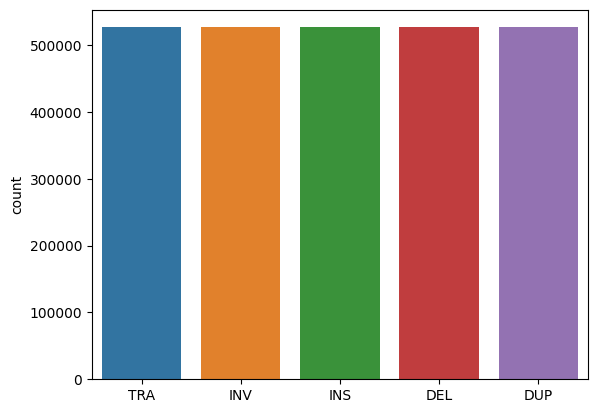

In [24]:
sns.countplot(svs)

In [26]:
for k, v in svs.items():
    pass

TRA 2156
INV 526686
INS 4609
DEL 7088
DUP 1816


In [35]:
def vis1(data):
    from collections import Counter

    import matplotlib.pyplot as plt
    import numpy as np

    # Calculate counts for each figure in each type
    counts = {}
    figures = set()  # To keep track of all unique figures

    for type_name, values in data.items():
        counts[type_name] = Counter(values)
        figures.update(values)

    # Sort figures for consistent ordering
    figures = sorted(figures)

    # Prepare data for plotting
    types = list(data.keys())
    x = np.arange(len(types))
    width = 0.8
    n_figures = len(figures)
    offsets = np.linspace(-width / 2, width / 2, n_figures)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot bars for each figure
    for i, figure in enumerate(figures):
        heights = [counts[type_name][figure] for type_name in types]
        plt.bar(x + offsets[i], heights, width / n_figures, label=f"Count {figure}")

    # Customize the plot
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.title("Distribution of Support by Type")
    plt.xticks(x, types)
    plt.legend(title="Support")

    # Add grid for better readability
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

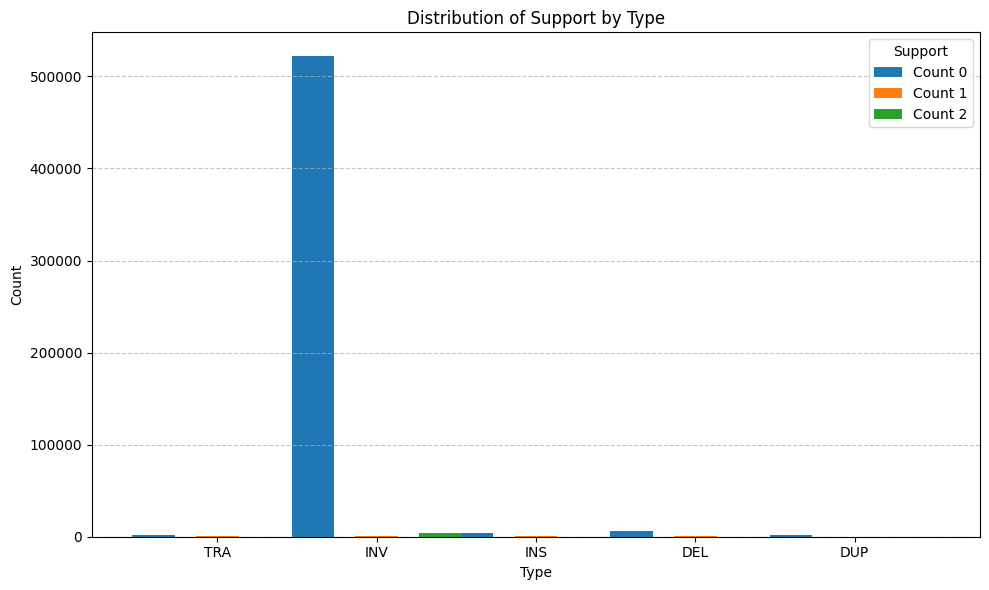

In [36]:
vis1(svs)

In [41]:
def get_support_by_group_and_type(data, type="INV", count_group=0):
    return sum([1 for count in data[type] if count == count_group]), len(data[type])

In [42]:
get_support_by_group_and_type(svs)

(521755, 526686)

In [54]:
def get_read_names(file, type="INV", count_group=0):
    from collections import defaultdict

    results = defaultdict(list)
    distribution = defaultdict(list)

    for line in open(file).readlines()[1:]:
        line_content = line.split()

        control = line_content[0]

        svtype = line_content[1].split(":")[0]

        support_count = int(line_content[2])

        read_names = line_content[-1].split(",")

        if svtype == type and support_count == count_group:
            results[control].extend(read_names)
            distribution[control].append(len(read_names))

    return results, distribution

In [55]:
read_names_0_group, distribution_sr_0_group = get_read_names(annotated_sv)

In [47]:
len(read_names_0_group["data/sv/PC3_10_cells_MDA_P2_dirty/chimeric_reads_mapping/cutesv.svcf"])

2241228

In [ ]:
sns.histplot(distribution_sr_0_group.values())